# TemporalVAE demo notebook with Xiang19 dataset (<A developmental landscape of 3D-cultured human pre-gastrulation embryos>)

## preprocess the orginal data of Xiang19(GEO:GSE136447)

### set up work space

In [1]:
import os
import sys
os.chdir("/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main")
import sys
sys.path.append(os.getcwd())

### import necessary function

In [2]:
from TemporalVAE.utils.utils_project import calHVG_adata as calHVG
from TemporalVAE.utils.utils_project import series_matrix2csv
from TemporalVAE.utils.utils_plot import draw_venn
import anndata as ad
import pandas as pd
# define funtion to get number for strings.
def extract_number(s):
    import re
    match = re.search(r'D(\d+)', s)
    if match:
        return int(match.group(1))
    return None

### `file_path` is the path of orginal dataset, which you download from GEO.

In [3]:
file_path = "/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE/data/240322Human_embryo/xiang2019/"
raw_count = f"{file_path}/GSE136447_555sample_gene_count_matrix.txt"
raw_count = pd.read_csv(raw_count, sep="\t", header=0, index_col=0)
raw_count

,D6N1B23,D6N1B6,D6N1S1,D6N1S15,D6N1S19,D6N1S3,D6N1S33,D6N1S34,D6N1S35,D6N1S39,...,D14_2S1,D14_3B5,D14_3B6,D14_3S10,D14_3S15,D14_3S16,D14_3S9,D14_2S2,D14_2B1,D14_2B3
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000146469.12|VIP,0,0,0,0,0,0,0,0,0,0,...,0,39,67,0,0,0,0,0,0,0
ENSG00000159214.12|CCDC24,0,0,0,0,0,0,453,0,0,0,...,0,0,0,0,2273,0,0,0,1146,5
ENSG00000244171.4|PBX2P1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ENSG00000136295.14|TTYH3,0,0,0,4,0,0,0,0,0,0,...,2453,1953,2805,2308,0,4,2,395,2428,13430
ENSG00000141736.13|ERBB2,1958,308,5,13,942,321,1376,12,79,1390,...,1052,420,740,1675,9,5,16,518,3179,7347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000155367.15|PPM1J,0,62,0,0,0,0,0,0,0,0,...,0,20,0,459,445,1477,0,0,0,426
ENSG00000172893.15|DHCR7,4362,2620,3589,1612,3482,0,901,31,7782,862,...,969,2477,3023,2267,4185,7411,770,3378,1298,3471
ENSG00000093100.13|AC016026.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Read cell information and trans orginal annotation of cells to more readable ones.

In [4]:
cell_info1 = f"{file_path}/GSE136447-GPL20795_series_matrix.txt"
cell_info1 = series_matrix2csv(cell_info1)

cell_info2 = f"{file_path}/GSE136447-GPL23227_series_matrix.txt"
cell_info2 = series_matrix2csv(cell_info2)

cell_info = pd.concat([cell_info1[1], cell_info2[1]], axis=0)
cell_info['cell_id'] = cell_info['title'].apply(lambda x: x.replace('Embryo_', ""))
# cell_info["development_day"] = cell_info.index.map(extract_number)
# cell_info["time"]=cell_info["development_day"]
cell_info["time"] = cell_info["characteristics_ch1"].apply(lambda x: eval(x.replace(" ", "").replace('age:embryoinvitroday', "")))
cell_info["day"] = cell_info["time"].apply(lambda x: "day" + str(x))
cell_info["cell_type"] = cell_info["characteristics_ch1_2"].apply(lambda x: x.replace(" ", "").replace('celltype:', ""))
cell_info["Stage"] = cell_info["cell_type"]
cell_info = cell_info.set_index("cell_id")
# "day","Stage","n_genes","predicted_time"

if set(cell_info.index) == set(raw_count.columns):
    print("sample id is complete same.")
    raw_count = raw_count.T
    cell_info = cell_info.loc[raw_count.index]
else:
    exit(0)
adata = ad.AnnData(X=raw_count.values, obs=cell_info, var=pd.DataFrame(index=raw_count.columns))
print("Import data, cell number: {}, gene number: {}".format(adata.n_obs, adata.n_vars))
print("Cell number: {}".format(adata.n_obs))
print("Gene number: {}".format(adata.n_vars))
print("Annotation information of data includes: {}".format(adata.obs_keys()))  # 胞注釋信息的keys
print("Cell id first 5: {}".format(adata.obs_names[:5]))  # 返回胞ID 数据类型是object
print("Gene id first 5: {}".format(adata.var_names.to_list()[:5]))  # 返回基因数据类型是list adata.obs.head()# 査看前5行的数据
print("Gene id first 5: {}".format(adata.var.index.to_list()[:5]))

sample id is complete same.
Import data, cell number: 555, gene number: 64837
Cell number: 555
Gene number: 64837
Annotation information of data includes: ['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'characteristics_ch1', 'characteristics_ch1_2', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'extract_protocol_ch1_2', 'taxid_ch1', 'description', 'data_processing', 'data_processing_2', 'platform_id', 'contact_name', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'data_row_count', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'relation_2', 'supplementary_file_1', 'ID_REF', 'time', 'day', 'cell_type', 'Stage']
Cell id first 5: Index(['D6N1B23', 'D6N1B6', 'D6N1S1', 'D6N1S15', 'D6N1S19'], dtype='object')
Gene id first 5: ['ENSG00000146469.12|VIP', 

/mnt/yijun/nfs_share/yijun_tmp/ipykernel_3578429/2996537413.py:24: FutureWarning: X.dtype being converted to np.float32 from int64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata = ad.AnnData(X=raw_count.values, obs=cell_info, var=pd.DataFrame(index=raw_count.columns))


In [5]:
cell_info

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,library_source,library_strategy,relation,relation_2,supplementary_file_1,ID_REF,time,day,cell_type,Stage
D6N1B23,Embryo_D6N1B23,GSM4050151,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050151,6.0,day6.0,ICM,ICM
D6N1B6,Embryo_D6N1B6,GSM4050152,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050152,6.0,day6.0,ICM,ICM
D6N1S1,Embryo_D6N1S1,GSM4050154,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050154,6.0,day6.0,EPI,EPI
D6N1S15,Embryo_D6N1S15,GSM4050153,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050153,6.0,day6.0,EPI,EPI
D6N1S19,Embryo_D6N1S19,GSM4050155,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050155,6.0,day6.0,ICM,ICM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D14_3S16,Embryo_D14_3S16,GSM4050551,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050551,13.5,day13.5,EPI,EPI
D14_3S9,Embryo_D14_3S9,GSM4050552,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050552,13.5,day13.5,CTBs,CTBs
D14_2S2,Embryo_D14_2S2,GSM4050553,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050553,13.5,day13.5,STBs,STBs
D14_2B1,Embryo_D14_2B1,GSM4050554,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,transcriptomic,RNA-Seq,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050554,13.5,day13.5,EVTs,EVTs


In [6]:
adata

AnnData object with n_obs × n_vars = 555 × 64837
    obs: 'title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'characteristics_ch1', 'characteristics_ch1_2', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'extract_protocol_ch1_2', 'taxid_ch1', 'description', 'data_processing', 'data_processing_2', 'platform_id', 'contact_name', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'data_row_count', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'relation_2', 'supplementary_file_1', 'ID_REF', 'time', 'day', 'cell_type', 'Stage'

### filter low-quality cell and gene and calculate hvgs. Use "cell_range","seurat", and "seurat_v3" to calculate 500 HVGs.

Calculate hvg gene list use cell_ranger method from scanpy.
use hvg method cell_ranger
Calculate hvg gene list use cell_ranger method from scanpy.
use hvg method seurat
Calculate hvg gene list use cell_ranger method from scanpy.
use hvg method seurat_v3


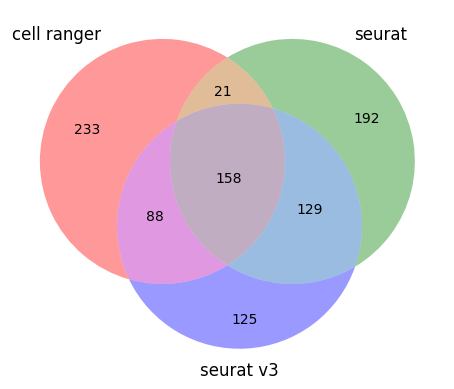

concat all hvg calculated


In [7]:
import scanpy as sc
min_gene_num = 50
min_cell_num = 50
hvg_num = 500
sc.pp.filter_cells(adata, min_genes=min_gene_num)  # drop samples with less than 20 gene expression
sc.pp.filter_genes(adata, min_cells=min_cell_num)

hvg_cellRanger_list = calHVG(adata.copy(), gene_num=hvg_num, method="cell_ranger")
hvg_seurat_list = calHVG(adata.copy(), gene_num=hvg_num, method="seurat")
hvg_seurat_v3_list = calHVG(adata.copy(), gene_num=hvg_num, method="seurat_v3")

draw_venn({"cell ranger": hvg_cellRanger_list, "seurat": hvg_seurat_list, "seurat v3": hvg_seurat_v3_list})
print(f"concat all hvg calculated")

### use genes selected by three methods as final HVGs.

In [8]:
import itertools
combined_hvg_list = list(set(itertools.chain(hvg_cellRanger_list, hvg_seurat_list, hvg_seurat_v3_list)))
filtered_adata_hvg = adata[:, combined_hvg_list].copy()
filtered_adata_hvg

AnnData object with n_obs × n_vars = 555 × 946
    obs: 'title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'characteristics_ch1', 'characteristics_ch1_2', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'extract_protocol_ch1_2', 'taxid_ch1', 'description', 'data_processing', 'data_processing_2', 'platform_id', 'contact_name', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'data_row_count', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'relation_2', 'supplementary_file_1', 'ID_REF', 'time', 'day', 'cell_type', 'Stage', 'n_genes'
    var: 'n_cells'

### Refilter adata to filter low quality cell and genes.

In [9]:
_shape = filtered_adata_hvg.shape
_new_shape = (0, 0)
min_gene_num = 50
min_cell_num = 50
while _new_shape != _shape:  # make sure drop samples and genes
    _shape = filtered_adata_hvg.shape
    sc.pp.filter_cells(filtered_adata_hvg, min_genes=min_gene_num)  # drop samples with less than 20 gene expression
    sc.pp.filter_genes(filtered_adata_hvg, min_cells=min_cell_num)  # drop genes which none expression in 3 samples
    _new_shape = filtered_adata_hvg.shape
print("Drop cells with less than {} gene expression, "
      "drop genes which none expression in {} samples".format(min_gene_num, min_cell_num))
print("After filter, get cell number: {}, gene number: {}".format(filtered_adata_hvg.n_obs, filtered_adata_hvg.n_vars))
print("the original sc expression anndata should be gene as row, cell as column")
filtered_adata_hvg

Drop cells with less than 50 gene expression, drop genes which none expression in 50 samples
After filter, get cell number: 555, gene number: 946
the original sc expression anndata should be gene as row, cell as column


AnnData object with n_obs × n_vars = 555 × 946
    obs: 'title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'characteristics_ch1', 'characteristics_ch1_2', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'extract_protocol_ch1_2', 'taxid_ch1', 'description', 'data_processing', 'data_processing_2', 'platform_id', 'contact_name', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'data_row_count', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'relation_2', 'supplementary_file_1', 'ID_REF', 'time', 'day', 'cell_type', 'Stage', 'n_genes'
    var: 'n_cells'

### Some genes have multiple versions, with different versions labeled with "|".
### Such genes were re-labeled with gene names, and the average expression value was denoted as the expression value of the gene

In [10]:
filtered_adata_hvg.var_names = filtered_adata_hvg.var_names.str.split("|").str[-1]

In [11]:
if filtered_adata_hvg.var_names.duplicated().any():
    # 转换为DataFrame，以便使用pandas的groupby功能
    df = pd.DataFrame(filtered_adata_hvg.X, columns=filtered_adata_hvg.var_names)

    # 求每个基因的平均表达量
    df_mean = df.groupby(df.columns, axis=1).mean()

    # 创建一个新的AnnData对象，使用处理后的数据
    filtered_adata_hvg = sc.AnnData(X=df_mean.values, obs=filtered_adata_hvg.obs, var=pd.DataFrame(index=df_mean.columns))
    # filtered_adata_hvg2.var_names_make_unique()
filtered_adata_hvg

AnnData object with n_obs × n_vars = 555 × 945
    obs: 'title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'characteristics_ch1', 'characteristics_ch1_2', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'extract_protocol_ch1_2', 'taxid_ch1', 'description', 'data_processing', 'data_processing_2', 'platform_id', 'contact_name', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'data_row_count', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'relation_2', 'supplementary_file_1', 'ID_REF', 'time', 'day', 'cell_type', 'Stage', 'n_genes'

### save `filtered_adata_hvg` as .h5ad file.

In [12]:
filtered_adata_hvg.write_h5ad(f"{file_path}/hvg{hvg_num}/adata_hvg.h5ad")
filtered_adata_hvg.obs["dataset_label"] = "xiang2019"
sc_expression_df = pd.DataFrame(data=filtered_adata_hvg.X.T,
                                columns=filtered_adata_hvg.obs.index,
                                index=filtered_adata_hvg.var_names)

### Save raw count data and cell annotation as .csv files.

In [13]:
sc_expression_df.to_csv(f"{file_path}/hvg{hvg_num}/data_count_hvg.csv", sep="\t")
sc_expression_df

,D6N1B23,D6N1B6,D6N1S1,D6N1S15,D6N1S19,D6N1S3,D6N1S33,D6N1S34,D6N1S35,D6N1S39,...,D14_2S1,D14_3B5,D14_3B6,D14_3S10,D14_3S15,D14_3S16,D14_3S9,D14_2S2,D14_2B1,D14_2B3
gene_id,,,,,,,,,,,,,,,,,,,,,
AADAT,446.0,1099.0,0.0,925.0,0.0,868.0,0.0,5.0,0.0,0.0,...,842.0,3535.0,11491.0,0.0,6762.0,333.0,5.0,815.0,1964.0,1150.0
AASS,905.0,977.0,4.0,123.0,282.0,0.0,1849.0,5521.0,2083.0,0.0,...,157.0,10.0,0.0,37470.0,63071.0,9046.0,0.0,376.0,0.0,482.0
ABCG2,6244.0,1105.0,0.0,0.0,15935.0,0.0,0.0,0.0,2567.0,0.0,...,36342.0,39683.0,44536.0,5.0,0.0,4.0,31091.0,6813.0,835.0,50667.0
ABI3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2936.0,0.0,0.0,0.0,0.0,0.0,0.0
ABI3BP,0.0,708.0,0.0,5202.0,0.0,1560.0,2593.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF468,5779.0,382.0,7056.0,77.0,8155.0,10071.0,16.0,51.0,1535.0,17429.0,...,891.0,8361.0,50.0,7739.0,11663.0,5.0,23472.0,4445.0,14.0,105.0
ZNF702P,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,4.0,0.0,...,1349.0,4007.0,1358.0,30.0,8.0,2.0,0.0,135.0,4174.0,3410.0
ZNF750,2154.0,879.0,0.0,0.0,6.0,24.0,0.0,0.0,0.0,0.0,...,3114.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,76.0,0.0


In [14]:
filtered_adata_hvg.obs.to_csv(f"{file_path}/hvg{hvg_num}/cell_with_time.csv", sep="\t")
filtered_adata_hvg.var.to_csv(f"{file_path}/hvg{hvg_num}/gene_info.csv", sep="\t")
print("After filter, get cell number: {}, gene number: {}".format(filtered_adata_hvg.n_obs, filtered_adata_hvg.n_vars))
filtered_adata_hvg

After filter, get cell number: 555, gene number: 945


AnnData object with n_obs × n_vars = 555 × 945
    obs: 'title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'characteristics_ch1', 'characteristics_ch1_2', 'growth_protocol_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'extract_protocol_ch1_2', 'taxid_ch1', 'description', 'data_processing', 'data_processing_2', 'platform_id', 'contact_name', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_state', 'contact_zip/postal_code', 'contact_country', 'data_row_count', 'instrument_model', 'library_selection', 'library_source', 'library_strategy', 'relation', 'relation_2', 'supplementary_file_1', 'ID_REF', 'time', 'day', 'cell_type', 'Stage', 'n_genes', 'dataset_label'

In [15]:
print(f"{file_path}/hvg{hvg_num}/")

/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE/data/240322Human_embryo/xiang2019//hvg500/


## Start Train and test TemporalVAE on Xiang19 data

### Set up work space and import necessary function and package.

In [16]:
import scanpy as sc
import os
os.chdir("/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main")
import sys
sys.path.append(os.getcwd())
import torch

torch.set_float32_matmul_precision('high')
import pyro
import logging
from TemporalVAE.utils.logging_system import LogHelper

smoke_test = ('CI' in os.environ)  # ignore; used to check code integrity in the Pyro repo
assert pyro.__version__.startswith('1.8.5')
pyro.set_rng_seed(1)
from TemporalVAE.utils.utils_project import auto_select_gpu_and_cpu, preprocessData_and_dropout_some_donor_or_gene, Embryodonor_resort_key, onlyTrain_model
from TemporalVAE.utils.utils_project import denormalize, task_kFoldTest
from TemporalVAE.utils.utils_plot import plt_umap_byScanpy
from collections import Counter
import yaml
import argparse
import anndata as ad
import numpy as np
import pandas as pd

### Set result and logger save path.

In [17]:
result_save_path = f'{os.getcwd()}/examples/humanEmbryo_xiang2019/'
if not os.path.exists(result_save_path):
    os.makedirs(result_save_path)
# ---------------------------------------set logger and parameters, creat result save path and folder----------------------------------------------
logger_file = f'{result_save_path}/humanEmbryo_xiang2019.log'
LogHelper.setup(log_path=logger_file, level='INFO')
_logger = logging.getLogger(__name__)

### preprocess data

In [18]:
# ------------ Preprocess data, with hvg gene from preprocess_data_mouse_embryonic_development.py------------------------
time_standard_type = "embryoneg5to5"
sc_data_file_csv = "/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE/data/240322Human_embryo/xiang2019//hvg500//data_count_hvg.csv"
cell_info_file_csv =  "/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE/data/240322Human_embryo/xiang2019//hvg500//cell_with_time.csv"
sc_expression_df, cell_time = preprocessData_and_dropout_some_donor_or_gene("", sc_data_file_csv, cell_info_file_csv,
                                                                            # donor_attr=donor_attr, drop_out_donor=drop_out_donor,
                                                                            min_cell_num=50,
                                                                            min_gene_num=50,
                                                                            data_raw_count_bool=True)  # 2024-04-20 15:38:58
special_path_str = ""

2025-03-12 11:27:10,758 INFO - TemporalVAE.utils.utils_project - the original sc expression anndata should be gene as row, cell as column 
2025-03-12 11:27:10,962 INFO - TemporalVAE.utils.utils_project - read the original sc expression anndata with shape (gene, cell): (945, 555) 
2025-03-12 11:27:10,962 INFO - TemporalVAE.utils.utils_project - Import data, cell number: 555, gene number: 945 
2025-03-12 11:27:10,986 INFO - TemporalVAE.utils.utils_project - After drop gene threshold: 50, cell threshold: 50, remain adata shape: (555, 945) 
2025-03-12 11:27:10,986 INFO - TemporalVAE.utils.utils_project - Drop cells with less than 50 gene expression, drop genes which none expression in 50 samples 
2025-03-12 11:27:10,987 INFO - TemporalVAE.utils.utils_project - After filter, get cell number: 555, gene number: 945 
2025-03-12 11:27:10,994 INFO - TemporalVAE.utils.utils_project - Finish normalize per cell to 1000000.0, so that every cell has the same total count after normalization. 
2025-03-

normalized sample to 1000000.0
Input data is raw count, do the log1p().


In [19]:
sc_expression_df

,AADAT,AASS,ABCG2,ABI3,ABI3BP,ABRA,AC004754.1,AC004870.1,AC005899.8,AC008012.1,...,ZIC3,ZNF114,ZNF280A,ZNF292,ZNF296,ZNF468,ZNF702P,ZNF750,ZSCAN10,ZSCAN4
D6N1B23,0.768123,0.759304,0.704098,-0.263679,-0.279015,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,-0.586476,-1.001023,-0.523737,-1.609120,0.641682,1.076652,-1.566551,1.175830,-0.189059,-0.409224
D6N1B6,1.222415,0.902912,0.187845,-0.263679,5.734759,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,-0.140831,0.768706,-0.523737,0.532179,1.075717,-0.033983,-1.566551,0.999126,0.993866,-0.409224
D6N1S1,-1.136359,-0.793219,-2.214447,-0.263679,-0.279015,-0.261942,-0.217034,0.530094,-0.390292,-0.302179,...,-0.586476,-0.948890,-0.523737,-2.157164,-1.393025,1.450700,-1.566551,-0.994867,-0.713960,-0.409224
D6N1S15,1.315319,0.342062,-2.214447,-0.263679,8.155582,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,1.958856,1.011805,-0.523737,-2.382791,1.407074,-0.580176,-1.566551,-0.994867,2.162210,-0.409224
D6N1S19,-1.136359,0.461630,1.161769,-0.263679,-0.279015,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,-0.586476,-1.459395,-0.523737,-0.952389,0.958691,1.375325,-1.566551,-0.529934,-0.265736,-0.409224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D14_3S16,0.485519,1.380036,-1.956501,-0.263679,-0.279015,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,1.823105,-1.459395,-0.523737,-2.733285,-1.393025,-2.183015,-1.424852,-0.994867,-0.081709,-0.409224
D14_3S9,-0.862659,-1.264213,1.077416,-0.263679,-0.279015,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,-0.586476,-1.459395,-0.523737,0.225571,0.923014,1.451346,-1.566551,-0.994867,-0.713960,-0.409224
D14_2S2,0.804744,0.289404,0.549667,-0.263679,-0.279015,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,-0.586476,-0.170511,-0.523737,-0.894034,-1.393025,0.718314,-0.331464,-0.994867,-0.713960,0.093271
D14_2B1,0.654358,-1.264213,-0.706892,-0.263679,-0.279015,-0.261942,-0.217034,-0.337470,-0.390292,-0.302179,...,-0.586476,-1.459395,-0.300657,-1.434894,-1.393025,-2.251147,0.406965,-0.413979,-0.713960,-0.409224


In [20]:
cell_time

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,relation,relation_2,supplementary_file_1,ID_REF,time,day,cell_type,Stage,n_genes,dataset_label
D6N1B23,Embryo_D6N1B23,GSM4050151,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050151,6.0,day6.0,ICM,ICM,428,xiang2019
D6N1B6,Embryo_D6N1B6,GSM4050152,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050152,6.0,day6.0,ICM,ICM,489,xiang2019
D6N1S1,Embryo_D6N1S1,GSM4050154,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050154,6.0,day6.0,EPI,EPI,392,xiang2019
D6N1S15,Embryo_D6N1S15,GSM4050153,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050153,6.0,day6.0,EPI,EPI,402,xiang2019
D6N1S19,Embryo_D6N1S19,GSM4050155,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050155,6.0,day6.0,ICM,ICM,418,xiang2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D14_3S16,Embryo_D14_3S16,GSM4050551,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050551,13.5,day13.5,EPI,EPI,412,xiang2019
D14_3S9,Embryo_D14_3S9,GSM4050552,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050552,13.5,day13.5,CTBs,CTBs,419,xiang2019
D14_2S2,Embryo_D14_2S2,GSM4050553,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050553,13.5,day13.5,STBs,STBs,509,xiang2019
D14_2B1,Embryo_D14_2B1,GSM4050554,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050554,13.5,day13.5,EVTs,EVTs,532,xiang2019


### set donor list and dictionary

In [21]:
# ---------------------------------------- set donor list and dictionary -----------------------------------------------------
donor_list = np.unique(cell_time["day"])
donor_list = sorted(donor_list, key=Embryodonor_resort_key)
donor_dic = dict()
for i in range(len(donor_list)):
    donor_dic[donor_list[i]] = i
batch_dic = donor_dic.copy()
_logger.info("Consider donor as batch effect, donor use label: {}".format(donor_dic))
_logger.info("For each donor (donor_id, cell_num):{} ".format(Counter(cell_time["day"])))
save_file_name = f"{_logger.root.handlers[0].baseFilename.replace('.log', '')}/"
save_file_name

2025-03-12 11:27:15,609 INFO - __main__ - Consider donor as batch effect, donor use label: {'day10.0': 0, 'day12.0': 1, 'day13.5': 2, 'day14.0': 3, 'day6.0': 4, 'day7.0': 5, 'day8.0': 6, 'day9.0': 7} 
2025-03-12 11:27:15,610 INFO - __main__ - For each donor (donor_id, cell_num):Counter({'day14.0': 120, 'day12.0': 88, 'day10.0': 77, 'day9.0': 68, 'day7.0': 65, 'day6.0': 63, 'day8.0': 59, 'day13.5': 15})  


'/mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/'

## Set model config

In [22]:
# ------- set config and logger ------
with open("TemporalVAE/embryoCell.yaml", 'r') as file:
    try:
        config = yaml.safe_load(file)
    except yaml.YAMLError as exc:
        print(exc)

### If you have a donor you want to exclude from the calculation, please set its name to `drop_out_donor`. If you don't have any donor to exclude, just set `drop_out_donor=""`

In [23]:
drop_out_donor = ""
print(f"drop the donor: {drop_out_donor}")
cell_drop_index_list = cell_time.loc[cell_time["dataset_label"] == drop_out_donor].index
cell_drop_index_list

drop the donor: 


Index([], dtype='object')

In [24]:
sc_expression_df_filter = sc_expression_df.drop(cell_drop_index_list, axis=0)
cell_time_filter = cell_time.drop(cell_drop_index_list, axis=0)
cell_time_filter = cell_time_filter.loc[sc_expression_df_filter.index]
cell_time_filter

,title,geo_accession,status,submission_date,last_update_date,type,channel_count,source_name_ch1,organism_ch1,characteristics_ch1,...,relation,relation_2,supplementary_file_1,ID_REF,time,day,cell_type,Stage,n_genes,dataset_label
D6N1B23,Embryo_D6N1B23,GSM4050151,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050151,6.0,day6.0,ICM,ICM,428,xiang2019
D6N1B6,Embryo_D6N1B6,GSM4050152,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050152,6.0,day6.0,ICM,ICM,489,xiang2019
D6N1S1,Embryo_D6N1S1,GSM4050154,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050154,6.0,day6.0,EPI,EPI,392,xiang2019
D6N1S15,Embryo_D6N1S15,GSM4050153,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050153,6.0,day6.0,EPI,EPI,402,xiang2019
D6N1S19,Embryo_D6N1S19,GSM4050155,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 6,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050155,6.0,day6.0,ICM,ICM,418,xiang2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D14_3S16,Embryo_D14_3S16,GSM4050551,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050551,13.5,day13.5,EPI,EPI,412,xiang2019
D14_3S9,Embryo_D14_3S9,GSM4050552,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050552,13.5,day13.5,CTBs,CTBs,419,xiang2019
D14_2S2,Embryo_D14_2S2,GSM4050553,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050553,13.5,day13.5,STBs,STBs,509,xiang2019
D14_2B1,Embryo_D14_2B1,GSM4050554,Public on Nov 26 2019,Aug 27 2019,Oct 05 2021,SRA,1,embryo,Homo sapiens,age: embryo invitro day 13.5,...,BioSample: https://www.ncbi.nlm.nih.gov/biosam...,SRA: https://www.ncbi.nlm.nih.gov/sra?term=SRX...,NONE,GSM4050554,13.5,day13.5,EVTs,EVTs,532,xiang2019


## 1. If you want to do train on all donors and check the umap of latent space.

2025-03-12 11:27:29,233 INFO - torch.distributed.nn.jit.instantiator - Created a temporary directory at /mnt/yijun/nfs_share/yijun_tmp/tmpvwaxb_pd 
2025-03-12 11:27:29,234 INFO - torch.distributed.nn.jit.instantiator - Writing /mnt/yijun/nfs_share/yijun_tmp/tmpvwaxb_pd/_remote_module_non_scriptable.py 
2025-03-12 11:27:29,355 INFO - TemporalVAE.utils.utils_project - Set x_sc_train data with shape (gene, cells): torch.Size([945, 555]) 
2025-03-12 11:27:29,365 INFO - TemporalVAE.utils.utils_project - label dictionary: {600: -5.0, 700: -3.75, 800: -2.5, 900: -1.25, 1000: 0.0, 1200: 2.5, 1350: 4.375, 1400: 5.0} 
2025-03-12 11:27:29,366 INFO - TemporalVAE.utils.utils_project - Normalize train y_time_train type: embryoneg5to5, with y_time_train lable: [ 600.  700.  800.  900. 1000. 1200. 1350. 1400.], shape: torch.Size([555]), 
After trans y_time_nor_train detail: [-5.    -3.75  -2.5   -1.25   0.     2.5    4.375  5.   ] 
2025-03-12 11:27:29,367 INFO - TemporalVAE.utils.utils_project - Start

Free Memory Percentage: 35.95%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 39.377GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.819GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 39.377GB.

[INFO] more than 5% free memory, Auto select GPU device 0,- memory free: 39.377GB


2025-03-12 11:27:29,599 INFO - pytorch_lightning.utilities.rank_zero - IPU available: False, using: 0 IPUs 
2025-03-12 11:27:29,600 INFO - pytorch_lightning.utilities.rank_zero - HPU available: False, using: 0 HPUs 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/configuration_validator.py:70: PossibleUserWarning: You defined a `validation_step` but have no `val_dataloader`. Skipping val loop.
  rank_zero_warn(


======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


2025-03-12 11:27:30,652 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
2025-03-12 11:27:30,655 INFO - pytorch_lightning.callbacks.model_summary - 
  | Name  | Type                                                         | Params
---------------------------------------------------------------------------------------
0 | model | SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial | 3.3 M 
---------------------------------------------------------------------------------------
3.3 M     Trainable params
0         Non-trainable params
3.3 M     Total params
13.111    Total estimated model params size (MB) 
2025-03-13 00:27:31.069521: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-13 00:27:32.01226

Training: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(13.9664, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.3874, device='cuda:0'), 'train_KLD_step': tensor(-7.0603, device='cuda:0'), 'train_clf_loss_step': tensor(12.5772, device='cuda:0'), 'train_loss_epoch': tensor(13.9664, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.3874, device='cuda:0'), 'train_KLD_epoch': tensor(-7.0603, device='cuda:0'), 'train_clf_loss_epoch': tensor(12.5772, device='cuda:0')}
Epoch train loss: {'train_loss_step': tensor(13.0772, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.3460, device='cuda:0'), 'train_KLD_step': tensor(-7.9408, device='cuda:0'), 'train_clf_loss_step': tensor(11.7292, device='cuda:0'), 'train_loss_epoch': tensor(13.0772, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.3460, device='cuda:0'), 'train_KLD_epoch': tensor(-7.9408, device='cuda:0'), 'train_clf_loss_epoch': tensor(11.7292, device='cuda:0')}
Epoch train loss: {'train_loss_step': 

2025-03-12 11:27:57,452 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.8696, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7632, device='cuda:0'), 'train_KLD_step': tensor(-62.2169, device='cuda:0'), 'train_clf_loss_step': tensor(1.0909, device='cuda:0'), 'train_loss_epoch': tensor(1.8696, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7632, device='cuda:0'), 'train_KLD_epoch': tensor(-62.2169, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0909, device='cuda:0')}


2025-03-12 11:27:57,492 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:27:57,534 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:27:57,564 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_1/events.out.tfevents.1741796853.GPU2.3578429.0 
2025-03-12 11:27:57,565 INFO - TemporalVAE.utils.utils_project - All tags in logger: ['lr-Adam', 'train_loss_step', 'train_Reconstruction_loss_step', 'train_KLD_step', 'train_clf_loss_step', 'epoch', 'train_loss_epoch', 'train_Reconstruction_loss_epoch', 'train_KLD_epoch', 'train_clf_loss_epoch'] 
2025-03-12 11:27:57,565 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:27:57,575 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/wholeData/Su

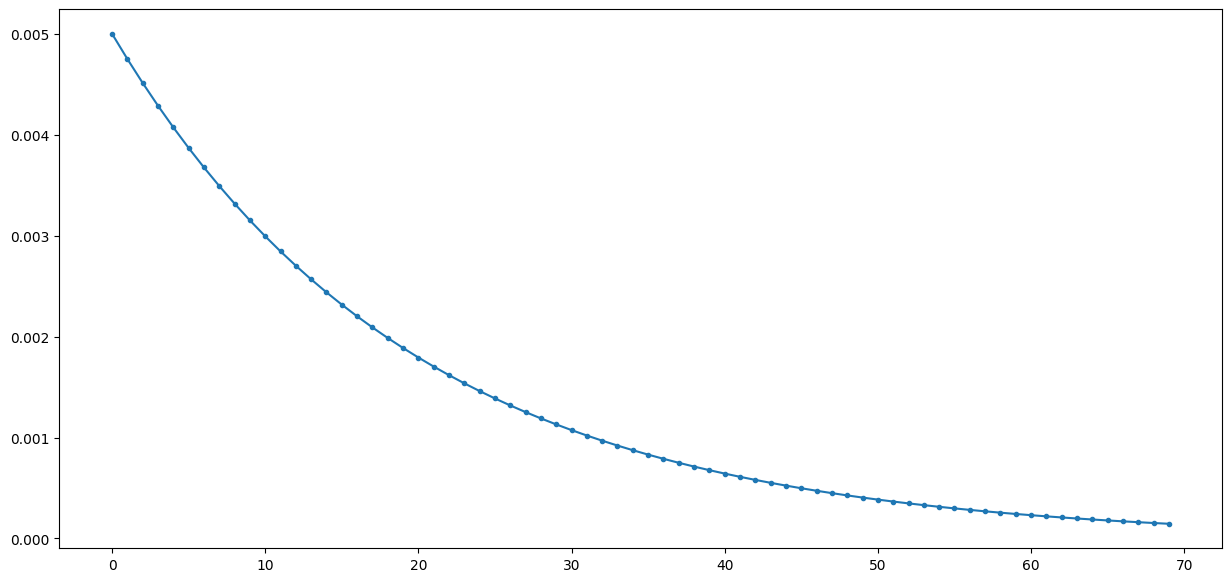

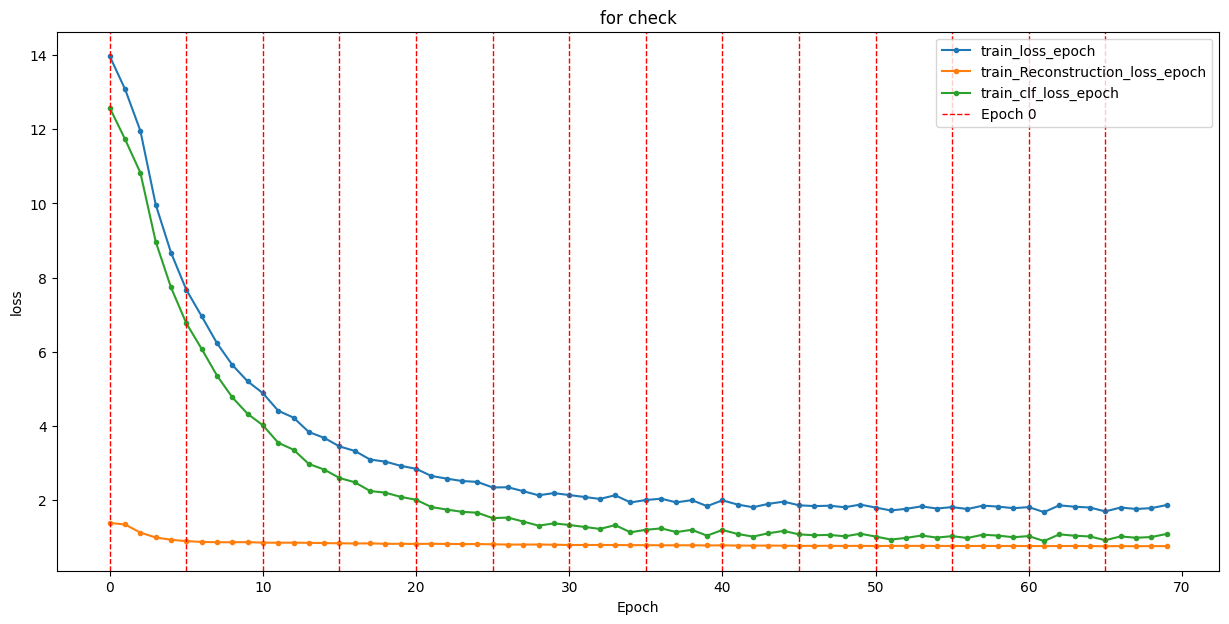

2025-03-12 11:27:58,134 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:27:58,145 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_1/events.out.tfevents.1741796853.GPU2.3578429.0 
2025-03-12 11:27:58,325 INFO - TemporalVAE.utils.utils_plot - Finish save images at: /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_1/trainingLoss_train_Reconstruction_loss_epoch_.png 


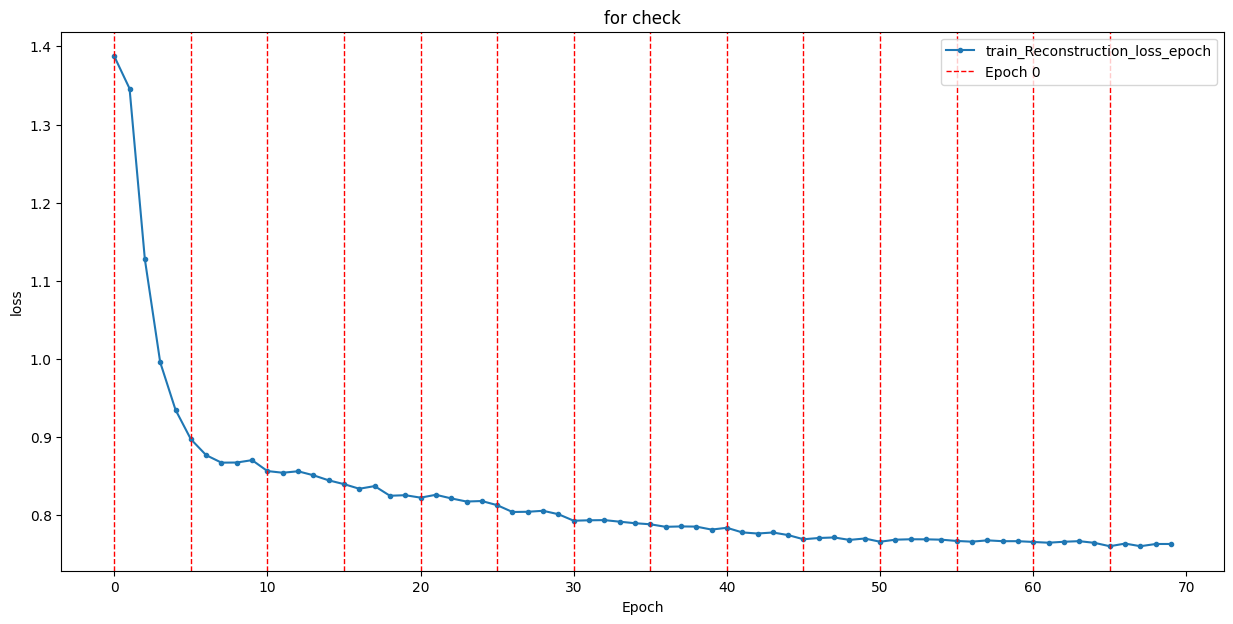

2025-03-12 11:27:58,509 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:27:58,519 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/wholeData/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_1/events.out.tfevents.1741796853.GPU2.3578429.0 


<Figure size 1500x700 with 0 Axes>

In [25]:
train_epoch_num=70
sc_expression_train, y_time_nor_train, donor_index_train, runner, experiment, _m, train_clf_result, label_dic, total_result = onlyTrain_model(
    sc_expression_df_filter, donor_dic,
    special_path_str,
    cell_time_filter,
    time_standard_type, config, train_epoch_num,
     plot_latentSpaceUmap=False, plot_trainingLossLine=True, time_saved_asFloat=True, batch_dic=batch_dic, donor_str="day",
    )

... storing 'dataset_label' as categorical
... storing 'cell_type' as categorical
... storing 'day' as categorical
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


latent mu save as /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019//n50_latent_mu.h5ad


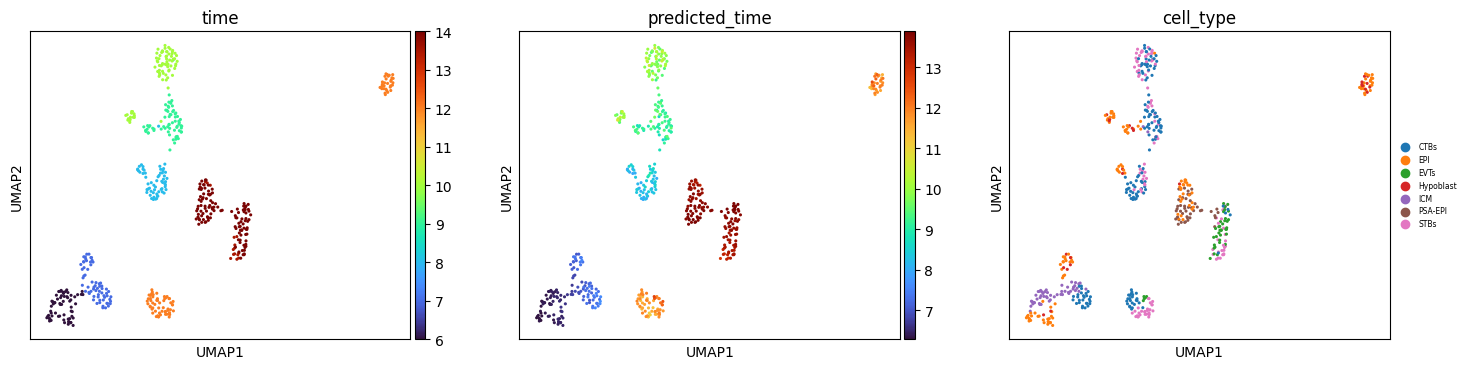

figure save as /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019//n50_latentSpace_umap_byScanpy.png


AnnData object with n_obs × n_vars = 555 × 50
    obs: 'time', 'predicted_time', 'dataset_label', 'cell_type', 'day'
    uns: 'neighbors', 'umap', 'cell_type_colors'
    obsm: 'X_umap'
    obsp: 'distances', 'connectivities'

In [26]:
predict_donors_df = pd.DataFrame(train_clf_result, columns=["pseudotime"], index=cell_time_filter.index)
predict_donors_df['predicted_time'] = predict_donors_df['pseudotime'].apply(denormalize, args=(min(label_dic.keys()) / 100, max(label_dic.keys()) / 100,
                                                                                               min(label_dic.values()), max(label_dic.values())))
cell_time_filter = pd.concat([cell_time_filter, predict_donors_df], axis=1)

plt_image_adata = ad.AnnData(X=total_result["mu"].cpu().numpy())
plt_image_adata.obs = cell_time_filter[["time", "predicted_time", "dataset_label", "cell_type", "day"]]

plt_umap_byScanpy(plt_image_adata.copy(),
                  ["time", "predicted_time", "cell_type"],
                  save_path=save_file_name, mode=None, figure_size=(5, 4),
                  color_map="turbo",
                  n_neighbors=80, n_pcs=10, special_file_name_str="n50_")

## If you want to do multiple loop calculations: test on one donor and train on other donors.

2025-03-12 11:28:15,470 INFO - __main__ - start task: k-fold test with ['day10.0', 'day12.0', 'day13.5', 'day14.0', 'day6.0', 'day7.0', 'day8.0', 'day9.0']. 
2025-03-12 11:28:15,831 INFO - TemporalVAE.utils.utils_project - the 1/8 fold train, use donor-day10.0 as test set 
2025-03-12 11:28:15,838 INFO - TemporalVAE.utils.utils_project - Set x_sc_train data with shape (gene, cells): torch.Size([945, 478]) 
2025-03-12 11:28:15,839 INFO - TemporalVAE.utils.utils_project - Set x_sc_test data with shape (gene, cells): torch.Size([945, 77]) 
2025-03-12 11:28:15,883 INFO - TemporalVAE.utils.utils_project - label dictionary: {600: -5.0, 700: -3.75, 800: -2.5, 900: -1.25, 1200: 2.5, 1350: 4.375, 1400: 5.0, 1000: 0.0} 
2025-03-12 11:28:15,884 INFO - TemporalVAE.utils.utils_project - Normalize train y_time_nor_train type: embryoneg5to5, with y_time_nor_train lable: [ 600.  700.  800.  900. 1200. 1350. 1400.], shape: torch.Size([478]), 
detail: [-5.    -3.75  -2.5   -1.25   2.5    4.375  5.   ] 
2

Free Memory Percentage: 35.55%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 39.377GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.819GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.817GB.

[INFO] more than 5% free memory, Auto select GPU device 2,- memory free: 39.377GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


2025-03-12 11:28:17,638 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
2025-03-12 11:28:17,641 INFO - pytorch_lightning.callbacks.model_summary - 
  | Name  | Type                                                         | Params
---------------------------------------------------------------------------------------
0 | model | SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial | 3.3 M 
---------------------------------------------------------------------------------------
3.3 M     Trainable params
0         Non-trainable params
3.3 M     Total params
13.111    Total estimated model params size (MB) 


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(15.8040, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.4140, device='cuda:2'), 'train_KLD_step': tensor(-7.0617, device='cuda:2'), 'train_clf_loss_step': tensor(14.3882, device='cuda:2'), 'val_loss': tensor(0.8368, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8299, device='cuda:2'), 'val_KLD': tensor(-0.3141, device='cuda:2'), 'val_clf_loss': tensor(0.0068, device='cuda:2'), 'train_loss_epoch': tensor(15.8040, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.4140, device='cuda:2'), 'train_KLD_epoch': tensor(-7.0617, device='cuda:2'), 'train_clf_loss_epoch': tensor(14.3882, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(15.1622, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.3544, device='cuda:2'), 'train_KLD_step': tensor(-7.4916, device='cuda:2'), 'train_clf_loss_step': tensor(13.8059, device='cuda:2'), 'val_loss': tensor(0.8588, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8400, device='cuda:2'), 'val_KLD': tensor(-1.0916, device='cuda:2'), 'val_clf_loss': tensor(0.0185, device='cuda:2'), 'train_loss_epoch': tensor(15.1622, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.3544, device='cuda:2'), 'train_KLD_epoch': tensor(-7.4916, device='cuda:2'), 'train_clf_loss_epoch': tensor(13.8059, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(13.2702, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.1291, device='cuda:2'), 'train_KLD_step': tensor(-9.4513, device='cuda:2'), 'train_clf_loss_step': tensor(12.1387, device='cuda:2'), 'val_loss': tensor(0.8442, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7647, device='cuda:2'), 'val_KLD': tensor(-5.3047, device='cuda:2'), 'val_clf_loss': tensor(0.0781, device='cuda:2'), 'train_loss_epoch': tensor(13.2702, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.1291, device='cuda:2'), 'train_KLD_epoch': tensor(-9.4513, device='cuda:2'), 'train_clf_loss_epoch': tensor(12.1387, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(11.4426, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.0028, device='cuda:2'), 'train_KLD_step': tensor(-11.9010, device='cuda:2'), 'train_clf_loss_step': tensor(10.4369, device='cuda:2'), 'val_loss': tensor(1.2174, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8092, device='cuda:2'), 'val_KLD': tensor(-18.1013, device='cuda:2'), 'val_clf_loss': tensor(0.4037, device='cuda:2'), 'train_loss_epoch': tensor(11.4426, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.0028, device='cuda:2'), 'train_KLD_epoch': tensor(-11.9010, device='cuda:2'), 'train_clf_loss_epoch': tensor(10.4369, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.8436, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9280, device='cuda:2'), 'train_KLD_step': tensor(-14.1598, device='cuda:2'), 'train_clf_loss_step': tensor(8.9121, device='cuda:2'), 'val_loss': tensor(2.2775, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9557, device='cuda:2'), 'val_KLD': tensor(-40.7494, device='cuda:2'), 'val_clf_loss': tensor(1.3116, device='cuda:2'), 'train_loss_epoch': tensor(9.8436, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9280, device='cuda:2'), 'train_KLD_epoch': tensor(-14.1598, device='cuda:2'), 'train_clf_loss_epoch': tensor(8.9121, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(8.9877, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9143, device='cuda:2'), 'train_KLD_step': tensor(-16.2388, device='cuda:2'), 'train_clf_loss_step': tensor(8.0693, device='cuda:2'), 'val_loss': tensor(3.4326, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0519, device='cuda:2'), 'val_KLD': tensor(-53.6493, device='cuda:2'), 'val_clf_loss': tensor(2.3673, device='cuda:2'), 'train_loss_epoch': tensor(8.9877, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9143, device='cuda:2'), 'train_KLD_epoch': tensor(-16.2388, device='cuda:2'), 'train_clf_loss_epoch': tensor(8.0693, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.7956, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8889, device='cuda:2'), 'train_KLD_step': tensor(-18.5901, device='cuda:2'), 'train_clf_loss_step': tensor(6.9021, device='cuda:2'), 'val_loss': tensor(4.6493, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0967, device='cuda:2'), 'val_KLD': tensor(-74.2178, device='cuda:2'), 'val_clf_loss': tensor(3.5340, device='cuda:2'), 'train_loss_epoch': tensor(7.7956, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8889, device='cuda:2'), 'train_KLD_epoch': tensor(-18.5901, device='cuda:2'), 'train_clf_loss_epoch': tensor(6.9021, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.0747, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8806, device='cuda:2'), 'train_KLD_step': tensor(-20.9837, device='cuda:2'), 'train_clf_loss_step': tensor(6.1888, device='cuda:2'), 'val_loss': tensor(5.8804, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1436, device='cuda:2'), 'val_KLD': tensor(-91.5140, device='cuda:2'), 'val_clf_loss': tensor(4.7139, device='cuda:2'), 'train_loss_epoch': tensor(7.0747, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8806, device='cuda:2'), 'train_KLD_epoch': tensor(-20.9837, device='cuda:2'), 'train_clf_loss_epoch': tensor(6.1888, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.5411, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8620, device='cuda:2'), 'train_KLD_step': tensor(-23.4956, device='cuda:2'), 'train_clf_loss_step': tensor(5.6732, device='cuda:2'), 'val_loss': tensor(7.0269, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1613, device='cuda:2'), 'val_KLD': tensor(-95.6519, device='cuda:2'), 'val_clf_loss': tensor(5.8417, device='cuda:2'), 'train_loss_epoch': tensor(6.5411, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8620, device='cuda:2'), 'train_KLD_epoch': tensor(-23.4956, device='cuda:2'), 'train_clf_loss_epoch': tensor(5.6732, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.7721, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8579, device='cuda:2'), 'train_KLD_step': tensor(-26.0615, device='cuda:2'), 'train_clf_loss_step': tensor(4.9077, device='cuda:2'), 'val_loss': tensor(8.2078, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1825, device='cuda:2'), 'val_KLD': tensor(-98.4773, device='cuda:2'), 'val_clf_loss': tensor(7.0007, device='cuda:2'), 'train_loss_epoch': tensor(5.7721, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8579, device='cuda:2'), 'train_KLD_epoch': tensor(-26.0615, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.9077, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.3709, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8487, device='cuda:2'), 'train_KLD_step': tensor(-28.5365, device='cuda:2'), 'train_clf_loss_step': tensor(4.5151, device='cuda:2'), 'val_loss': tensor(9.3614, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2014, device='cuda:2'), 'val_KLD': tensor(-98.9063, device='cuda:2'), 'val_clf_loss': tensor(8.1353, device='cuda:2'), 'train_loss_epoch': tensor(5.3709, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8487, device='cuda:2'), 'train_KLD_epoch': tensor(-28.5365, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.5151, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.1617, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8437, device='cuda:2'), 'train_KLD_step': tensor(-30.8521, device='cuda:2'), 'train_clf_loss_step': tensor(4.3103, device='cuda:2'), 'val_loss': tensor(10.0599, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1704, device='cuda:2'), 'val_KLD': tensor(-92.8936, device='cuda:2'), 'val_clf_loss': tensor(8.8663, device='cuda:2'), 'train_loss_epoch': tensor(5.1617, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8437, device='cuda:2'), 'train_KLD_epoch': tensor(-30.8521, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.3103, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.8517, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8408, device='cuda:2'), 'train_KLD_step': tensor(-33.0298, device='cuda:2'), 'train_clf_loss_step': tensor(4.0026, device='cuda:2'), 'val_loss': tensor(10.8350, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1474, device='cuda:2'), 'val_KLD': tensor(-79.7648, device='cuda:2'), 'val_clf_loss': tensor(9.6676, device='cuda:2'), 'train_loss_epoch': tensor(4.8517, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8408, device='cuda:2'), 'train_KLD_epoch': tensor(-33.0298, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.0026, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.5326, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8337, device='cuda:2'), 'train_KLD_step': tensor(-34.9953, device='cuda:2'), 'train_clf_loss_step': tensor(3.6901, device='cuda:2'), 'val_loss': tensor(11.9103, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1506, device='cuda:2'), 'val_KLD': tensor(-78.2411, device='cuda:2'), 'val_clf_loss': tensor(10.7401, device='cuda:2'), 'train_loss_epoch': tensor(4.5326, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8337, device='cuda:2'), 'train_KLD_epoch': tensor(-34.9953, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.6901, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.2530, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8366, device='cuda:2'), 'train_KLD_step': tensor(-36.7214, device='cuda:2'), 'train_clf_loss_step': tensor(3.4072, device='cuda:2'), 'val_loss': tensor(12.0917, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0809, device='cuda:2'), 'val_KLD': tensor(-70.6994, device='cuda:2'), 'val_clf_loss': tensor(10.9931, device='cuda:2'), 'train_loss_epoch': tensor(4.2530, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8366, device='cuda:2'), 'train_KLD_epoch': tensor(-36.7214, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.4072, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.0988, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8307, device='cuda:2'), 'train_KLD_step': tensor(-38.3105, device='cuda:2'), 'train_clf_loss_step': tensor(3.2586, device='cuda:2'), 'val_loss': tensor(11.6583, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0137, device='cuda:2'), 'val_KLD': tensor(-56.2498, device='cuda:2'), 'val_clf_loss': tensor(10.6305, device='cuda:2'), 'train_loss_epoch': tensor(4.0988, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8307, device='cuda:2'), 'train_KLD_epoch': tensor(-38.3105, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.2586, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.9799, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8290, device='cuda:2'), 'train_KLD_step': tensor(-39.7155, device='cuda:2'), 'train_clf_loss_step': tensor(3.1410, device='cuda:2'), 'val_loss': tensor(11.0280, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9337, device='cuda:2'), 'val_KLD': tensor(-41.1105, device='cuda:2'), 'val_clf_loss': tensor(10.0840, device='cuda:2'), 'train_loss_epoch': tensor(3.9799, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8290, device='cuda:2'), 'train_KLD_epoch': tensor(-39.7155, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.1410, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.5828, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8270, device='cuda:2'), 'train_KLD_step': tensor(-41.0248, device='cuda:2'), 'train_clf_loss_step': tensor(2.7455, device='cuda:2'), 'val_loss': tensor(10.7044, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8991, device='cuda:2'), 'val_KLD': tensor(-35.5159, device='cuda:2'), 'val_clf_loss': tensor(9.7964, device='cuda:2'), 'train_loss_epoch': tensor(3.5828, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8270, device='cuda:2'), 'train_KLD_epoch': tensor(-41.0248, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.7455, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3477, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8236, device='cuda:2'), 'train_KLD_step': tensor(-42.3111, device='cuda:2'), 'train_clf_loss_step': tensor(2.5136, device='cuda:2'), 'val_loss': tensor(10.3990, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8891, device='cuda:2'), 'val_KLD': tensor(-36.0395, device='cuda:2'), 'val_clf_loss': tensor(9.5009, device='cuda:2'), 'train_loss_epoch': tensor(3.3477, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8236, device='cuda:2'), 'train_KLD_epoch': tensor(-42.3111, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.5136, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.2127, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8163, device='cuda:2'), 'train_KLD_step': tensor(-43.5720, device='cuda:2'), 'train_clf_loss_step': tensor(2.3855, device='cuda:2'), 'val_loss': tensor(11.4724, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8985, device='cuda:2'), 'val_KLD': tensor(-39.0246, device='cuda:2'), 'val_clf_loss': tensor(10.5642, device='cuda:2'), 'train_loss_epoch': tensor(3.2127, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8163, device='cuda:2'), 'train_KLD_epoch': tensor(-43.5720, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.3855, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.2841, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8196, device='cuda:2'), 'train_KLD_step': tensor(-44.7065, device='cuda:2'), 'train_clf_loss_step': tensor(2.4533, device='cuda:2'), 'val_loss': tensor(11.5389, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8948, device='cuda:2'), 'val_KLD': tensor(-42.3790, device='cuda:2'), 'val_clf_loss': tensor(10.6335, device='cuda:2'), 'train_loss_epoch': tensor(3.2841, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8196, device='cuda:2'), 'train_KLD_epoch': tensor(-44.7065, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.4533, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1043, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8190, device='cuda:2'), 'train_KLD_step': tensor(-45.6781, device='cuda:2'), 'train_clf_loss_step': tensor(2.2739, device='cuda:2'), 'val_loss': tensor(11.5196, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8553, device='cuda:2'), 'val_KLD': tensor(-39.8575, device='cuda:2'), 'val_clf_loss': tensor(10.6543, device='cuda:2'), 'train_loss_epoch': tensor(3.1043, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8190, device='cuda:2'), 'train_KLD_epoch': tensor(-45.6781, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.2739, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9074, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8092, device='cuda:2'), 'train_KLD_step': tensor(-46.5406, device='cuda:2'), 'train_clf_loss_step': tensor(2.0865, device='cuda:2'), 'val_loss': tensor(10.9402, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8312, device='cuda:2'), 'val_KLD': tensor(-35.1788, device='cuda:2'), 'val_clf_loss': tensor(10.1002, device='cuda:2'), 'train_loss_epoch': tensor(2.9074, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8092, device='cuda:2'), 'train_KLD_epoch': tensor(-46.5406, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.0865, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8772, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8127, device='cuda:2'), 'train_KLD_step': tensor(-47.3033, device='cuda:2'), 'train_clf_loss_step': tensor(2.0526, device='cuda:2'), 'val_loss': tensor(10.0650, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8126, device='cuda:2'), 'val_KLD': tensor(-29.5763, device='cuda:2'), 'val_clf_loss': tensor(9.2450, device='cuda:2'), 'train_loss_epoch': tensor(2.8772, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8127, device='cuda:2'), 'train_KLD_epoch': tensor(-47.3033, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.0526, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7208, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8051, device='cuda:2'), 'train_KLD_step': tensor(-47.9974, device='cuda:2'), 'train_clf_loss_step': tensor(1.9037, device='cuda:2'), 'val_loss': tensor(8.9355, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7707, device='cuda:2'), 'val_KLD': tensor(-24.6627, device='cuda:2'), 'val_clf_loss': tensor(8.1587, device='cuda:2'), 'train_loss_epoch': tensor(2.7208, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8051, device='cuda:2'), 'train_KLD_epoch': tensor(-47.9974, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.9037, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8172, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8053, device='cuda:2'), 'train_KLD_step': tensor(-48.6207, device='cuda:2'), 'train_clf_loss_step': tensor(1.9998, device='cuda:2'), 'val_loss': tensor(8.4530, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7573, device='cuda:2'), 'val_KLD': tensor(-21.5037, device='cuda:2'), 'val_clf_loss': tensor(7.6903, device='cuda:2'), 'train_loss_epoch': tensor(2.8172, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8053, device='cuda:2'), 'train_KLD_epoch': tensor(-48.6207, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.9998, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7023, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7998, device='cuda:2'), 'train_KLD_step': tensor(-49.2319, device='cuda:2'), 'train_clf_loss_step': tensor(1.8902, device='cuda:2'), 'val_loss': tensor(7.4874, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7475, device='cuda:2'), 'val_KLD': tensor(-19.2687, device='cuda:2'), 'val_clf_loss': tensor(6.7351, device='cuda:2'), 'train_loss_epoch': tensor(2.7023, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7998, device='cuda:2'), 'train_KLD_epoch': tensor(-49.2319, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8902, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5831, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8039, device='cuda:2'), 'train_KLD_step': tensor(-49.7508, device='cuda:2'), 'train_clf_loss_step': tensor(1.7668, device='cuda:2'), 'val_loss': tensor(7.7054, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7277, device='cuda:2'), 'val_KLD': tensor(-19.2748, device='cuda:2'), 'val_clf_loss': tensor(6.9729, device='cuda:2'), 'train_loss_epoch': tensor(2.5831, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8039, device='cuda:2'), 'train_KLD_epoch': tensor(-49.7508, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.7668, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5492, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8022, device='cuda:2'), 'train_KLD_step': tensor(-50.2455, device='cuda:2'), 'train_clf_loss_step': tensor(1.7345, device='cuda:2'), 'val_loss': tensor(7.2614, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7349, device='cuda:2'), 'val_KLD': tensor(-19.6083, device='cuda:2'), 'val_clf_loss': tensor(6.5216, device='cuda:2'), 'train_loss_epoch': tensor(2.5492, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8022, device='cuda:2'), 'train_KLD_epoch': tensor(-50.2455, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.7345, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4173, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8002, device='cuda:2'), 'train_KLD_step': tensor(-50.7698, device='cuda:2'), 'train_clf_loss_step': tensor(1.6043, device='cuda:2'), 'val_loss': tensor(7.2709, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7228, device='cuda:2'), 'val_KLD': tensor(-20.0325, device='cuda:2'), 'val_clf_loss': tensor(6.5431, device='cuda:2'), 'train_loss_epoch': tensor(2.4173, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8002, device='cuda:2'), 'train_KLD_epoch': tensor(-50.7698, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.6043, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4965, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7961, device='cuda:2'), 'train_KLD_step': tensor(-51.2495, device='cuda:2'), 'train_clf_loss_step': tensor(1.6875, device='cuda:2'), 'val_loss': tensor(7.1256, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7166, device='cuda:2'), 'val_KLD': tensor(-19.0434, device='cuda:2'), 'val_clf_loss': tensor(6.4042, device='cuda:2'), 'train_loss_epoch': tensor(2.4965, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7961, device='cuda:2'), 'train_KLD_epoch': tensor(-51.2495, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.6875, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4075, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7974, device='cuda:2'), 'train_KLD_step': tensor(-51.6374, device='cuda:2'), 'train_clf_loss_step': tensor(1.5972, device='cuda:2'), 'val_loss': tensor(6.5106, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7016, device='cuda:2'), 'val_KLD': tensor(-17.6241, device='cuda:2'), 'val_clf_loss': tensor(5.8046, device='cuda:2'), 'train_loss_epoch': tensor(2.4075, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7974, device='cuda:2'), 'train_KLD_epoch': tensor(-51.6374, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5972, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3925, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7937, device='cuda:2'), 'train_KLD_step': tensor(-51.9874, device='cuda:2'), 'train_clf_loss_step': tensor(1.5858, device='cuda:2'), 'val_loss': tensor(5.3871, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6878, device='cuda:2'), 'val_KLD': tensor(-15.0233, device='cuda:2'), 'val_clf_loss': tensor(4.6955, device='cuda:2'), 'train_loss_epoch': tensor(2.3925, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7937, device='cuda:2'), 'train_KLD_epoch': tensor(-51.9874, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5858, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3087, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7972, device='cuda:2'), 'train_KLD_step': tensor(-52.3120, device='cuda:2'), 'train_clf_loss_step': tensor(1.4984, device='cuda:2'), 'val_loss': tensor(4.7471, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7019, device='cuda:2'), 'val_KLD': tensor(-13.1220, device='cuda:2'), 'val_clf_loss': tensor(4.0420, device='cuda:2'), 'train_loss_epoch': tensor(2.3087, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7972, device='cuda:2'), 'train_KLD_epoch': tensor(-52.3120, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4984, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2816, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7898, device='cuda:2'), 'train_KLD_step': tensor(-52.6409, device='cuda:2'), 'train_clf_loss_step': tensor(1.4787, device='cuda:2'), 'val_loss': tensor(4.3600, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6995, device='cuda:2'), 'val_KLD': tensor(-11.9018, device='cuda:2'), 'val_clf_loss': tensor(3.6575, device='cuda:2'), 'train_loss_epoch': tensor(2.2816, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7898, device='cuda:2'), 'train_KLD_epoch': tensor(-52.6409, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4787, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3396, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7877, device='cuda:2'), 'train_KLD_step': tensor(-52.9857, device='cuda:2'), 'train_clf_loss_step': tensor(1.5386, device='cuda:2'), 'val_loss': tensor(4.0540, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7027, device='cuda:2'), 'val_KLD': tensor(-11.3056, device='cuda:2'), 'val_clf_loss': tensor(3.3484, device='cuda:2'), 'train_loss_epoch': tensor(2.3396, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7877, device='cuda:2'), 'train_KLD_epoch': tensor(-52.9857, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5386, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2186, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7905, device='cuda:2'), 'train_KLD_step': tensor(-53.3163, device='cuda:2'), 'train_clf_loss_step': tensor(1.4148, device='cuda:2'), 'val_loss': tensor(4.1215, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7084, device='cuda:2'), 'val_KLD': tensor(-11.2187, device='cuda:2'), 'val_clf_loss': tensor(3.4103, device='cuda:2'), 'train_loss_epoch': tensor(2.2186, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7905, device='cuda:2'), 'train_KLD_epoch': tensor(-53.3163, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4148, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3630, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7862, device='cuda:2'), 'train_KLD_step': tensor(-53.6685, device='cuda:2'), 'train_clf_loss_step': tensor(1.5633, device='cuda:2'), 'val_loss': tensor(4.2320, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6900, device='cuda:2'), 'val_KLD': tensor(-12.0696, device='cuda:2'), 'val_clf_loss': tensor(3.5390, device='cuda:2'), 'train_loss_epoch': tensor(2.3630, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7862, device='cuda:2'), 'train_KLD_epoch': tensor(-53.6685, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5633, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2605, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7848, device='cuda:2'), 'train_KLD_step': tensor(-54.0265, device='cuda:2'), 'train_clf_loss_step': tensor(1.4622, device='cuda:2'), 'val_loss': tensor(4.6067, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6913, device='cuda:2'), 'val_KLD': tensor(-12.9350, device='cuda:2'), 'val_clf_loss': tensor(3.9121, device='cuda:2'), 'train_loss_epoch': tensor(2.2605, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7848, device='cuda:2'), 'train_KLD_epoch': tensor(-54.0265, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4622, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0953, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7868, device='cuda:2'), 'train_KLD_step': tensor(-54.3685, device='cuda:2'), 'train_clf_loss_step': tensor(1.2950, device='cuda:2'), 'val_loss': tensor(4.6357, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6940, device='cuda:2'), 'val_KLD': tensor(-13.8870, device='cuda:2'), 'val_clf_loss': tensor(3.9382, device='cuda:2'), 'train_loss_epoch': tensor(2.0953, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7868, device='cuda:2'), 'train_KLD_epoch': tensor(-54.3685, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2950, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1562, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7831, device='cuda:2'), 'train_KLD_step': tensor(-54.6374, device='cuda:2'), 'train_clf_loss_step': tensor(1.3594, device='cuda:2'), 'val_loss': tensor(4.5240, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6852, device='cuda:2'), 'val_KLD': tensor(-14.2510, device='cuda:2'), 'val_clf_loss': tensor(3.8352, device='cuda:2'), 'train_loss_epoch': tensor(2.1562, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7831, device='cuda:2'), 'train_KLD_epoch': tensor(-54.6374, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3594, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0886, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7814, device='cuda:2'), 'train_KLD_step': tensor(-54.8694, device='cuda:2'), 'train_clf_loss_step': tensor(1.2936, device='cuda:2'), 'val_loss': tensor(4.7318, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6939, device='cuda:2'), 'val_KLD': tensor(-14.4220, device='cuda:2'), 'val_clf_loss': tensor(4.0343, device='cuda:2'), 'train_loss_epoch': tensor(2.0886, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7814, device='cuda:2'), 'train_KLD_epoch': tensor(-54.8694, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2936, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0697, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7822, device='cuda:2'), 'train_KLD_step': tensor(-55.1001, device='cuda:2'), 'train_clf_loss_step': tensor(1.2737, device='cuda:2'), 'val_loss': tensor(4.6010, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6786, device='cuda:2'), 'val_KLD': tensor(-13.9729, device='cuda:2'), 'val_clf_loss': tensor(3.9189, device='cuda:2'), 'train_loss_epoch': tensor(2.0697, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7822, device='cuda:2'), 'train_KLD_epoch': tensor(-55.1001, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2737, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1359, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7817, device='cuda:2'), 'train_KLD_step': tensor(-55.2627, device='cuda:2'), 'train_clf_loss_step': tensor(1.3403, device='cuda:2'), 'val_loss': tensor(4.2515, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6786, device='cuda:2'), 'val_KLD': tensor(-13.4715, device='cuda:2'), 'val_clf_loss': tensor(3.5696, device='cuda:2'), 'train_loss_epoch': tensor(2.1359, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7817, device='cuda:2'), 'train_KLD_epoch': tensor(-55.2627, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3403, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0635, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7816, device='cuda:2'), 'train_KLD_step': tensor(-55.3751, device='cuda:2'), 'train_clf_loss_step': tensor(1.2681, device='cuda:2'), 'val_loss': tensor(3.9735, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6782, device='cuda:2'), 'val_KLD': tensor(-12.8335, device='cuda:2'), 'val_clf_loss': tensor(3.2920, device='cuda:2'), 'train_loss_epoch': tensor(2.0635, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7816, device='cuda:2'), 'train_KLD_epoch': tensor(-55.3751, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2681, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0999, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7803, device='cuda:2'), 'train_KLD_step': tensor(-55.4593, device='cuda:2'), 'train_clf_loss_step': tensor(1.3057, device='cuda:2'), 'val_loss': tensor(3.5680, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6800, device='cuda:2'), 'val_KLD': tensor(-12.2177, device='cuda:2'), 'val_clf_loss': tensor(2.8849, device='cuda:2'), 'train_loss_epoch': tensor(2.0999, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7803, device='cuda:2'), 'train_KLD_epoch': tensor(-55.4593, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3057, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0967, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7814, device='cuda:2'), 'train_KLD_step': tensor(-55.5316, device='cuda:2'), 'train_clf_loss_step': tensor(1.3014, device='cuda:2'), 'val_loss': tensor(3.7051, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6785, device='cuda:2'), 'val_KLD': tensor(-11.8637, device='cuda:2'), 'val_clf_loss': tensor(3.0236, device='cuda:2'), 'train_loss_epoch': tensor(2.0967, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7814, device='cuda:2'), 'train_KLD_epoch': tensor(-55.5316, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3014, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0311, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7826, device='cuda:2'), 'train_KLD_step': tensor(-55.6151, device='cuda:2'), 'train_clf_loss_step': tensor(1.2345, device='cuda:2'), 'val_loss': tensor(3.5067, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6766, device='cuda:2'), 'val_KLD': tensor(-11.6425, device='cuda:2'), 'val_clf_loss': tensor(2.8272, device='cuda:2'), 'train_loss_epoch': tensor(2.0311, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7826, device='cuda:2'), 'train_KLD_epoch': tensor(-55.6151, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2345, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0641, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7794, device='cuda:2'), 'train_KLD_step': tensor(-55.7603, device='cuda:2'), 'train_clf_loss_step': tensor(1.2707, device='cuda:2'), 'val_loss': tensor(3.6218, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6785, device='cuda:2'), 'val_KLD': tensor(-11.5769, device='cuda:2'), 'val_clf_loss': tensor(2.9405, device='cuda:2'), 'train_loss_epoch': tensor(2.0641, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7794, device='cuda:2'), 'train_KLD_epoch': tensor(-55.7603, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2707, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1068, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7804, device='cuda:2'), 'train_KLD_step': tensor(-55.9109, device='cuda:2'), 'train_clf_loss_step': tensor(1.3125, device='cuda:2'), 'val_loss': tensor(3.7626, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6808, device='cuda:2'), 'val_KLD': tensor(-11.5441, device='cuda:2'), 'val_clf_loss': tensor(3.0789, device='cuda:2'), 'train_loss_epoch': tensor(2.1068, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7804, device='cuda:2'), 'train_KLD_epoch': tensor(-55.9109, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3125, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0696, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7809, device='cuda:2'), 'train_KLD_step': tensor(-56.0779, device='cuda:2'), 'train_clf_loss_step': tensor(1.2747, device='cuda:2'), 'val_loss': tensor(3.3796, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6695, device='cuda:2'), 'val_KLD': tensor(-11.6512, device='cuda:2'), 'val_clf_loss': tensor(2.7072, device='cuda:2'), 'train_loss_epoch': tensor(2.0696, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7809, device='cuda:2'), 'train_KLD_epoch': tensor(-56.0779, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2747, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0487, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7771, device='cuda:2'), 'train_KLD_step': tensor(-56.2568, device='cuda:2'), 'train_clf_loss_step': tensor(1.2575, device='cuda:2'), 'val_loss': tensor(3.5679, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6783, device='cuda:2'), 'val_KLD': tensor(-11.6303, device='cuda:2'), 'val_clf_loss': tensor(2.8867, device='cuda:2'), 'train_loss_epoch': tensor(2.0487, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7771, device='cuda:2'), 'train_KLD_epoch': tensor(-56.2568, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2575, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9552, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7783, device='cuda:2'), 'train_KLD_step': tensor(-56.4263, device='cuda:2'), 'train_clf_loss_step': tensor(1.1628, device='cuda:2'), 'val_loss': tensor(3.3211, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6725, device='cuda:2'), 'val_KLD': tensor(-11.6203, device='cuda:2'), 'val_clf_loss': tensor(2.6457, device='cuda:2'), 'train_loss_epoch': tensor(1.9552, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7783, device='cuda:2'), 'train_KLD_epoch': tensor(-56.4263, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1628, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1075, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7744, device='cuda:2'), 'train_KLD_step': tensor(-56.5905, device='cuda:2'), 'train_clf_loss_step': tensor(1.3189, device='cuda:2'), 'val_loss': tensor(3.2886, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6807, device='cuda:2'), 'val_KLD': tensor(-11.6951, device='cuda:2'), 'val_clf_loss': tensor(2.6049, device='cuda:2'), 'train_loss_epoch': tensor(2.1075, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7744, device='cuda:2'), 'train_KLD_epoch': tensor(-56.5905, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3189, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9767, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7738, device='cuda:2'), 'train_KLD_step': tensor(-56.7617, device='cuda:2'), 'train_clf_loss_step': tensor(1.1887, device='cuda:2'), 'val_loss': tensor(3.3695, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6675, device='cuda:2'), 'val_KLD': tensor(-11.7701, device='cuda:2'), 'val_clf_loss': tensor(2.6990, device='cuda:2'), 'train_loss_epoch': tensor(1.9767, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7738, device='cuda:2'), 'train_KLD_epoch': tensor(-56.7617, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1887, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0066, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7739, device='cuda:2'), 'train_KLD_step': tensor(-56.8928, device='cuda:2'), 'train_clf_loss_step': tensor(1.2184, device='cuda:2'), 'val_loss': tensor(3.3721, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6759, device='cuda:2'), 'val_KLD': tensor(-11.7497, device='cuda:2'), 'val_clf_loss': tensor(2.6932, device='cuda:2'), 'train_loss_epoch': tensor(2.0066, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7739, device='cuda:2'), 'train_KLD_epoch': tensor(-56.8928, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2184, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9543, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7727, device='cuda:2'), 'train_KLD_step': tensor(-57.0023, device='cuda:2'), 'train_clf_loss_step': tensor(1.1674, device='cuda:2'), 'val_loss': tensor(3.3124, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6769, device='cuda:2'), 'val_KLD': tensor(-11.6411, device='cuda:2'), 'val_clf_loss': tensor(2.6325, device='cuda:2'), 'train_loss_epoch': tensor(1.9543, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7727, device='cuda:2'), 'train_KLD_epoch': tensor(-57.0023, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1674, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0809, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7766, device='cuda:2'), 'train_KLD_step': tensor(-57.0822, device='cuda:2'), 'train_clf_loss_step': tensor(1.2900, device='cuda:2'), 'val_loss': tensor(3.3842, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6724, device='cuda:2'), 'val_KLD': tensor(-11.4544, device='cuda:2'), 'val_clf_loss': tensor(2.7089, device='cuda:2'), 'train_loss_epoch': tensor(2.0809, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7766, device='cuda:2'), 'train_KLD_epoch': tensor(-57.0822, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2900, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9405, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7748, device='cuda:2'), 'train_KLD_step': tensor(-57.1485, device='cuda:2'), 'train_clf_loss_step': tensor(1.1515, device='cuda:2'), 'val_loss': tensor(3.2424, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6822, device='cuda:2'), 'val_KLD': tensor(-11.3223, device='cuda:2'), 'val_clf_loss': tensor(2.5573, device='cuda:2'), 'train_loss_epoch': tensor(1.9405, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7748, device='cuda:2'), 'train_KLD_epoch': tensor(-57.1485, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1515, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8996, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7730, device='cuda:2'), 'train_KLD_step': tensor(-57.2188, device='cuda:2'), 'train_clf_loss_step': tensor(1.1123, device='cuda:2'), 'val_loss': tensor(3.1472, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6886, device='cuda:2'), 'val_KLD': tensor(-11.1954, device='cuda:2'), 'val_clf_loss': tensor(2.4557, device='cuda:2'), 'train_loss_epoch': tensor(1.8996, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7730, device='cuda:2'), 'train_KLD_epoch': tensor(-57.2188, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1123, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9285, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7720, device='cuda:2'), 'train_KLD_step': tensor(-57.2912, device='cuda:2'), 'train_clf_loss_step': tensor(1.1422, device='cuda:2'), 'val_loss': tensor(3.3516, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6849, device='cuda:2'), 'val_KLD': tensor(-11.1250, device='cuda:2'), 'val_clf_loss': tensor(2.6639, device='cuda:2'), 'train_loss_epoch': tensor(1.9285, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7720, device='cuda:2'), 'train_KLD_epoch': tensor(-57.2912, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1422, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9319, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7730, device='cuda:2'), 'train_KLD_step': tensor(-57.3301, device='cuda:2'), 'train_clf_loss_step': tensor(1.1446, device='cuda:2'), 'val_loss': tensor(3.2923, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6794, device='cuda:2'), 'val_KLD': tensor(-11.1097, device='cuda:2'), 'val_clf_loss': tensor(2.6101, device='cuda:2'), 'train_loss_epoch': tensor(1.9319, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7730, device='cuda:2'), 'train_KLD_epoch': tensor(-57.3301, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1446, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0052, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7722, device='cuda:2'), 'train_KLD_step': tensor(-57.3690, device='cuda:2'), 'train_clf_loss_step': tensor(1.2186, device='cuda:2'), 'val_loss': tensor(3.1874, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6830, device='cuda:2'), 'val_KLD': tensor(-11.0611, device='cuda:2'), 'val_clf_loss': tensor(2.5016, device='cuda:2'), 'train_loss_epoch': tensor(2.0052, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7722, device='cuda:2'), 'train_KLD_epoch': tensor(-57.3690, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2186, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8261, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7739, device='cuda:2'), 'train_KLD_step': tensor(-57.4334, device='cuda:2'), 'train_clf_loss_step': tensor(1.0379, device='cuda:2'), 'val_loss': tensor(2.9426, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6885, device='cuda:2'), 'val_KLD': tensor(-11.1373, device='cuda:2'), 'val_clf_loss': tensor(2.2513, device='cuda:2'), 'train_loss_epoch': tensor(1.8261, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7739, device='cuda:2'), 'train_KLD_epoch': tensor(-57.4334, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0379, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8851, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7738, device='cuda:2'), 'train_KLD_step': tensor(-57.5080, device='cuda:2'), 'train_clf_loss_step': tensor(1.0969, device='cuda:2'), 'val_loss': tensor(3.3479, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6759, device='cuda:2'), 'val_KLD': tensor(-11.2189, device='cuda:2'), 'val_clf_loss': tensor(2.6692, device='cuda:2'), 'train_loss_epoch': tensor(1.8851, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7738, device='cuda:2'), 'train_KLD_epoch': tensor(-57.5080, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0969, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9714, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7743, device='cuda:2'), 'train_KLD_step': tensor(-57.5741, device='cuda:2'), 'train_clf_loss_step': tensor(1.1827, device='cuda:2'), 'val_loss': tensor(3.1111, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6812, device='cuda:2'), 'val_KLD': tensor(-11.3219, device='cuda:2'), 'val_clf_loss': tensor(2.4271, device='cuda:2'), 'train_loss_epoch': tensor(1.9714, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7743, device='cuda:2'), 'train_KLD_epoch': tensor(-57.5741, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1827, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0378, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7687, device='cuda:2'), 'train_KLD_step': tensor(-57.6162, device='cuda:2'), 'train_clf_loss_step': tensor(1.2547, device='cuda:2'), 'val_loss': tensor(3.2048, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6742, device='cuda:2'), 'val_KLD': tensor(-11.2845, device='cuda:2'), 'val_clf_loss': tensor(2.5277, device='cuda:2'), 'train_loss_epoch': tensor(2.0378, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7687, device='cuda:2'), 'train_KLD_epoch': tensor(-57.6162, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2547, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9224, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7695, device='cuda:2'), 'train_KLD_step': tensor(-57.6581, device='cuda:2'), 'train_clf_loss_step': tensor(1.1385, device='cuda:2'), 'val_loss': tensor(3.2406, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6713, device='cuda:2'), 'val_KLD': tensor(-11.2207, device='cuda:2'), 'val_clf_loss': tensor(2.5665, device='cuda:2'), 'train_loss_epoch': tensor(1.9224, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7695, device='cuda:2'), 'train_KLD_epoch': tensor(-57.6581, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1385, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0529, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7717, device='cuda:2'), 'train_KLD_step': tensor(-57.6801, device='cuda:2'), 'train_clf_loss_step': tensor(1.2667, device='cuda:2'), 'val_loss': tensor(3.0710, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6819, device='cuda:2'), 'val_KLD': tensor(-11.2679, device='cuda:2'), 'val_clf_loss': tensor(2.3863, device='cuda:2'), 'train_loss_epoch': tensor(2.0529, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7717, device='cuda:2'), 'train_KLD_epoch': tensor(-57.6801, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2667, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:28:35,059 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.9828, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7717, device='cuda:2'), 'train_KLD_step': tensor(-57.6979, device='cuda:2'), 'train_clf_loss_step': tensor(1.1967, device='cuda:2'), 'val_loss': tensor(3.0292, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6798, device='cuda:2'), 'val_KLD': tensor(-11.3333, device='cuda:2'), 'val_clf_loss': tensor(2.3466, device='cuda:2'), 'train_loss_epoch': tensor(1.9828, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7717, device='cuda:2'), 'train_KLD_epoch': tensor(-57.6979, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1967, device='cuda:2')}


2025-03-12 11:28:35,087 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │      -11.333269119262695       │
│ test_Reconstruction_loss_epoch │       0.6787015199661255       │
│      test_clf_loss_epoch       │       2.5749258995056152       │
│        test_loss_epoch         │       3.256460666656494        │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:28:35,147 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 3.256460666656494, 'test_Reconstruction_loss_epoch': 0.6787015199661255, 'test_KLD_epoch': -11.333269119262695, 'test_clf_loss_epoch': 2.5749258995056152}] 
2025-03-12 11:28:35,152 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:28:35,196 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:28:35,231 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:28:35,232 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:28:35,235 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:28:35,254 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day10.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796897.GPU2.3578429.1 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day10.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796915.GPU2.3578429.2 
2025-03-12 11:28:35,255 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

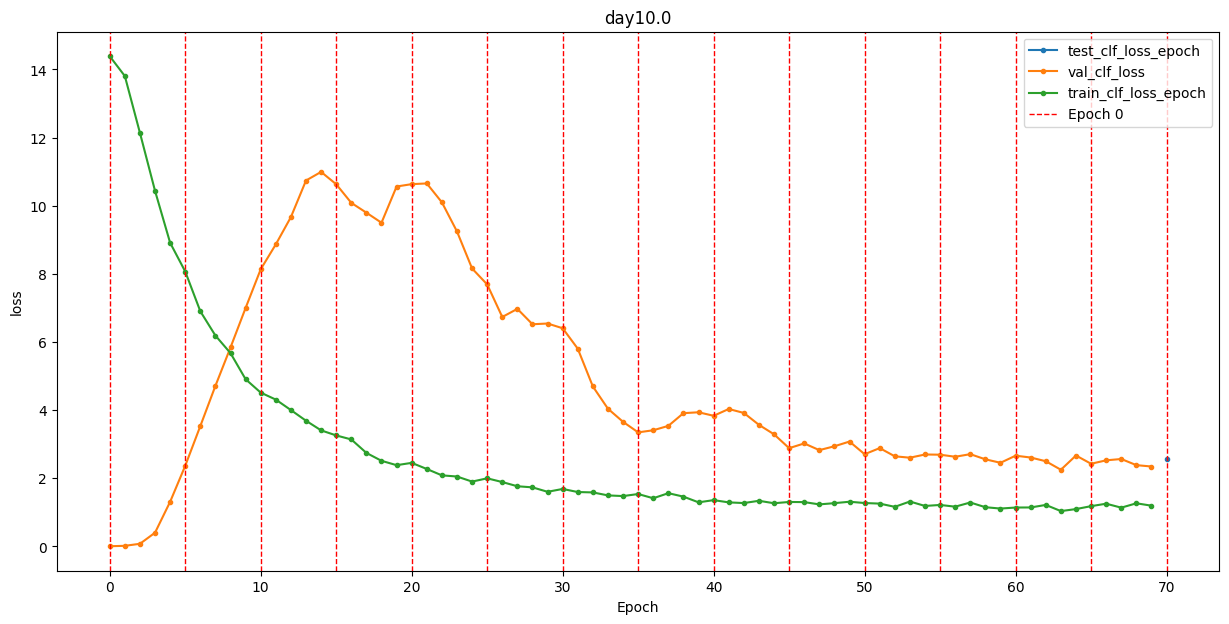

2025-03-12 11:28:35,711 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:28:35,726 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day10.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796897.GPU2.3578429.1 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day10.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796915.GPU2.3578429.2 
2025-03-12 11:28:35,727 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day10.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796915.GPU2.3578429.2 
2025-03-12 11:28:35,728 I

Free Memory Percentage: 35.35%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.817GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.819GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.817GB.

[INFO] more than 5% free memory, Auto select GPU device 1,- memory free: 38.819GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


2025-03-12 11:28:37,677 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
2025-03-12 11:28:37,680 INFO - pytorch_lightning.callbacks.model_summary - 
  | Name  | Type                                                         | Params
---------------------------------------------------------------------------------------
0 | model | SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial | 3.3 M 
---------------------------------------------------------------------------------------
3.3 M     Trainable params
0         Non-trainable params
3.3 M     Total params
13.111    Total estimated model params size (MB) 


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(15.1908, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(1.3789, device='cuda:1'), 'train_KLD_step': tensor(-7.0726, device='cuda:1'), 'train_clf_loss_step': tensor(13.8101, device='cuda:1'), 'val_loss': tensor(7.1124, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0310, device='cuda:1'), 'val_KLD': tensor(-0.3144, device='cuda:1'), 'val_clf_loss': tensor(6.0813, device='cuda:1'), 'train_loss_epoch': tensor(15.1908, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(1.3789, device='cuda:1'), 'train_KLD_epoch': tensor(-7.0726, device='cuda:1'), 'train_clf_loss_epoch': tensor(13.8101, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(14.1327, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(1.3392, device='cuda:1'), 'train_KLD_step': tensor(-7.6429, device='cuda:1'), 'train_clf_loss_step': tensor(12.7916, device='cuda:1'), 'val_loss': tensor(7.0480, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0258, device='cuda:1'), 'val_KLD': tensor(-0.8953, device='cuda:1'), 'val_clf_loss': tensor(6.0220, device='cuda:1'), 'train_loss_epoch': tensor(14.1327, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(1.3392, device='cuda:1'), 'train_KLD_epoch': tensor(-7.6429, device='cuda:1'), 'train_clf_loss_epoch': tensor(12.7916, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(12.7940, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(1.1647, device='cuda:1'), 'train_KLD_step': tensor(-9.6793, device='cuda:1'), 'train_clf_loss_step': tensor(11.6269, device='cuda:1'), 'val_loss': tensor(6.3368, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0129, device='cuda:1'), 'val_KLD': tensor(-5.3078, device='cuda:1'), 'val_clf_loss': tensor(5.3226, device='cuda:1'), 'train_loss_epoch': tensor(12.7940, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(1.1647, device='cuda:1'), 'train_KLD_epoch': tensor(-9.6793, device='cuda:1'), 'train_clf_loss_epoch': tensor(11.6269, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(11.2081, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(1.0194, device='cuda:1'), 'train_KLD_step': tensor(-11.4129, device='cuda:1'), 'train_clf_loss_step': tensor(10.1858, device='cuda:1'), 'val_loss': tensor(4.9348, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.2237, device='cuda:1'), 'val_KLD': tensor(-20.8208, device='cuda:1'), 'val_clf_loss': tensor(3.7059, device='cuda:1'), 'train_loss_epoch': tensor(11.2081, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(1.0194, device='cuda:1'), 'train_KLD_epoch': tensor(-11.4129, device='cuda:1'), 'train_clf_loss_epoch': tensor(10.1858, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.7920, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(1.0108, device='cuda:1'), 'train_KLD_step': tensor(-13.2052, device='cuda:1'), 'train_clf_loss_step': tensor(8.7779, device='cuda:1'), 'val_loss': tensor(3.5629, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.4961, device='cuda:1'), 'val_KLD': tensor(-56.1215, device='cuda:1'), 'val_clf_loss': tensor(2.0528, device='cuda:1'), 'train_loss_epoch': tensor(9.7920, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(1.0108, device='cuda:1'), 'train_KLD_epoch': tensor(-13.2052, device='cuda:1'), 'train_clf_loss_epoch': tensor(8.7779, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(8.5942, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.9358, device='cuda:1'), 'train_KLD_step': tensor(-15.8968, device='cuda:1'), 'train_clf_loss_step': tensor(7.6545, device='cuda:1'), 'val_loss': tensor(2.6784, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.6411, device='cuda:1'), 'val_KLD': tensor(-106.2856, device='cuda:1'), 'val_clf_loss': tensor(1.0106, device='cuda:1'), 'train_loss_epoch': tensor(8.5942, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.9358, device='cuda:1'), 'train_KLD_epoch': tensor(-15.8968, device='cuda:1'), 'train_clf_loss_epoch': tensor(7.6545, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.7738, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.9199, device='cuda:1'), 'train_KLD_step': tensor(-18.7199, device='cuda:1'), 'train_clf_loss_step': tensor(6.8492, device='cuda:1'), 'val_loss': tensor(2.2520, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.6730, device='cuda:1'), 'val_KLD': tensor(-145.0399, device='cuda:1'), 'val_clf_loss': tensor(0.5427, device='cuda:1'), 'train_loss_epoch': tensor(7.7738, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.9199, device='cuda:1'), 'train_KLD_epoch': tensor(-18.7199, device='cuda:1'), 'train_clf_loss_epoch': tensor(6.8492, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.9446, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.9062, device='cuda:1'), 'train_KLD_step': tensor(-21.5189, device='cuda:1'), 'train_clf_loss_step': tensor(6.0330, device='cuda:1'), 'val_loss': tensor(2.0087, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.5641, device='cuda:1'), 'val_KLD': tensor(-170.9200, device='cuda:1'), 'val_clf_loss': tensor(0.4019, device='cuda:1'), 'train_loss_epoch': tensor(6.9446, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.9062, device='cuda:1'), 'train_KLD_epoch': tensor(-21.5189, device='cuda:1'), 'train_clf_loss_epoch': tensor(6.0330, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.3125, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8751, device='cuda:1'), 'train_KLD_step': tensor(-24.1712, device='cuda:1'), 'train_clf_loss_step': tensor(5.4314, device='cuda:1'), 'val_loss': tensor(1.8280, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.5202, device='cuda:1'), 'val_KLD': tensor(-190.7942, device='cuda:1'), 'val_clf_loss': tensor(0.2602, device='cuda:1'), 'train_loss_epoch': tensor(6.3125, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8751, device='cuda:1'), 'train_KLD_epoch': tensor(-24.1712, device='cuda:1'), 'train_clf_loss_epoch': tensor(5.4314, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.7558, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8607, device='cuda:1'), 'train_KLD_step': tensor(-26.6515, device='cuda:1'), 'train_clf_loss_step': tensor(4.8885, device='cuda:1'), 'val_loss': tensor(1.6945, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.4794, device='cuda:1'), 'val_KLD': tensor(-196.5461, device='cuda:1'), 'val_clf_loss': tensor(0.1659, device='cuda:1'), 'train_loss_epoch': tensor(5.7558, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8607, device='cuda:1'), 'train_KLD_epoch': tensor(-26.6515, device='cuda:1'), 'train_clf_loss_epoch': tensor(4.8885, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.4571, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8420, device='cuda:1'), 'train_KLD_step': tensor(-29.2191, device='cuda:1'), 'train_clf_loss_step': tensor(4.6078, device='cuda:1'), 'val_loss': tensor(1.6827, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.4372, device='cuda:1'), 'val_KLD': tensor(-184.8218, device='cuda:1'), 'val_clf_loss': tensor(0.1993, device='cuda:1'), 'train_loss_epoch': tensor(5.4571, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8420, device='cuda:1'), 'train_KLD_epoch': tensor(-29.2191, device='cuda:1'), 'train_clf_loss_epoch': tensor(4.6078, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.9435, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8360, device='cuda:1'), 'train_KLD_step': tensor(-31.7093, device='cuda:1'), 'train_clf_loss_step': tensor(4.0996, device='cuda:1'), 'val_loss': tensor(1.7661, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.3950, device='cuda:1'), 'val_KLD': tensor(-168.6782, device='cuda:1'), 'val_clf_loss': tensor(0.3289, device='cuda:1'), 'train_loss_epoch': tensor(4.9435, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8360, device='cuda:1'), 'train_KLD_epoch': tensor(-31.7093, device='cuda:1'), 'train_clf_loss_epoch': tensor(4.0996, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.6017, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8289, device='cuda:1'), 'train_KLD_step': tensor(-33.9105, device='cuda:1'), 'train_clf_loss_step': tensor(3.7643, device='cuda:1'), 'val_loss': tensor(2.0935, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.3737, device='cuda:1'), 'val_KLD': tensor(-152.2756, device='cuda:1'), 'val_clf_loss': tensor(0.6817, device='cuda:1'), 'train_loss_epoch': tensor(4.6017, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8289, device='cuda:1'), 'train_KLD_epoch': tensor(-33.9105, device='cuda:1'), 'train_clf_loss_epoch': tensor(3.7643, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.3630, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8170, device='cuda:1'), 'train_KLD_step': tensor(-35.7757, device='cuda:1'), 'train_clf_loss_step': tensor(3.5371, device='cuda:1'), 'val_loss': tensor(2.3278, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.3413, device='cuda:1'), 'val_KLD': tensor(-140.3751, device='cuda:1'), 'val_clf_loss': tensor(0.9514, device='cuda:1'), 'train_loss_epoch': tensor(4.3630, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8170, device='cuda:1'), 'train_KLD_epoch': tensor(-35.7757, device='cuda:1'), 'train_clf_loss_epoch': tensor(3.5371, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.0313, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8151, device='cuda:1'), 'train_KLD_step': tensor(-37.2916, device='cuda:1'), 'train_clf_loss_step': tensor(3.2068, device='cuda:1'), 'val_loss': tensor(2.6443, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.3597, device='cuda:1'), 'val_KLD': tensor(-131.7222, device='cuda:1'), 'val_clf_loss': tensor(1.2517, device='cuda:1'), 'train_loss_epoch': tensor(4.0313, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8151, device='cuda:1'), 'train_KLD_epoch': tensor(-37.2916, device='cuda:1'), 'train_clf_loss_epoch': tensor(3.2068, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.9006, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8101, device='cuda:1'), 'train_KLD_step': tensor(-38.7543, device='cuda:1'), 'train_clf_loss_step': tensor(3.0809, device='cuda:1'), 'val_loss': tensor(3.0211, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.3263, device='cuda:1'), 'val_KLD': tensor(-121.4741, device='cuda:1'), 'val_clf_loss': tensor(1.6644, device='cuda:1'), 'train_loss_epoch': tensor(3.9006, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8101, device='cuda:1'), 'train_KLD_epoch': tensor(-38.7543, device='cuda:1'), 'train_clf_loss_epoch': tensor(3.0809, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.6691, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.8010, device='cuda:1'), 'train_KLD_step': tensor(-40.1946, device='cuda:1'), 'train_clf_loss_step': tensor(2.8581, device='cuda:1'), 'val_loss': tensor(3.3001, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.2736, device='cuda:1'), 'val_KLD': tensor(-111.0790, device='cuda:1'), 'val_clf_loss': tensor(1.9987, device='cuda:1'), 'train_loss_epoch': tensor(3.6691, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.8010, device='cuda:1'), 'train_KLD_epoch': tensor(-40.1946, device='cuda:1'), 'train_clf_loss_epoch': tensor(2.8581, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.2909, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7984, device='cuda:1'), 'train_KLD_step': tensor(-41.6337, device='cuda:1'), 'train_clf_loss_step': tensor(2.4822, device='cuda:1'), 'val_loss': tensor(3.6877, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.2461, device='cuda:1'), 'val_KLD': tensor(-106.0593, device='cuda:1'), 'val_clf_loss': tensor(2.4150, device='cuda:1'), 'train_loss_epoch': tensor(3.2909, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7984, device='cuda:1'), 'train_KLD_epoch': tensor(-41.6337, device='cuda:1'), 'train_clf_loss_epoch': tensor(2.4822, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.2196, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7941, device='cuda:1'), 'train_KLD_step': tensor(-42.8957, device='cuda:1'), 'train_clf_loss_step': tensor(2.4147, device='cuda:1'), 'val_loss': tensor(3.8825, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1940, device='cuda:1'), 'val_KLD': tensor(-100.5511, device='cuda:1'), 'val_clf_loss': tensor(2.6634, device='cuda:1'), 'train_loss_epoch': tensor(3.2196, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7941, device='cuda:1'), 'train_KLD_epoch': tensor(-42.8957, device='cuda:1'), 'train_clf_loss_epoch': tensor(2.4147, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.0250, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7913, device='cuda:1'), 'train_KLD_step': tensor(-44.0505, device='cuda:1'), 'train_clf_loss_step': tensor(2.2227, device='cuda:1'), 'val_loss': tensor(4.1800, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1817, device='cuda:1'), 'val_KLD': tensor(-99.3932, device='cuda:1'), 'val_clf_loss': tensor(2.9734, device='cuda:1'), 'train_loss_epoch': tensor(3.0250, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7913, device='cuda:1'), 'train_KLD_epoch': tensor(-44.0505, device='cuda:1'), 'train_clf_loss_epoch': tensor(2.2227, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9449, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7862, device='cuda:1'), 'train_KLD_step': tensor(-45.0839, device='cuda:1'), 'train_clf_loss_step': tensor(2.1474, device='cuda:1'), 'val_loss': tensor(4.4539, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1654, device='cuda:1'), 'val_KLD': tensor(-98.4513, device='cuda:1'), 'val_clf_loss': tensor(3.2639, device='cuda:1'), 'train_loss_epoch': tensor(2.9449, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7862, device='cuda:1'), 'train_KLD_epoch': tensor(-45.0839, device='cuda:1'), 'train_clf_loss_epoch': tensor(2.1474, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7345, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7782, device='cuda:1'), 'train_KLD_step': tensor(-46.0391, device='cuda:1'), 'train_clf_loss_step': tensor(1.9448, device='cuda:1'), 'val_loss': tensor(4.7351, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1563, device='cuda:1'), 'val_KLD': tensor(-96.9296, device='cuda:1'), 'val_clf_loss': tensor(3.5545, device='cuda:1'), 'train_loss_epoch': tensor(2.7345, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7782, device='cuda:1'), 'train_KLD_epoch': tensor(-46.0391, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.9448, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7219, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7753, device='cuda:1'), 'train_KLD_step': tensor(-46.9176, device='cuda:1'), 'train_clf_loss_step': tensor(1.9349, device='cuda:1'), 'val_loss': tensor(4.8662, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1390, device='cuda:1'), 'val_KLD': tensor(-94.5524, device='cuda:1'), 'val_clf_loss': tensor(3.7036, device='cuda:1'), 'train_loss_epoch': tensor(2.7219, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7753, device='cuda:1'), 'train_KLD_epoch': tensor(-46.9176, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.9349, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5382, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7737, device='cuda:1'), 'train_KLD_step': tensor(-47.7123, device='cuda:1'), 'train_clf_loss_step': tensor(1.7526, device='cuda:1'), 'val_loss': tensor(4.6979, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1215, device='cuda:1'), 'val_KLD': tensor(-92.4845, device='cuda:1'), 'val_clf_loss': tensor(3.5532, device='cuda:1'), 'train_loss_epoch': tensor(2.5382, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7737, device='cuda:1'), 'train_KLD_epoch': tensor(-47.7123, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.7526, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5289, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7689, device='cuda:1'), 'train_KLD_step': tensor(-48.3963, device='cuda:1'), 'train_clf_loss_step': tensor(1.7479, device='cuda:1'), 'val_loss': tensor(4.6423, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.1148, device='cuda:1'), 'val_KLD': tensor(-89.4173, device='cuda:1'), 'val_clf_loss': tensor(3.5052, device='cuda:1'), 'train_loss_epoch': tensor(2.5289, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7689, device='cuda:1'), 'train_KLD_epoch': tensor(-48.3963, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.7479, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4824, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7696, device='cuda:1'), 'train_KLD_step': tensor(-49.0948, device='cuda:1'), 'train_clf_loss_step': tensor(1.7005, device='cuda:1'), 'val_loss': tensor(4.6651, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0927, device='cuda:1'), 'val_KLD': tensor(-85.2185, device='cuda:1'), 'val_clf_loss': tensor(3.5512, device='cuda:1'), 'train_loss_epoch': tensor(2.4824, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7696, device='cuda:1'), 'train_KLD_epoch': tensor(-49.0948, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.7005, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4305, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7670, device='cuda:1'), 'train_KLD_step': tensor(-49.7625, device='cuda:1'), 'train_clf_loss_step': tensor(1.6511, device='cuda:1'), 'val_loss': tensor(4.3925, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0750, device='cuda:1'), 'val_KLD': tensor(-81.1314, device='cuda:1'), 'val_clf_loss': tensor(3.2972, device='cuda:1'), 'train_loss_epoch': tensor(2.4305, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7670, device='cuda:1'), 'train_KLD_epoch': tensor(-49.7625, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.6511, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3983, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7707, device='cuda:1'), 'train_KLD_step': tensor(-50.3232, device='cuda:1'), 'train_clf_loss_step': tensor(1.6150, device='cuda:1'), 'val_loss': tensor(4.3779, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0388, device='cuda:1'), 'val_KLD': tensor(-77.1743, device='cuda:1'), 'val_clf_loss': tensor(3.3198, device='cuda:1'), 'train_loss_epoch': tensor(2.3983, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7707, device='cuda:1'), 'train_KLD_epoch': tensor(-50.3232, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.6150, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1940, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7645, device='cuda:1'), 'train_KLD_step': tensor(-50.8280, device='cuda:1'), 'train_clf_loss_step': tensor(1.4168, device='cuda:1'), 'val_loss': tensor(4.0761, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0212, device='cuda:1'), 'val_KLD': tensor(-74.2649, device='cuda:1'), 'val_clf_loss': tensor(3.0364, device='cuda:1'), 'train_loss_epoch': tensor(2.1940, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7645, device='cuda:1'), 'train_KLD_epoch': tensor(-50.8280, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.4168, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1886, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7608, device='cuda:1'), 'train_KLD_step': tensor(-51.2356, device='cuda:1'), 'train_clf_loss_step': tensor(1.4150, device='cuda:1'), 'val_loss': tensor(4.1637, device='cuda:1'), 'val_Reconstruction_loss': tensor(1.0055, device='cuda:1'), 'val_KLD': tensor(-71.7389, device='cuda:1'), 'val_clf_loss': tensor(3.1402, device='cuda:1'), 'train_loss_epoch': tensor(2.1886, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7608, device='cuda:1'), 'train_KLD_epoch': tensor(-51.2356, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.4150, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1931, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7591, device='cuda:1'), 'train_KLD_step': tensor(-51.5649, device='cuda:1'), 'train_clf_loss_step': tensor(1.4211, device='cuda:1'), 'val_loss': tensor(4.0446, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9829, device='cuda:1'), 'val_KLD': tensor(-69.1113, device='cuda:1'), 'val_clf_loss': tensor(3.0444, device='cuda:1'), 'train_loss_epoch': tensor(2.1931, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7591, device='cuda:1'), 'train_KLD_epoch': tensor(-51.5649, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.4211, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2082, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7555, device='cuda:1'), 'train_KLD_step': tensor(-51.9023, device='cuda:1'), 'train_clf_loss_step': tensor(1.4398, device='cuda:1'), 'val_loss': tensor(3.9448, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9820, device='cuda:1'), 'val_KLD': tensor(-66.5661, device='cuda:1'), 'val_clf_loss': tensor(2.9461, device='cuda:1'), 'train_loss_epoch': tensor(2.2082, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7555, device='cuda:1'), 'train_KLD_epoch': tensor(-51.9023, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.4398, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1126, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7570, device='cuda:1'), 'train_KLD_step': tensor(-52.2427, device='cuda:1'), 'train_clf_loss_step': tensor(1.3425, device='cuda:1'), 'val_loss': tensor(3.8382, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9748, device='cuda:1'), 'val_KLD': tensor(-64.4083, device='cuda:1'), 'val_clf_loss': tensor(2.8472, device='cuda:1'), 'train_loss_epoch': tensor(2.1126, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7570, device='cuda:1'), 'train_KLD_epoch': tensor(-52.2427, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.3425, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0999, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7545, device='cuda:1'), 'train_KLD_step': tensor(-52.5380, device='cuda:1'), 'train_clf_loss_step': tensor(1.3323, device='cuda:1'), 'val_loss': tensor(3.6500, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9574, device='cuda:1'), 'val_KLD': tensor(-62.2605, device='cuda:1'), 'val_clf_loss': tensor(2.6770, device='cuda:1'), 'train_loss_epoch': tensor(2.0999, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7545, device='cuda:1'), 'train_KLD_epoch': tensor(-52.5380, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.3323, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1316, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7519, device='cuda:1'), 'train_KLD_step': tensor(-52.8563, device='cuda:1'), 'train_clf_loss_step': tensor(1.3665, device='cuda:1'), 'val_loss': tensor(3.7591, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9500, device='cuda:1'), 'val_KLD': tensor(-59.6332, device='cuda:1'), 'val_clf_loss': tensor(2.7942, device='cuda:1'), 'train_loss_epoch': tensor(2.1316, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7519, device='cuda:1'), 'train_KLD_epoch': tensor(-52.8563, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.3665, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0978, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7529, device='cuda:1'), 'train_KLD_step': tensor(-53.2052, device='cuda:1'), 'train_clf_loss_step': tensor(1.3316, device='cuda:1'), 'val_loss': tensor(3.5112, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9481, device='cuda:1'), 'val_KLD': tensor(-56.9520, device='cuda:1'), 'val_clf_loss': tensor(2.5489, device='cuda:1'), 'train_loss_epoch': tensor(2.0978, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7529, device='cuda:1'), 'train_KLD_epoch': tensor(-53.2052, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.3316, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0099, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7501, device='cuda:1'), 'train_KLD_step': tensor(-53.5667, device='cuda:1'), 'train_clf_loss_step': tensor(1.2465, device='cuda:1'), 'val_loss': tensor(3.4397, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9349, device='cuda:1'), 'val_KLD': tensor(-54.8180, device='cuda:1'), 'val_clf_loss': tensor(2.4912, device='cuda:1'), 'train_loss_epoch': tensor(2.0099, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7501, device='cuda:1'), 'train_KLD_epoch': tensor(-53.5667, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.2465, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0376, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7509, device='cuda:1'), 'train_KLD_step': tensor(-53.8687, device='cuda:1'), 'train_clf_loss_step': tensor(1.2731, device='cuda:1'), 'val_loss': tensor(3.2533, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9309, device='cuda:1'), 'val_KLD': tensor(-53.1485, device='cuda:1'), 'val_clf_loss': tensor(2.3091, device='cuda:1'), 'train_loss_epoch': tensor(2.0376, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7509, device='cuda:1'), 'train_KLD_epoch': tensor(-53.8687, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.2731, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0971, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7519, device='cuda:1'), 'train_KLD_step': tensor(-54.1044, device='cuda:1'), 'train_clf_loss_step': tensor(1.3317, device='cuda:1'), 'val_loss': tensor(3.2921, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9182, device='cuda:1'), 'val_KLD': tensor(-51.6380, device='cuda:1'), 'val_clf_loss': tensor(2.3609, device='cuda:1'), 'train_loss_epoch': tensor(2.0971, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7519, device='cuda:1'), 'train_KLD_epoch': tensor(-54.1044, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.3317, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9282, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7493, device='cuda:1'), 'train_KLD_step': tensor(-54.3100, device='cuda:1'), 'train_clf_loss_step': tensor(1.1653, device='cuda:1'), 'val_loss': tensor(3.3632, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9237, device='cuda:1'), 'val_KLD': tensor(-50.4725, device='cuda:1'), 'val_clf_loss': tensor(2.4269, device='cuda:1'), 'train_loss_epoch': tensor(1.9282, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7493, device='cuda:1'), 'train_KLD_epoch': tensor(-54.3100, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1653, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9177, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7514, device='cuda:1'), 'train_KLD_step': tensor(-54.4750, device='cuda:1'), 'train_clf_loss_step': tensor(1.1528, device='cuda:1'), 'val_loss': tensor(3.1896, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9142, device='cuda:1'), 'val_KLD': tensor(-50.0390, device='cuda:1'), 'val_clf_loss': tensor(2.2629, device='cuda:1'), 'train_loss_epoch': tensor(1.9177, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7514, device='cuda:1'), 'train_KLD_epoch': tensor(-54.4750, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1528, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8855, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7473, device='cuda:1'), 'train_KLD_step': tensor(-54.6586, device='cuda:1'), 'train_clf_loss_step': tensor(1.1245, device='cuda:1'), 'val_loss': tensor(3.2614, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9123, device='cuda:1'), 'val_KLD': tensor(-49.9329, device='cuda:1'), 'val_clf_loss': tensor(2.3366, device='cuda:1'), 'train_loss_epoch': tensor(1.8855, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7473, device='cuda:1'), 'train_KLD_epoch': tensor(-54.6586, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1245, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0133, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7484, device='cuda:1'), 'train_KLD_step': tensor(-54.8299, device='cuda:1'), 'train_clf_loss_step': tensor(1.2512, device='cuda:1'), 'val_loss': tensor(3.1333, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9087, device='cuda:1'), 'val_KLD': tensor(-49.8771, device='cuda:1'), 'val_clf_loss': tensor(2.2121, device='cuda:1'), 'train_loss_epoch': tensor(2.0133, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7484, device='cuda:1'), 'train_KLD_epoch': tensor(-54.8299, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.2512, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9413, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7467, device='cuda:1'), 'train_KLD_step': tensor(-54.9825, device='cuda:1'), 'train_clf_loss_step': tensor(1.1809, device='cuda:1'), 'val_loss': tensor(3.2641, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9015, device='cuda:1'), 'val_KLD': tensor(-49.6477, device='cuda:1'), 'val_clf_loss': tensor(2.3501, device='cuda:1'), 'train_loss_epoch': tensor(1.9413, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7467, device='cuda:1'), 'train_KLD_epoch': tensor(-54.9825, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1809, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8270, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7476, device='cuda:1'), 'train_KLD_step': tensor(-55.1309, device='cuda:1'), 'train_clf_loss_step': tensor(1.0657, device='cuda:1'), 'val_loss': tensor(3.0448, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8997, device='cuda:1'), 'val_KLD': tensor(-49.2967, device='cuda:1'), 'val_clf_loss': tensor(2.1328, device='cuda:1'), 'train_loss_epoch': tensor(1.8270, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7476, device='cuda:1'), 'train_KLD_epoch': tensor(-55.1309, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0657, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8961, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7449, device='cuda:1'), 'train_KLD_step': tensor(-55.2648, device='cuda:1'), 'train_clf_loss_step': tensor(1.1373, device='cuda:1'), 'val_loss': tensor(3.0297, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9036, device='cuda:1'), 'val_KLD': tensor(-48.8100, device='cuda:1'), 'val_clf_loss': tensor(2.1139, device='cuda:1'), 'train_loss_epoch': tensor(1.8961, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7449, device='cuda:1'), 'train_KLD_epoch': tensor(-55.2648, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1373, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8802, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7443, device='cuda:1'), 'train_KLD_step': tensor(-55.4063, device='cuda:1'), 'train_clf_loss_step': tensor(1.1220, device='cuda:1'), 'val_loss': tensor(3.0133, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9034, device='cuda:1'), 'val_KLD': tensor(-48.1010, device='cuda:1'), 'val_clf_loss': tensor(2.0979, device='cuda:1'), 'train_loss_epoch': tensor(1.8802, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7443, device='cuda:1'), 'train_KLD_epoch': tensor(-55.4063, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1220, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8051, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7441, device='cuda:1'), 'train_KLD_step': tensor(-55.5537, device='cuda:1'), 'train_clf_loss_step': tensor(1.0471, device='cuda:1'), 'val_loss': tensor(2.9676, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8928, device='cuda:1'), 'val_KLD': tensor(-46.9526, device='cuda:1'), 'val_clf_loss': tensor(2.0631, device='cuda:1'), 'train_loss_epoch': tensor(1.8051, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7441, device='cuda:1'), 'train_KLD_epoch': tensor(-55.5537, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0471, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0352, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7440, device='cuda:1'), 'train_KLD_step': tensor(-55.7189, device='cuda:1'), 'train_clf_loss_step': tensor(1.2773, device='cuda:1'), 'val_loss': tensor(2.9896, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8981, device='cuda:1'), 'val_KLD': tensor(-45.9631, device='cuda:1'), 'val_clf_loss': tensor(2.0800, device='cuda:1'), 'train_loss_epoch': tensor(2.0352, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7440, device='cuda:1'), 'train_KLD_epoch': tensor(-55.7189, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.2773, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9277, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7443, device='cuda:1'), 'train_KLD_step': tensor(-55.8835, device='cuda:1'), 'train_clf_loss_step': tensor(1.1694, device='cuda:1'), 'val_loss': tensor(3.1768, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8911, device='cuda:1'), 'val_KLD': tensor(-45.2042, device='cuda:1'), 'val_clf_loss': tensor(2.2745, device='cuda:1'), 'train_loss_epoch': tensor(1.9277, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7443, device='cuda:1'), 'train_KLD_epoch': tensor(-55.8835, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1694, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9023, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7446, device='cuda:1'), 'train_KLD_step': tensor(-56.0409, device='cuda:1'), 'train_clf_loss_step': tensor(1.1436, device='cuda:1'), 'val_loss': tensor(3.1854, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8982, device='cuda:1'), 'val_KLD': tensor(-44.5675, device='cuda:1'), 'val_clf_loss': tensor(2.2761, device='cuda:1'), 'train_loss_epoch': tensor(1.9023, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7446, device='cuda:1'), 'train_KLD_epoch': tensor(-56.0409, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1436, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8667, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7433, device='cuda:1'), 'train_KLD_step': tensor(-56.1602, device='cuda:1'), 'train_clf_loss_step': tensor(1.1094, device='cuda:1'), 'val_loss': tensor(3.1671, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.9023, device='cuda:1'), 'val_KLD': tensor(-43.9099, device='cuda:1'), 'val_clf_loss': tensor(2.2538, device='cuda:1'), 'train_loss_epoch': tensor(1.8667, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7433, device='cuda:1'), 'train_KLD_epoch': tensor(-56.1602, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1094, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8126, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7417, device='cuda:1'), 'train_KLD_step': tensor(-56.2515, device='cuda:1'), 'train_clf_loss_step': tensor(1.0568, device='cuda:1'), 'val_loss': tensor(3.3242, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8983, device='cuda:1'), 'val_KLD': tensor(-43.3855, device='cuda:1'), 'val_clf_loss': tensor(2.4150, device='cuda:1'), 'train_loss_epoch': tensor(1.8126, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7417, device='cuda:1'), 'train_KLD_epoch': tensor(-56.2515, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0568, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8140, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7412, device='cuda:1'), 'train_KLD_step': tensor(-56.3403, device='cuda:1'), 'train_clf_loss_step': tensor(1.0587, device='cuda:1'), 'val_loss': tensor(3.2649, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8965, device='cuda:1'), 'val_KLD': tensor(-43.0079, device='cuda:1'), 'val_clf_loss': tensor(2.3576, device='cuda:1'), 'train_loss_epoch': tensor(1.8140, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7412, device='cuda:1'), 'train_KLD_epoch': tensor(-56.3403, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0587, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8760, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7431, device='cuda:1'), 'train_KLD_step': tensor(-56.4195, device='cuda:1'), 'train_clf_loss_step': tensor(1.1188, device='cuda:1'), 'val_loss': tensor(3.3227, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8961, device='cuda:1'), 'val_KLD': tensor(-42.8671, device='cuda:1'), 'val_clf_loss': tensor(2.4159, device='cuda:1'), 'train_loss_epoch': tensor(1.8760, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7431, device='cuda:1'), 'train_KLD_epoch': tensor(-56.4195, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1188, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8907, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7413, device='cuda:1'), 'train_KLD_step': tensor(-56.4903, device='cuda:1'), 'train_clf_loss_step': tensor(1.1353, device='cuda:1'), 'val_loss': tensor(3.3339, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8821, device='cuda:1'), 'val_KLD': tensor(-42.7800, device='cuda:1'), 'val_clf_loss': tensor(2.4411, device='cuda:1'), 'train_loss_epoch': tensor(1.8907, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7413, device='cuda:1'), 'train_KLD_epoch': tensor(-56.4903, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1353, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8134, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7406, device='cuda:1'), 'train_KLD_step': tensor(-56.5540, device='cuda:1'), 'train_clf_loss_step': tensor(1.0586, device='cuda:1'), 'val_loss': tensor(3.2630, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8835, device='cuda:1'), 'val_KLD': tensor(-42.7303, device='cuda:1'), 'val_clf_loss': tensor(2.3688, device='cuda:1'), 'train_loss_epoch': tensor(1.8134, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7406, device='cuda:1'), 'train_KLD_epoch': tensor(-56.5540, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0586, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7845, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7407, device='cuda:1'), 'train_KLD_step': tensor(-56.6205, device='cuda:1'), 'train_clf_loss_step': tensor(1.0297, device='cuda:1'), 'val_loss': tensor(3.2056, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8843, device='cuda:1'), 'val_KLD': tensor(-42.8345, device='cuda:1'), 'val_clf_loss': tensor(2.3106, device='cuda:1'), 'train_loss_epoch': tensor(1.7845, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7407, device='cuda:1'), 'train_KLD_epoch': tensor(-56.6205, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0297, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7977, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7420, device='cuda:1'), 'train_KLD_step': tensor(-56.6782, device='cuda:1'), 'train_clf_loss_step': tensor(1.0415, device='cuda:1'), 'val_loss': tensor(3.1049, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8905, device='cuda:1'), 'val_KLD': tensor(-42.9556, device='cuda:1'), 'val_clf_loss': tensor(2.2037, device='cuda:1'), 'train_loss_epoch': tensor(1.7977, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7420, device='cuda:1'), 'train_KLD_epoch': tensor(-56.6782, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0415, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7545, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7407, device='cuda:1'), 'train_KLD_step': tensor(-56.7246, device='cuda:1'), 'train_clf_loss_step': tensor(0.9995, device='cuda:1'), 'val_loss': tensor(3.1698, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8859, device='cuda:1'), 'val_KLD': tensor(-43.2205, device='cuda:1'), 'val_clf_loss': tensor(2.2731, device='cuda:1'), 'train_loss_epoch': tensor(1.7545, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7407, device='cuda:1'), 'train_KLD_epoch': tensor(-56.7246, device='cuda:1'), 'train_clf_loss_epoch': tensor(0.9995, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8396, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7399, device='cuda:1'), 'train_KLD_step': tensor(-56.7558, device='cuda:1'), 'train_clf_loss_step': tensor(1.0855, device='cuda:1'), 'val_loss': tensor(3.1311, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8929, device='cuda:1'), 'val_KLD': tensor(-43.4672, device='cuda:1'), 'val_clf_loss': tensor(2.2273, device='cuda:1'), 'train_loss_epoch': tensor(1.8396, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7399, device='cuda:1'), 'train_KLD_epoch': tensor(-56.7558, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0855, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7990, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7399, device='cuda:1'), 'train_KLD_step': tensor(-56.7793, device='cuda:1'), 'train_clf_loss_step': tensor(1.0449, device='cuda:1'), 'val_loss': tensor(3.2150, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8850, device='cuda:1'), 'val_KLD': tensor(-43.6781, device='cuda:1'), 'val_clf_loss': tensor(2.3191, device='cuda:1'), 'train_loss_epoch': tensor(1.7990, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7399, device='cuda:1'), 'train_KLD_epoch': tensor(-56.7793, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0449, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7326, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7421, device='cuda:1'), 'train_KLD_step': tensor(-56.7983, device='cuda:1'), 'train_clf_loss_step': tensor(0.9763, device='cuda:1'), 'val_loss': tensor(3.2463, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8828, device='cuda:1'), 'val_KLD': tensor(-43.8678, device='cuda:1'), 'val_clf_loss': tensor(2.3525, device='cuda:1'), 'train_loss_epoch': tensor(1.7326, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7421, device='cuda:1'), 'train_KLD_epoch': tensor(-56.7983, device='cuda:1'), 'train_clf_loss_epoch': tensor(0.9763, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7182, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7392, device='cuda:1'), 'train_KLD_step': tensor(-56.8024, device='cuda:1'), 'train_clf_loss_step': tensor(0.9648, device='cuda:1'), 'val_loss': tensor(3.2194, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8858, device='cuda:1'), 'val_KLD': tensor(-43.9439, device='cuda:1'), 'val_clf_loss': tensor(2.3227, device='cuda:1'), 'train_loss_epoch': tensor(1.7182, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7392, device='cuda:1'), 'train_KLD_epoch': tensor(-56.8024, device='cuda:1'), 'train_clf_loss_epoch': tensor(0.9648, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8203, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7403, device='cuda:1'), 'train_KLD_step': tensor(-56.8043, device='cuda:1'), 'train_clf_loss_step': tensor(1.0658, device='cuda:1'), 'val_loss': tensor(3.0940, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8787, device='cuda:1'), 'val_KLD': tensor(-43.9702, device='cuda:1'), 'val_clf_loss': tensor(2.2043, device='cuda:1'), 'train_loss_epoch': tensor(1.8203, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7403, device='cuda:1'), 'train_KLD_epoch': tensor(-56.8043, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0658, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9053, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7394, device='cuda:1'), 'train_KLD_step': tensor(-56.8176, device='cuda:1'), 'train_clf_loss_step': tensor(1.1517, device='cuda:1'), 'val_loss': tensor(3.2837, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8885, device='cuda:1'), 'val_KLD': tensor(-43.9463, device='cuda:1'), 'val_clf_loss': tensor(2.3842, device='cuda:1'), 'train_loss_epoch': tensor(1.9053, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7394, device='cuda:1'), 'train_KLD_epoch': tensor(-56.8176, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1517, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9348, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7382, device='cuda:1'), 'train_KLD_step': tensor(-56.8340, device='cuda:1'), 'train_clf_loss_step': tensor(1.1824, device='cuda:1'), 'val_loss': tensor(2.9127, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8782, device='cuda:1'), 'val_KLD': tensor(-43.9552, device='cuda:1'), 'val_clf_loss': tensor(2.0235, device='cuda:1'), 'train_loss_epoch': tensor(1.9348, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7382, device='cuda:1'), 'train_KLD_epoch': tensor(-56.8340, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.1824, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6305, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7372, device='cuda:1'), 'train_KLD_step': tensor(-56.8695, device='cuda:1'), 'train_clf_loss_step': tensor(0.8791, device='cuda:1'), 'val_loss': tensor(3.1310, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8823, device='cuda:1'), 'val_KLD': tensor(-43.8832, device='cuda:1'), 'val_clf_loss': tensor(2.2377, device='cuda:1'), 'train_loss_epoch': tensor(1.6305, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7372, device='cuda:1'), 'train_KLD_epoch': tensor(-56.8695, device='cuda:1'), 'train_clf_loss_epoch': tensor(0.8791, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9601, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7383, device='cuda:1'), 'train_KLD_step': tensor(-56.9049, device='cuda:1'), 'train_clf_loss_step': tensor(1.2076, device='cuda:1'), 'val_loss': tensor(3.0159, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8836, device='cuda:1'), 'val_KLD': tensor(-43.7385, device='cuda:1'), 'val_clf_loss': tensor(2.1213, device='cuda:1'), 'train_loss_epoch': tensor(1.9601, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7383, device='cuda:1'), 'train_KLD_epoch': tensor(-56.9049, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.2076, device='cuda:1')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:28:56,605 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.7506, device='cuda:1'), 'train_Reconstruction_loss_step': tensor(0.7363, device='cuda:1'), 'train_KLD_step': tensor(-56.9604, device='cuda:1'), 'train_clf_loss_step': tensor(1.0000, device='cuda:1'), 'val_loss': tensor(3.0711, device='cuda:1'), 'val_Reconstruction_loss': tensor(0.8772, device='cuda:1'), 'val_KLD': tensor(-43.6068, device='cuda:1'), 'val_clf_loss': tensor(2.1830, device='cuda:1'), 'train_loss_epoch': tensor(1.7506, device='cuda:1'), 'train_Reconstruction_loss_epoch': tensor(0.7363, device='cuda:1'), 'train_KLD_epoch': tensor(-56.9604, device='cuda:1'), 'train_clf_loss_epoch': tensor(1.0000, device='cuda:1')}


2025-03-12 11:28:56,630 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │       -43.60682678222656       │
│ test_Reconstruction_loss_epoch │       0.8785789012908936       │
│      test_clf_loss_epoch       │       2.227308750152588        │
│        test_loss_epoch         │       3.1167893409729004       │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:28:56,684 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 3.1167893409729004, 'test_Reconstruction_loss_epoch': 0.8785789012908936, 'test_KLD_epoch': -43.60682678222656, 'test_clf_loss_epoch': 2.227308750152588}] 
2025-03-12 11:28:56,689 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:28:56,735 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:28:56,770 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:28:56,771 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:28:56,772 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:28:56,788 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day12.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796917.GPU2.3578429.3 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day12.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796936.GPU2.3578429.4 
2025-03-12 11:28:56,789 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

<Figure size 1500x700 with 0 Axes>

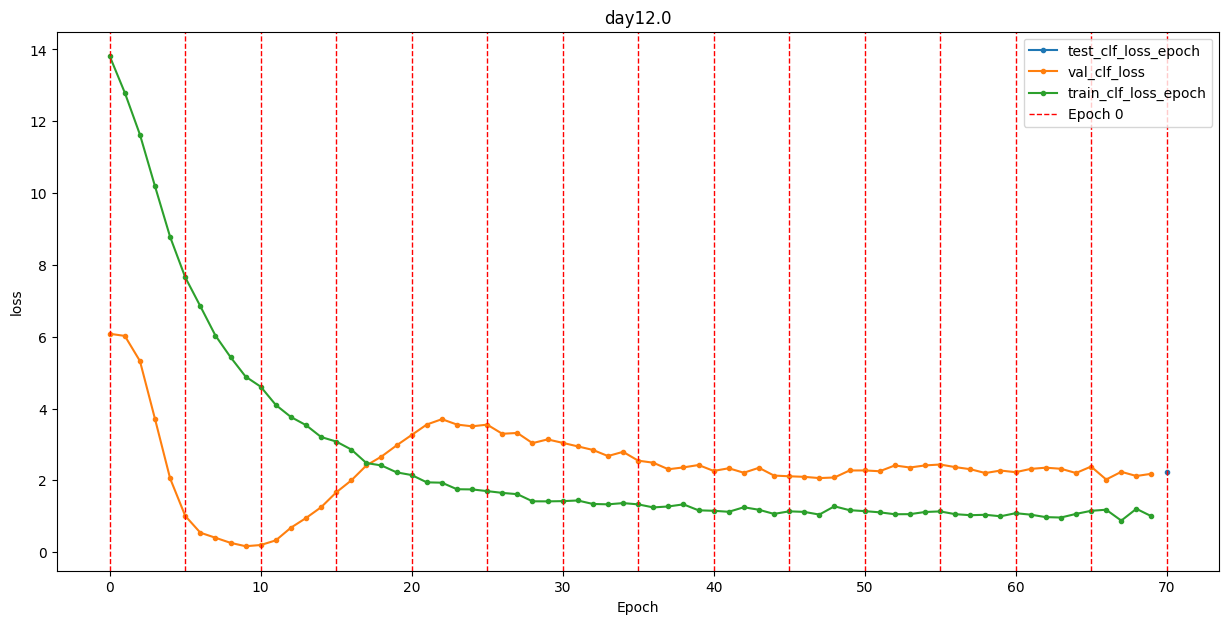

2025-03-12 11:28:57,233 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:28:57,249 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day12.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796917.GPU2.3578429.3 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day12.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796936.GPU2.3578429.4 
2025-03-12 11:28:57,250 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day12.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796936.GPU2.3578429.4 
2025-03-12 11:28:57,251 I

Free Memory Percentage: 35.15%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.819GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.257GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.817GB.

[INFO] more than 5% free memory, Auto select GPU device 2,- memory free: 38.819GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(13.4407, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.3804, device='cuda:2'), 'train_KLD_step': tensor(-7.0539, device='cuda:2'), 'train_clf_loss_step': tensor(12.0585, device='cuda:2'), 'val_loss': tensor(19.7216, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2157, device='cuda:2'), 'val_KLD': tensor(-0.3652, device='cuda:2'), 'val_clf_loss': tensor(18.5058, device='cuda:2'), 'train_loss_epoch': tensor(13.4407, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.3804, device='cuda:2'), 'train_KLD_epoch': tensor(-7.0539, device='cuda:2'), 'train_clf_loss_epoch': tensor(12.0585, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(12.8993, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.3486, device='cuda:2'), 'train_KLD_step': tensor(-7.8607, device='cuda:2'), 'train_clf_loss_step': tensor(11.5487, device='cuda:2'), 'val_loss': tensor(18.8765, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2096, device='cuda:2'), 'val_KLD': tensor(-2.1827, device='cuda:2'), 'val_clf_loss': tensor(17.6664, device='cuda:2'), 'train_loss_epoch': tensor(12.8993, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.3486, device='cuda:2'), 'train_KLD_epoch': tensor(-7.8607, device='cuda:2'), 'train_clf_loss_epoch': tensor(11.5487, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(11.0449, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.1379, device='cuda:2'), 'train_KLD_step': tensor(-9.1819, device='cuda:2'), 'train_clf_loss_step': tensor(9.9047, device='cuda:2'), 'val_loss': tensor(16.4392, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2054, device='cuda:2'), 'val_KLD': tensor(-18.0855, device='cuda:2'), 'val_clf_loss': tensor(15.2293, device='cuda:2'), 'train_loss_epoch': tensor(11.0449, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.1379, device='cuda:2'), 'train_KLD_epoch': tensor(-9.1819, device='cuda:2'), 'train_clf_loss_epoch': tensor(9.9047, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.7157, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9894, device='cuda:2'), 'train_KLD_step': tensor(-11.7751, device='cuda:2'), 'train_clf_loss_step': tensor(8.7233, device='cuda:2'), 'val_loss': tensor(12.3049, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2929, device='cuda:2'), 'val_KLD': tensor(-52.0089, device='cuda:2'), 'val_clf_loss': tensor(10.9990, device='cuda:2'), 'train_loss_epoch': tensor(9.7157, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9894, device='cuda:2'), 'train_KLD_epoch': tensor(-11.7751, device='cuda:2'), 'train_clf_loss_epoch': tensor(8.7233, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(8.0900, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9412, device='cuda:2'), 'train_KLD_step': tensor(-14.2112, device='cuda:2'), 'train_clf_loss_step': tensor(7.1452, device='cuda:2'), 'val_loss': tensor(9.4047, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.5761, device='cuda:2'), 'val_KLD': tensor(-157.5135, device='cuda:2'), 'val_clf_loss': tensor(7.7891, device='cuda:2'), 'train_loss_epoch': tensor(8.0900, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9412, device='cuda:2'), 'train_KLD_epoch': tensor(-14.2112, device='cuda:2'), 'train_clf_loss_epoch': tensor(7.1452, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.1354, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9017, device='cuda:2'), 'train_KLD_step': tensor(-16.6311, device='cuda:2'), 'train_clf_loss_step': tensor(6.2295, device='cuda:2'), 'val_loss': tensor(7.7859, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.7953, device='cuda:2'), 'val_KLD': tensor(-317.3060, device='cuda:2'), 'val_clf_loss': tensor(5.9112, device='cuda:2'), 'train_loss_epoch': tensor(7.1354, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9017, device='cuda:2'), 'train_KLD_epoch': tensor(-16.6311, device='cuda:2'), 'train_clf_loss_epoch': tensor(6.2295, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.4142, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8933, device='cuda:2'), 'train_KLD_step': tensor(-19.2319, device='cuda:2'), 'train_clf_loss_step': tensor(5.5161, device='cuda:2'), 'val_loss': tensor(6.5146, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.7356, device='cuda:2'), 'val_KLD': tensor(-419.7508, device='cuda:2'), 'val_clf_loss': tensor(4.6741, device='cuda:2'), 'train_loss_epoch': tensor(6.4142, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8933, device='cuda:2'), 'train_KLD_epoch': tensor(-19.2319, device='cuda:2'), 'train_clf_loss_epoch': tensor(5.5161, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.7264, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8652, device='cuda:2'), 'train_KLD_step': tensor(-21.9406, device='cuda:2'), 'train_clf_loss_step': tensor(4.8556, device='cuda:2'), 'val_loss': tensor(5.4587, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.6424, device='cuda:2'), 'val_KLD': tensor(-473.9573, device='cuda:2'), 'val_clf_loss': tensor(3.6978, device='cuda:2'), 'train_loss_epoch': tensor(5.7264, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8652, device='cuda:2'), 'train_KLD_epoch': tensor(-21.9406, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.8556, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.3408, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8574, device='cuda:2'), 'train_KLD_step': tensor(-24.5919, device='cuda:2'), 'train_clf_loss_step': tensor(4.4772, device='cuda:2'), 'val_loss': tensor(4.4311, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.4895, device='cuda:2'), 'val_KLD': tensor(-462.3677, device='cuda:2'), 'val_clf_loss': tensor(2.8260, device='cuda:2'), 'train_loss_epoch': tensor(5.3408, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8574, device='cuda:2'), 'train_KLD_epoch': tensor(-24.5919, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.4772, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.7382, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8575, device='cuda:2'), 'train_KLD_step': tensor(-27.1459, device='cuda:2'), 'train_clf_loss_step': tensor(3.8738, device='cuda:2'), 'val_loss': tensor(3.5763, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.3801, device='cuda:2'), 'val_KLD': tensor(-443.6863, device='cuda:2'), 'val_clf_loss': tensor(2.0853, device='cuda:2'), 'train_loss_epoch': tensor(4.7382, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8575, device='cuda:2'), 'train_KLD_epoch': tensor(-27.1459, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.8738, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.4775, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8513, device='cuda:2'), 'train_KLD_step': tensor(-29.3946, device='cuda:2'), 'train_clf_loss_step': tensor(3.6188, device='cuda:2'), 'val_loss': tensor(2.9823, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.3997, device='cuda:2'), 'val_KLD': tensor(-425.0969, device='cuda:2'), 'val_clf_loss': tensor(1.4763, device='cuda:2'), 'train_loss_epoch': tensor(4.4775, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8513, device='cuda:2'), 'train_KLD_epoch': tensor(-29.3946, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.6188, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.1214, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8478, device='cuda:2'), 'train_KLD_step': tensor(-31.4226, device='cuda:2'), 'train_clf_loss_step': tensor(3.2657, device='cuda:2'), 'val_loss': tensor(2.4691, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.3702, device='cuda:2'), 'val_KLD': tensor(-388.9983, device='cuda:2'), 'val_clf_loss': tensor(1.0016, device='cuda:2'), 'train_loss_epoch': tensor(4.1214, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8478, device='cuda:2'), 'train_KLD_epoch': tensor(-31.4226, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.2657, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.9556, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8496, device='cuda:2'), 'train_KLD_step': tensor(-33.5093, device='cuda:2'), 'train_clf_loss_step': tensor(3.0977, device='cuda:2'), 'val_loss': tensor(2.1302, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.3829, device='cuda:2'), 'val_KLD': tensor(-374.8900, device='cuda:2'), 'val_clf_loss': tensor(0.6536, device='cuda:2'), 'train_loss_epoch': tensor(3.9556, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8496, device='cuda:2'), 'train_KLD_epoch': tensor(-33.5093, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.0977, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.5167, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8458, device='cuda:2'), 'train_KLD_step': tensor(-35.5319, device='cuda:2'), 'train_clf_loss_step': tensor(2.6621, device='cuda:2'), 'val_loss': tensor(1.9303, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.4524, device='cuda:2'), 'val_KLD': tensor(-365.4982, device='cuda:2'), 'val_clf_loss': tensor(0.3866, device='cuda:2'), 'train_loss_epoch': tensor(3.5167, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8458, device='cuda:2'), 'train_KLD_epoch': tensor(-35.5319, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.6621, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.4663, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8408, device='cuda:2'), 'train_KLD_step': tensor(-37.5745, device='cuda:2'), 'train_clf_loss_step': tensor(2.6161, device='cuda:2'), 'val_loss': tensor(1.7195, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.4309, device='cuda:2'), 'val_KLD': tensor(-361.0426, device='cuda:2'), 'val_clf_loss': tensor(0.1983, device='cuda:2'), 'train_loss_epoch': tensor(3.4663, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8408, device='cuda:2'), 'train_KLD_epoch': tensor(-37.5745, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.6161, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3666, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8395, device='cuda:2'), 'train_KLD_step': tensor(-39.5239, device='cuda:2'), 'train_clf_loss_step': tensor(2.5172, device='cuda:2'), 'val_loss': tensor(1.5538, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.3925, device='cuda:2'), 'val_KLD': tensor(-338.0946, device='cuda:2'), 'val_clf_loss': tensor(0.0768, device='cuda:2'), 'train_loss_epoch': tensor(3.3666, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8395, device='cuda:2'), 'train_KLD_epoch': tensor(-39.5239, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.5172, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1592, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8281, device='cuda:2'), 'train_KLD_step': tensor(-41.4246, device='cuda:2'), 'train_clf_loss_step': tensor(2.3208, device='cuda:2'), 'val_loss': tensor(1.4101, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.3139, device='cuda:2'), 'val_KLD': tensor(-317.3013, device='cuda:2'), 'val_clf_loss': tensor(0.0169, device='cuda:2'), 'train_loss_epoch': tensor(3.1592, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8281, device='cuda:2'), 'train_KLD_epoch': tensor(-41.4246, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.3208, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9910, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8258, device='cuda:2'), 'train_KLD_step': tensor(-43.0270, device='cuda:2'), 'train_clf_loss_step': tensor(2.1545, device='cuda:2'), 'val_loss': tensor(1.3639, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2858, device='cuda:2'), 'val_KLD': tensor(-311.1447, device='cuda:2'), 'val_clf_loss': tensor(0.0004, device='cuda:2'), 'train_loss_epoch': tensor(2.9910, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8258, device='cuda:2'), 'train_KLD_epoch': tensor(-43.0270, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.1545, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7513, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8184, device='cuda:2'), 'train_KLD_step': tensor(-44.2183, device='cuda:2'), 'train_clf_loss_step': tensor(1.9219, device='cuda:2'), 'val_loss': tensor(1.3511, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2591, device='cuda:2'), 'val_KLD': tensor(-302.0293, device='cuda:2'), 'val_clf_loss': tensor(0.0165, device='cuda:2'), 'train_loss_epoch': tensor(2.7513, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8184, device='cuda:2'), 'train_KLD_epoch': tensor(-44.2183, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.9219, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6476, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8124, device='cuda:2'), 'train_KLD_step': tensor(-45.2611, device='cuda:2'), 'train_clf_loss_step': tensor(1.8238, device='cuda:2'), 'val_loss': tensor(1.3302, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.2124, device='cuda:2'), 'val_KLD': tensor(-283.0909, device='cuda:2'), 'val_clf_loss': tensor(0.0471, device='cuda:2'), 'train_loss_epoch': tensor(2.6476, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8124, device='cuda:2'), 'train_KLD_epoch': tensor(-45.2611, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8238, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6022, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8076, device='cuda:2'), 'train_KLD_step': tensor(-46.2479, device='cuda:2'), 'train_clf_loss_step': tensor(1.7830, device='cuda:2'), 'val_loss': tensor(1.3507, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1961, device='cuda:2'), 'val_KLD': tensor(-255.1679, device='cuda:2'), 'val_clf_loss': tensor(0.0909, device='cuda:2'), 'train_loss_epoch': tensor(2.6022, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8076, device='cuda:2'), 'train_KLD_epoch': tensor(-46.2479, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.7830, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4498, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8068, device='cuda:2'), 'train_KLD_step': tensor(-47.2009, device='cuda:2'), 'train_clf_loss_step': tensor(1.6312, device='cuda:2'), 'val_loss': tensor(1.3480, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1587, device='cuda:2'), 'val_KLD': tensor(-222.8785, device='cuda:2'), 'val_clf_loss': tensor(0.1336, device='cuda:2'), 'train_loss_epoch': tensor(2.4498, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8068, device='cuda:2'), 'train_KLD_epoch': tensor(-47.2009, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.6312, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4676, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8068, device='cuda:2'), 'train_KLD_step': tensor(-48.1901, device='cuda:2'), 'train_clf_loss_step': tensor(1.6488, device='cuda:2'), 'val_loss': tensor(1.3411, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1134, device='cuda:2'), 'val_KLD': tensor(-192.8828, device='cuda:2'), 'val_clf_loss': tensor(0.1795, device='cuda:2'), 'train_loss_epoch': tensor(2.4676, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8068, device='cuda:2'), 'train_KLD_epoch': tensor(-48.1901, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.6488, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3753, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8006, device='cuda:2'), 'train_KLD_step': tensor(-49.2324, device='cuda:2'), 'train_clf_loss_step': tensor(1.5623, device='cuda:2'), 'val_loss': tensor(1.3258, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0706, device='cuda:2'), 'val_KLD': tensor(-165.5267, device='cuda:2'), 'val_clf_loss': tensor(0.2139, device='cuda:2'), 'train_loss_epoch': tensor(2.3753, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8006, device='cuda:2'), 'train_KLD_epoch': tensor(-49.2324, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5623, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2542, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7988, device='cuda:2'), 'train_KLD_step': tensor(-50.2272, device='cuda:2'), 'train_clf_loss_step': tensor(1.4428, device='cuda:2'), 'val_loss': tensor(1.2921, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0354, device='cuda:2'), 'val_KLD': tensor(-147.4326, device='cuda:2'), 'val_clf_loss': tensor(0.2198, device='cuda:2'), 'train_loss_epoch': tensor(2.2542, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7988, device='cuda:2'), 'train_KLD_epoch': tensor(-50.2272, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4428, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1691, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7943, device='cuda:2'), 'train_KLD_step': tensor(-51.0598, device='cuda:2'), 'train_clf_loss_step': tensor(1.3620, device='cuda:2'), 'val_loss': tensor(1.2807, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0217, device='cuda:2'), 'val_KLD': tensor(-136.8029, device='cuda:2'), 'val_clf_loss': tensor(0.2248, device='cuda:2'), 'train_loss_epoch': tensor(2.1691, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7943, device='cuda:2'), 'train_KLD_epoch': tensor(-51.0598, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3620, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1741, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7878, device='cuda:2'), 'train_KLD_step': tensor(-51.7468, device='cuda:2'), 'train_clf_loss_step': tensor(1.3734, device='cuda:2'), 'val_loss': tensor(1.2716, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0177, device='cuda:2'), 'val_KLD': tensor(-129.6304, device='cuda:2'), 'val_clf_loss': tensor(0.2215, device='cuda:2'), 'train_loss_epoch': tensor(2.1741, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7878, device='cuda:2'), 'train_KLD_epoch': tensor(-51.7468, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3734, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1915, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7893, device='cuda:2'), 'train_KLD_step': tensor(-52.2786, device='cuda:2'), 'train_clf_loss_step': tensor(1.3891, device='cuda:2'), 'val_loss': tensor(1.2606, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0028, device='cuda:2'), 'val_KLD': tensor(-121.8282, device='cuda:2'), 'val_clf_loss': tensor(0.2274, device='cuda:2'), 'train_loss_epoch': tensor(2.1915, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7893, device='cuda:2'), 'train_KLD_epoch': tensor(-52.2786, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3891, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0871, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7819, device='cuda:2'), 'train_KLD_step': tensor(-52.8707, device='cuda:2'), 'train_clf_loss_step': tensor(1.2920, device='cuda:2'), 'val_loss': tensor(1.2069, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9739, device='cuda:2'), 'val_KLD': tensor(-113.7966, device='cuda:2'), 'val_clf_loss': tensor(0.2045, device='cuda:2'), 'train_loss_epoch': tensor(2.0871, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7819, device='cuda:2'), 'train_KLD_epoch': tensor(-52.8707, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2920, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9428, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7813, device='cuda:2'), 'train_KLD_step': tensor(-53.5108, device='cuda:2'), 'train_clf_loss_step': tensor(1.1481, device='cuda:2'), 'val_loss': tensor(1.2537, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9630, device='cuda:2'), 'val_KLD': tensor(-106.5821, device='cuda:2'), 'val_clf_loss': tensor(0.2641, device='cuda:2'), 'train_loss_epoch': tensor(1.9428, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7813, device='cuda:2'), 'train_KLD_epoch': tensor(-53.5108, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1481, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0502, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7804, device='cuda:2'), 'train_KLD_step': tensor(-54.1239, device='cuda:2'), 'train_clf_loss_step': tensor(1.2562, device='cuda:2'), 'val_loss': tensor(1.3575, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9605, device='cuda:2'), 'val_KLD': tensor(-99.3550, device='cuda:2'), 'val_clf_loss': tensor(0.3721, device='cuda:2'), 'train_loss_epoch': tensor(2.0502, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7804, device='cuda:2'), 'train_KLD_epoch': tensor(-54.1239, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2562, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8781, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7790, device='cuda:2'), 'train_KLD_step': tensor(-54.7528, device='cuda:2'), 'train_clf_loss_step': tensor(1.0854, device='cuda:2'), 'val_loss': tensor(1.3092, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9370, device='cuda:2'), 'val_KLD': tensor(-96.7934, device='cuda:2'), 'val_clf_loss': tensor(0.3480, device='cuda:2'), 'train_loss_epoch': tensor(1.8781, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7790, device='cuda:2'), 'train_KLD_epoch': tensor(-54.7528, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0854, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0301, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7775, device='cuda:2'), 'train_KLD_step': tensor(-55.3208, device='cuda:2'), 'train_clf_loss_step': tensor(1.2387, device='cuda:2'), 'val_loss': tensor(1.3762, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9411, device='cuda:2'), 'val_KLD': tensor(-95.6731, device='cuda:2'), 'val_clf_loss': tensor(0.4112, device='cuda:2'), 'train_loss_epoch': tensor(2.0301, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7775, device='cuda:2'), 'train_KLD_epoch': tensor(-55.3208, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2387, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0183, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7779, device='cuda:2'), 'train_KLD_step': tensor(-55.8187, device='cuda:2'), 'train_clf_loss_step': tensor(1.2264, device='cuda:2'), 'val_loss': tensor(1.2341, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9510, device='cuda:2'), 'val_KLD': tensor(-97.5100, device='cuda:2'), 'val_clf_loss': tensor(0.2587, device='cuda:2'), 'train_loss_epoch': tensor(2.0183, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7779, device='cuda:2'), 'train_KLD_epoch': tensor(-55.8187, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2264, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9492, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7698, device='cuda:2'), 'train_KLD_step': tensor(-56.1255, device='cuda:2'), 'train_clf_loss_step': tensor(1.1653, device='cuda:2'), 'val_loss': tensor(1.2156, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9360, device='cuda:2'), 'val_KLD': tensor(-97.3972, device='cuda:2'), 'val_clf_loss': tensor(0.2553, device='cuda:2'), 'train_loss_epoch': tensor(1.9492, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7698, device='cuda:2'), 'train_KLD_epoch': tensor(-56.1255, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1653, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8705, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7688, device='cuda:2'), 'train_KLD_step': tensor(-56.4055, device='cuda:2'), 'train_clf_loss_step': tensor(1.0876, device='cuda:2'), 'val_loss': tensor(1.2627, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9295, device='cuda:2'), 'val_KLD': tensor(-96.9261, device='cuda:2'), 'val_clf_loss': tensor(0.3089, device='cuda:2'), 'train_loss_epoch': tensor(1.8705, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7688, device='cuda:2'), 'train_KLD_epoch': tensor(-56.4055, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0876, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8826, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7674, device='cuda:2'), 'train_KLD_step': tensor(-56.6454, device='cuda:2'), 'train_clf_loss_step': tensor(1.1010, device='cuda:2'), 'val_loss': tensor(1.2257, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9335, device='cuda:2'), 'val_KLD': tensor(-96.8787, device='cuda:2'), 'val_clf_loss': tensor(0.2680, device='cuda:2'), 'train_loss_epoch': tensor(1.8826, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7674, device='cuda:2'), 'train_KLD_epoch': tensor(-56.6454, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1010, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8293, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7660, device='cuda:2'), 'train_KLD_step': tensor(-56.8588, device='cuda:2'), 'train_clf_loss_step': tensor(1.0491, device='cuda:2'), 'val_loss': tensor(1.3050, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9301, device='cuda:2'), 'val_KLD': tensor(-94.3031, device='cuda:2'), 'val_clf_loss': tensor(0.3513, device='cuda:2'), 'train_loss_epoch': tensor(1.8293, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7660, device='cuda:2'), 'train_KLD_epoch': tensor(-56.8588, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0491, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9059, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7665, device='cuda:2'), 'train_KLD_step': tensor(-57.1327, device='cuda:2'), 'train_clf_loss_step': tensor(1.1251, device='cuda:2'), 'val_loss': tensor(1.2821, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9249, device='cuda:2'), 'val_KLD': tensor(-87.7130, device='cuda:2'), 'val_clf_loss': tensor(0.3353, device='cuda:2'), 'train_loss_epoch': tensor(1.9059, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7665, device='cuda:2'), 'train_KLD_epoch': tensor(-57.1327, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1251, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8556, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7657, device='cuda:2'), 'train_KLD_step': tensor(-57.4499, device='cuda:2'), 'train_clf_loss_step': tensor(1.0756, device='cuda:2'), 'val_loss': tensor(1.4221, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9313, device='cuda:2'), 'val_KLD': tensor(-81.0554, device='cuda:2'), 'val_clf_loss': tensor(0.4705, device='cuda:2'), 'train_loss_epoch': tensor(1.8556, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7657, device='cuda:2'), 'train_KLD_epoch': tensor(-57.4499, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0756, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9055, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7683, device='cuda:2'), 'train_KLD_step': tensor(-57.7495, device='cuda:2'), 'train_clf_loss_step': tensor(1.1228, device='cuda:2'), 'val_loss': tensor(1.2786, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9361, device='cuda:2'), 'val_KLD': tensor(-77.5452, device='cuda:2'), 'val_clf_loss': tensor(0.3231, device='cuda:2'), 'train_loss_epoch': tensor(1.9055, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7683, device='cuda:2'), 'train_KLD_epoch': tensor(-57.7495, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1228, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7616, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7657, device='cuda:2'), 'train_KLD_step': tensor(-58.0415, device='cuda:2'), 'train_clf_loss_step': tensor(0.9814, device='cuda:2'), 'val_loss': tensor(1.5895, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9300, device='cuda:2'), 'val_KLD': tensor(-73.1670, device='cuda:2'), 'val_clf_loss': tensor(0.6412, device='cuda:2'), 'train_loss_epoch': tensor(1.7616, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7657, device='cuda:2'), 'train_KLD_epoch': tensor(-58.0415, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9814, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8032, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7628, device='cuda:2'), 'train_KLD_step': tensor(-58.3312, device='cuda:2'), 'train_clf_loss_step': tensor(1.0258, device='cuda:2'), 'val_loss': tensor(1.7753, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9618, device='cuda:2'), 'val_KLD': tensor(-70.1863, device='cuda:2'), 'val_clf_loss': tensor(0.7960, device='cuda:2'), 'train_loss_epoch': tensor(1.8032, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7628, device='cuda:2'), 'train_KLD_epoch': tensor(-58.3312, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0258, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8019, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7647, device='cuda:2'), 'train_KLD_step': tensor(-58.5955, device='cuda:2'), 'train_clf_loss_step': tensor(1.0225, device='cuda:2'), 'val_loss': tensor(1.3686, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9546, device='cuda:2'), 'val_KLD': tensor(-69.8709, device='cuda:2'), 'val_clf_loss': tensor(0.3966, device='cuda:2'), 'train_loss_epoch': tensor(1.8019, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7647, device='cuda:2'), 'train_KLD_epoch': tensor(-58.5955, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0225, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7909, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7634, device='cuda:2'), 'train_KLD_step': tensor(-58.7789, device='cuda:2'), 'train_clf_loss_step': tensor(1.0128, device='cuda:2'), 'val_loss': tensor(1.6224, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9440, device='cuda:2'), 'val_KLD': tensor(-71.8174, device='cuda:2'), 'val_clf_loss': tensor(0.6605, device='cuda:2'), 'train_loss_epoch': tensor(1.7909, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7634, device='cuda:2'), 'train_KLD_epoch': tensor(-58.7789, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0128, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7703, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7615, device='cuda:2'), 'train_KLD_step': tensor(-58.9343, device='cuda:2'), 'train_clf_loss_step': tensor(0.9941, device='cuda:2'), 'val_loss': tensor(1.4719, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9326, device='cuda:2'), 'val_KLD': tensor(-74.8268, device='cuda:2'), 'val_clf_loss': tensor(0.5206, device='cuda:2'), 'train_loss_epoch': tensor(1.7703, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7615, device='cuda:2'), 'train_KLD_epoch': tensor(-58.9343, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9941, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8109, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7573, device='cuda:2'), 'train_KLD_step': tensor(-59.0803, device='cuda:2'), 'train_clf_loss_step': tensor(1.0388, device='cuda:2'), 'val_loss': tensor(1.5447, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9295, device='cuda:2'), 'val_KLD': tensor(-77.9186, device='cuda:2'), 'val_clf_loss': tensor(0.5957, device='cuda:2'), 'train_loss_epoch': tensor(1.8109, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7573, device='cuda:2'), 'train_KLD_epoch': tensor(-59.0803, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0388, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7191, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7585, device='cuda:2'), 'train_KLD_step': tensor(-59.2437, device='cuda:2'), 'train_clf_loss_step': tensor(0.9458, device='cuda:2'), 'val_loss': tensor(1.4823, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9275, device='cuda:2'), 'val_KLD': tensor(-79.8002, device='cuda:2'), 'val_clf_loss': tensor(0.5348, device='cuda:2'), 'train_loss_epoch': tensor(1.7191, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7585, device='cuda:2'), 'train_KLD_epoch': tensor(-59.2437, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9458, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7633, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7574, device='cuda:2'), 'train_KLD_step': tensor(-59.4503, device='cuda:2'), 'train_clf_loss_step': tensor(0.9910, device='cuda:2'), 'val_loss': tensor(1.4060, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9316, device='cuda:2'), 'val_KLD': tensor(-80.6920, device='cuda:2'), 'val_clf_loss': tensor(0.4542, device='cuda:2'), 'train_loss_epoch': tensor(1.7633, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7574, device='cuda:2'), 'train_KLD_epoch': tensor(-59.4503, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9910, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7345, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7562, device='cuda:2'), 'train_KLD_step': tensor(-59.6837, device='cuda:2'), 'train_clf_loss_step': tensor(0.9634, device='cuda:2'), 'val_loss': tensor(1.7146, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9336, device='cuda:2'), 'val_KLD': tensor(-79.8798, device='cuda:2'), 'val_clf_loss': tensor(0.7610, device='cuda:2'), 'train_loss_epoch': tensor(1.7345, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7562, device='cuda:2'), 'train_KLD_epoch': tensor(-59.6837, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9634, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7822, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7558, device='cuda:2'), 'train_KLD_step': tensor(-59.9117, device='cuda:2'), 'train_clf_loss_step': tensor(1.0113, device='cuda:2'), 'val_loss': tensor(1.6415, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9146, device='cuda:2'), 'val_KLD': tensor(-79.1556, device='cuda:2'), 'val_clf_loss': tensor(0.7071, device='cuda:2'), 'train_loss_epoch': tensor(1.7822, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7558, device='cuda:2'), 'train_KLD_epoch': tensor(-59.9117, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0113, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7549, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7551, device='cuda:2'), 'train_KLD_step': tensor(-60.1034, device='cuda:2'), 'train_clf_loss_step': tensor(0.9848, device='cuda:2'), 'val_loss': tensor(1.6074, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9305, device='cuda:2'), 'val_KLD': tensor(-77.2382, device='cuda:2'), 'val_clf_loss': tensor(0.6576, device='cuda:2'), 'train_loss_epoch': tensor(1.7549, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7551, device='cuda:2'), 'train_KLD_epoch': tensor(-60.1034, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9848, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7095, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7552, device='cuda:2'), 'train_KLD_step': tensor(-60.2989, device='cuda:2'), 'train_clf_loss_step': tensor(0.9392, device='cuda:2'), 'val_loss': tensor(1.5189, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9235, device='cuda:2'), 'val_KLD': tensor(-75.2248, device='cuda:2'), 'val_clf_loss': tensor(0.5766, device='cuda:2'), 'train_loss_epoch': tensor(1.7095, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7552, device='cuda:2'), 'train_KLD_epoch': tensor(-60.2989, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9392, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8275, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7540, device='cuda:2'), 'train_KLD_step': tensor(-60.4377, device='cuda:2'), 'train_clf_loss_step': tensor(1.0584, device='cuda:2'), 'val_loss': tensor(1.5771, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9208, device='cuda:2'), 'val_KLD': tensor(-73.5608, device='cuda:2'), 'val_clf_loss': tensor(0.6378, device='cuda:2'), 'train_loss_epoch': tensor(1.8275, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7540, device='cuda:2'), 'train_KLD_epoch': tensor(-60.4377, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0584, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7752, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7538, device='cuda:2'), 'train_KLD_step': tensor(-60.5623, device='cuda:2'), 'train_clf_loss_step': tensor(1.0062, device='cuda:2'), 'val_loss': tensor(1.9007, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9386, device='cuda:2'), 'val_KLD': tensor(-72.4706, device='cuda:2'), 'val_clf_loss': tensor(0.9440, device='cuda:2'), 'train_loss_epoch': tensor(1.7752, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7538, device='cuda:2'), 'train_KLD_epoch': tensor(-60.5623, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0062, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6948, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7533, device='cuda:2'), 'train_KLD_step': tensor(-60.6644, device='cuda:2'), 'train_clf_loss_step': tensor(0.9264, device='cuda:2'), 'val_loss': tensor(1.6752, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9304, device='cuda:2'), 'val_KLD': tensor(-72.0444, device='cuda:2'), 'val_clf_loss': tensor(0.7268, device='cuda:2'), 'train_loss_epoch': tensor(1.6948, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7533, device='cuda:2'), 'train_KLD_epoch': tensor(-60.6644, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9264, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6537, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7538, device='cuda:2'), 'train_KLD_step': tensor(-60.7463, device='cuda:2'), 'train_clf_loss_step': tensor(0.8847, device='cuda:2'), 'val_loss': tensor(1.9971, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9511, device='cuda:2'), 'val_KLD': tensor(-71.8816, device='cuda:2'), 'val_clf_loss': tensor(1.0280, device='cuda:2'), 'train_loss_epoch': tensor(1.6537, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7538, device='cuda:2'), 'train_KLD_epoch': tensor(-60.7463, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8847, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7697, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7518, device='cuda:2'), 'train_KLD_step': tensor(-60.8107, device='cuda:2'), 'train_clf_loss_step': tensor(1.0027, device='cuda:2'), 'val_loss': tensor(1.5895, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9283, device='cuda:2'), 'val_KLD': tensor(-71.7982, device='cuda:2'), 'val_clf_loss': tensor(0.6432, device='cuda:2'), 'train_loss_epoch': tensor(1.7697, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7518, device='cuda:2'), 'train_KLD_epoch': tensor(-60.8107, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0027, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6737, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7496, device='cuda:2'), 'train_KLD_step': tensor(-60.8534, device='cuda:2'), 'train_clf_loss_step': tensor(0.9088, device='cuda:2'), 'val_loss': tensor(1.6267, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9306, device='cuda:2'), 'val_KLD': tensor(-72.0637, device='cuda:2'), 'val_clf_loss': tensor(0.6781, device='cuda:2'), 'train_loss_epoch': tensor(1.6737, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7496, device='cuda:2'), 'train_KLD_epoch': tensor(-60.8534, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9088, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7353, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7508, device='cuda:2'), 'train_KLD_step': tensor(-60.8804, device='cuda:2'), 'train_clf_loss_step': tensor(0.9693, device='cuda:2'), 'val_loss': tensor(1.6022, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9309, device='cuda:2'), 'val_KLD': tensor(-72.6879, device='cuda:2'), 'val_clf_loss': tensor(0.6531, device='cuda:2'), 'train_loss_epoch': tensor(1.7353, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7508, device='cuda:2'), 'train_KLD_epoch': tensor(-60.8804, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9693, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7179, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7539, device='cuda:2'), 'train_KLD_step': tensor(-60.9156, device='cuda:2'), 'train_clf_loss_step': tensor(0.9488, device='cuda:2'), 'val_loss': tensor(1.8864, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9407, device='cuda:2'), 'val_KLD': tensor(-73.3420, device='cuda:2'), 'val_clf_loss': tensor(0.9274, device='cuda:2'), 'train_loss_epoch': tensor(1.7179, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7539, device='cuda:2'), 'train_KLD_epoch': tensor(-60.9156, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9488, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7728, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7505, device='cuda:2'), 'train_KLD_step': tensor(-60.9490, device='cuda:2'), 'train_clf_loss_step': tensor(1.0070, device='cuda:2'), 'val_loss': tensor(1.5392, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9395, device='cuda:2'), 'val_KLD': tensor(-73.8385, device='cuda:2'), 'val_clf_loss': tensor(0.5812, device='cuda:2'), 'train_loss_epoch': tensor(1.7728, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7505, device='cuda:2'), 'train_KLD_epoch': tensor(-60.9490, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0070, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6462, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7502, device='cuda:2'), 'train_KLD_step': tensor(-60.9712, device='cuda:2'), 'train_clf_loss_step': tensor(0.8807, device='cuda:2'), 'val_loss': tensor(1.7410, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9208, device='cuda:2'), 'val_KLD': tensor(-73.8272, device='cuda:2'), 'val_clf_loss': tensor(0.8017, device='cuda:2'), 'train_loss_epoch': tensor(1.6462, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7502, device='cuda:2'), 'train_KLD_epoch': tensor(-60.9712, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8807, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6971, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7511, device='cuda:2'), 'train_KLD_step': tensor(-61.0204, device='cuda:2'), 'train_clf_loss_step': tensor(0.9308, device='cuda:2'), 'val_loss': tensor(1.9544, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9358, device='cuda:2'), 'val_KLD': tensor(-72.8736, device='cuda:2'), 'val_clf_loss': tensor(1.0004, device='cuda:2'), 'train_loss_epoch': tensor(1.6971, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7511, device='cuda:2'), 'train_KLD_epoch': tensor(-61.0204, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9308, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7179, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7521, device='cuda:2'), 'train_KLD_step': tensor(-61.0788, device='cuda:2'), 'train_clf_loss_step': tensor(0.9505, device='cuda:2'), 'val_loss': tensor(1.8250, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9253, device='cuda:2'), 'val_KLD': tensor(-72.1112, device='cuda:2'), 'val_clf_loss': tensor(0.8817, device='cuda:2'), 'train_loss_epoch': tensor(1.7179, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7521, device='cuda:2'), 'train_KLD_epoch': tensor(-61.0788, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9505, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7056, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7512, device='cuda:2'), 'train_KLD_step': tensor(-61.1393, device='cuda:2'), 'train_clf_loss_step': tensor(0.9391, device='cuda:2'), 'val_loss': tensor(1.8909, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9317, device='cuda:2'), 'val_KLD': tensor(-71.3842, device='cuda:2'), 'val_clf_loss': tensor(0.9414, device='cuda:2'), 'train_loss_epoch': tensor(1.7056, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7512, device='cuda:2'), 'train_KLD_epoch': tensor(-61.1393, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9391, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7478, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7500, device='cuda:2'), 'train_KLD_step': tensor(-61.1952, device='cuda:2'), 'train_clf_loss_step': tensor(0.9826, device='cuda:2'), 'val_loss': tensor(2.0312, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9217, device='cuda:2'), 'val_KLD': tensor(-70.6227, device='cuda:2'), 'val_clf_loss': tensor(1.0918, device='cuda:2'), 'train_loss_epoch': tensor(1.7478, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7500, device='cuda:2'), 'train_KLD_epoch': tensor(-61.1952, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9826, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.5861, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7511, device='cuda:2'), 'train_KLD_step': tensor(-61.2599, device='cuda:2'), 'train_clf_loss_step': tensor(0.8197, device='cuda:2'), 'val_loss': tensor(1.9276, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9201, device='cuda:2'), 'val_KLD': tensor(-69.8326, device='cuda:2'), 'val_clf_loss': tensor(0.9901, device='cuda:2'), 'train_loss_epoch': tensor(1.5861, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7511, device='cuda:2'), 'train_KLD_epoch': tensor(-61.2599, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8197, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7156, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7513, device='cuda:2'), 'train_KLD_step': tensor(-61.3134, device='cuda:2'), 'train_clf_loss_step': tensor(0.9489, device='cuda:2'), 'val_loss': tensor(2.0156, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9440, device='cuda:2'), 'val_KLD': tensor(-69.1135, device='cuda:2'), 'val_clf_loss': tensor(1.0543, device='cuda:2'), 'train_loss_epoch': tensor(1.7156, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7513, device='cuda:2'), 'train_KLD_epoch': tensor(-61.3134, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9489, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:29:17,334 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 
2025-03-12 11:29:17,358 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Epoch train loss: {'train_loss_step': tensor(1.5676, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7513, device='cuda:2'), 'train_KLD_step': tensor(-61.3697, device='cuda:2'), 'train_clf_loss_step': tensor(0.8010, device='cuda:2'), 'val_loss': tensor(1.8764, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9371, device='cuda:2'), 'val_KLD': tensor(-68.6241, device='cuda:2'), 'val_clf_loss': tensor(0.9221, device='cuda:2'), 'train_loss_epoch': tensor(1.5676, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7513, device='cuda:2'), 'train_KLD_epoch': tensor(-61.3697, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8010, device='cuda:2')}


/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │       -68.62407684326172       │
│ test_Reconstruction_loss_epoch │       0.9351295232772827       │
│      test_clf_loss_epoch       │       1.2622653245925903       │
│        test_loss_epoch         │       2.214550733566284        │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:29:17,408 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 2.214550733566284, 'test_Reconstruction_loss_epoch': 0.9351295232772827, 'test_KLD_epoch': -68.62407684326172, 'test_clf_loss_epoch': 1.2622653245925903}] 
2025-03-12 11:29:17,413 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:29:17,455 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:29:17,494 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:29:17,494 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:29:17,496 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:29:17,512 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day13.5/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796937.GPU2.3578429.5 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day13.5/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796957.GPU2.3578429.6 
2025-03-12 11:29:17,513 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

<Figure size 1500x700 with 0 Axes>

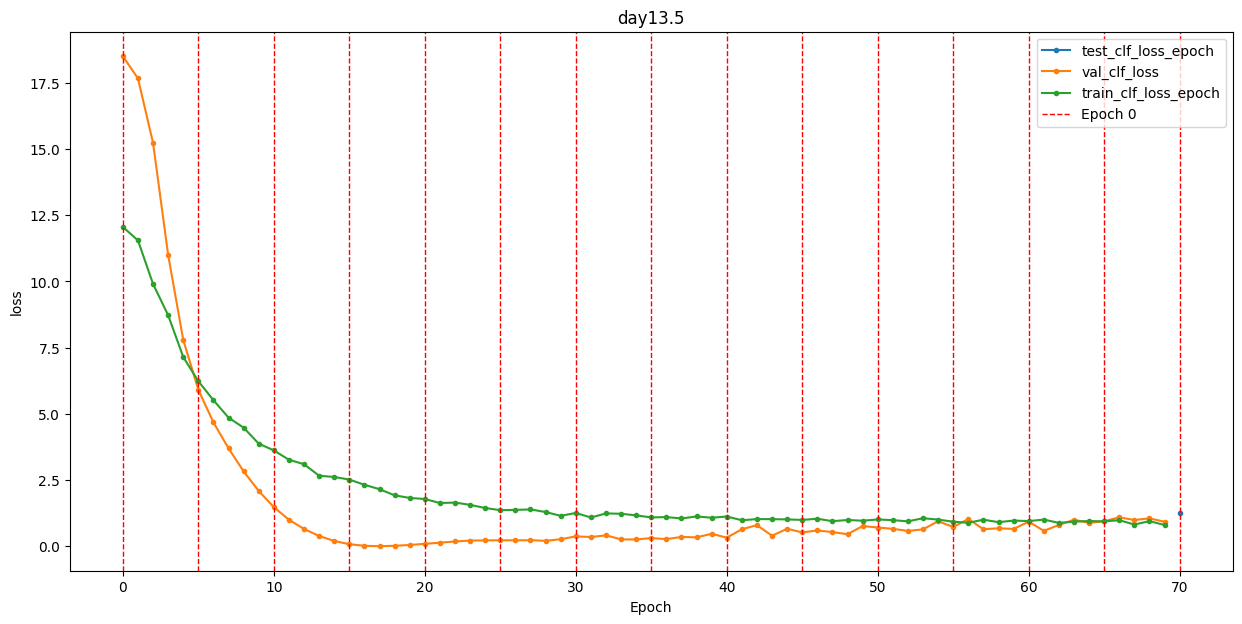

2025-03-12 11:29:17,970 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:29:17,986 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day13.5/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796937.GPU2.3578429.5 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day13.5/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796957.GPU2.3578429.6 
2025-03-12 11:29:17,987 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day13.5/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796957.GPU2.3578429.6 
2025-03-12 11:29:17,988 I

Free Memory Percentage: 35.16%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.815GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.261GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.817GB.

[INFO] more than 5% free memory, Auto select GPU device 0,- memory free: 38.817GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(10.5169, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.3140, device='cuda:0'), 'train_KLD_step': tensor(-7.0562, device='cuda:0'), 'train_clf_loss_step': tensor(9.2011, device='cuda:0'), 'val_loss': tensor(25.8296, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2714, device='cuda:0'), 'val_KLD': tensor(-0.3164, device='cuda:0'), 'val_clf_loss': tensor(24.5581, device='cuda:0'), 'train_loss_epoch': tensor(10.5169, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.3140, device='cuda:0'), 'train_KLD_epoch': tensor(-7.0562, device='cuda:0'), 'train_clf_loss_epoch': tensor(9.2011, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.8421, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.2658, device='cuda:0'), 'train_KLD_step': tensor(-7.4527, device='cuda:0'), 'train_clf_loss_step': tensor(8.5744, device='cuda:0'), 'val_loss': tensor(25.7838, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2563, device='cuda:0'), 'val_KLD': tensor(-1.5777, device='cuda:0'), 'val_clf_loss': tensor(24.5271, device='cuda:0'), 'train_loss_epoch': tensor(9.8421, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.2658, device='cuda:0'), 'train_KLD_epoch': tensor(-7.4527, device='cuda:0'), 'train_clf_loss_epoch': tensor(8.5744, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.0132, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.0612, device='cuda:0'), 'train_KLD_step': tensor(-9.3012, device='cuda:0'), 'train_clf_loss_step': tensor(7.9497, device='cuda:0'), 'val_loss': tensor(25.0519, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2041, device='cuda:0'), 'val_KLD': tensor(-5.1777, device='cuda:0'), 'val_clf_loss': tensor(23.8466, device='cuda:0'), 'train_loss_epoch': tensor(9.0132, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.0612, device='cuda:0'), 'train_KLD_epoch': tensor(-9.3012, device='cuda:0'), 'train_clf_loss_epoch': tensor(7.9497, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.7616, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9724, device='cuda:0'), 'train_KLD_step': tensor(-11.0353, device='cuda:0'), 'train_clf_loss_step': tensor(6.7865, device='cuda:0'), 'val_loss': tensor(23.2467, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2332, device='cuda:0'), 'val_KLD': tensor(-11.6188, device='cuda:0'), 'val_clf_loss': tensor(22.0106, device='cuda:0'), 'train_loss_epoch': tensor(7.7616, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9724, device='cuda:0'), 'train_KLD_epoch': tensor(-11.0353, device='cuda:0'), 'train_clf_loss_epoch': tensor(6.7865, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.0946, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9503, device='cuda:0'), 'train_KLD_step': tensor(-12.9542, device='cuda:0'), 'train_clf_loss_step': tensor(6.1410, device='cuda:0'), 'val_loss': tensor(20.8268, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3421, device='cuda:0'), 'val_KLD': tensor(-24.0865, device='cuda:0'), 'val_clf_loss': tensor(19.4787, device='cuda:0'), 'train_loss_epoch': tensor(7.0946, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9503, device='cuda:0'), 'train_KLD_epoch': tensor(-12.9542, device='cuda:0'), 'train_clf_loss_epoch': tensor(6.1410, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.3077, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9118, device='cuda:0'), 'train_KLD_step': tensor(-15.4104, device='cuda:0'), 'train_clf_loss_step': tensor(5.3921, device='cuda:0'), 'val_loss': tensor(16.8746, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.5045, device='cuda:0'), 'val_KLD': tensor(-43.2218, device='cuda:0'), 'val_clf_loss': tensor(15.3594, device='cuda:0'), 'train_loss_epoch': tensor(6.3077, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9118, device='cuda:0'), 'train_KLD_epoch': tensor(-15.4104, device='cuda:0'), 'train_clf_loss_epoch': tensor(5.3921, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.5038, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9063, device='cuda:0'), 'train_KLD_step': tensor(-17.8474, device='cuda:0'), 'train_clf_loss_step': tensor(4.5930, device='cuda:0'), 'val_loss': tensor(14.1655, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.5168, device='cuda:0'), 'val_KLD': tensor(-84.1374, device='cuda:0'), 'val_clf_loss': tensor(12.6277, device='cuda:0'), 'train_loss_epoch': tensor(5.5038, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9063, device='cuda:0'), 'train_KLD_epoch': tensor(-17.8474, device='cuda:0'), 'train_clf_loss_epoch': tensor(4.5930, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.1680, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8684, device='cuda:0'), 'train_KLD_step': tensor(-20.1963, device='cuda:0'), 'train_clf_loss_step': tensor(4.2945, device='cuda:0'), 'val_loss': tensor(11.7237, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.5917, device='cuda:0'), 'val_KLD': tensor(-136.0557, device='cuda:0'), 'val_clf_loss': tensor(10.0980, device='cuda:0'), 'train_loss_epoch': tensor(5.1680, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8684, device='cuda:0'), 'train_KLD_epoch': tensor(-20.1963, device='cuda:0'), 'train_clf_loss_epoch': tensor(4.2945, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.7222, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8566, device='cuda:0'), 'train_KLD_step': tensor(-22.5928, device='cuda:0'), 'train_clf_loss_step': tensor(3.8599, device='cuda:0'), 'val_loss': tensor(10.1441, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.5689, device='cuda:0'), 'val_KLD': tensor(-178.7562, device='cuda:0'), 'val_clf_loss': tensor(8.5305, device='cuda:0'), 'train_loss_epoch': tensor(4.7222, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8566, device='cuda:0'), 'train_KLD_epoch': tensor(-22.5928, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.8599, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.4108, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8307, device='cuda:0'), 'train_KLD_step': tensor(-24.8967, device='cuda:0'), 'train_clf_loss_step': tensor(3.5740, device='cuda:0'), 'val_loss': tensor(8.8098, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.5447, device='cuda:0'), 'val_KLD': tensor(-197.4245, device='cuda:0'), 'val_clf_loss': tensor(7.2157, device='cuda:0'), 'train_loss_epoch': tensor(4.4108, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8307, device='cuda:0'), 'train_KLD_epoch': tensor(-24.8967, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.5740, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.1098, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8153, device='cuda:0'), 'train_KLD_step': tensor(-27.2924, device='cuda:0'), 'train_clf_loss_step': tensor(3.2877, device='cuda:0'), 'val_loss': tensor(7.8501, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.5141, device='cuda:0'), 'val_KLD': tensor(-212.2672, device='cuda:0'), 'val_clf_loss': tensor(6.2829, device='cuda:0'), 'train_loss_epoch': tensor(4.1098, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8153, device='cuda:0'), 'train_KLD_epoch': tensor(-27.2924, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.2877, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.8412, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8125, device='cuda:0'), 'train_KLD_step': tensor(-29.5207, device='cuda:0'), 'train_clf_loss_step': tensor(3.0213, device='cuda:0'), 'val_loss': tensor(6.7589, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.4676, device='cuda:0'), 'val_KLD': tensor(-228.3465, device='cuda:0'), 'val_clf_loss': tensor(5.2342, device='cuda:0'), 'train_loss_epoch': tensor(3.8412, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8125, device='cuda:0'), 'train_KLD_epoch': tensor(-29.5207, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.0213, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.6878, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8010, device='cuda:0'), 'train_KLD_step': tensor(-31.7471, device='cuda:0'), 'train_clf_loss_step': tensor(2.8788, device='cuda:0'), 'val_loss': tensor(5.8308, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.4439, device='cuda:0'), 'val_KLD': tensor(-253.6182, device='cuda:0'), 'val_clf_loss': tensor(4.3235, device='cuda:0'), 'train_loss_epoch': tensor(3.6878, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8010, device='cuda:0'), 'train_KLD_epoch': tensor(-31.7471, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.8788, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3970, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7899, device='cuda:0'), 'train_KLD_step': tensor(-33.9133, device='cuda:0'), 'train_clf_loss_step': tensor(2.5987, device='cuda:0'), 'val_loss': tensor(5.1390, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.4251, device='cuda:0'), 'val_KLD': tensor(-283.2455, device='cuda:0'), 'val_clf_loss': tensor(3.6430, device='cuda:0'), 'train_loss_epoch': tensor(3.3970, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7899, device='cuda:0'), 'train_KLD_epoch': tensor(-33.9133, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.5987, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3231, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7827, device='cuda:0'), 'train_KLD_step': tensor(-35.8024, device='cuda:0'), 'train_clf_loss_step': tensor(2.5314, device='cuda:0'), 'val_loss': tensor(4.5774, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.4142, device='cuda:0'), 'val_KLD': tensor(-296.1129, device='cuda:0'), 'val_clf_loss': tensor(3.0892, device='cuda:0'), 'train_loss_epoch': tensor(3.3231, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7827, device='cuda:0'), 'train_KLD_epoch': tensor(-35.8024, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.5314, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1444, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7700, device='cuda:0'), 'train_KLD_step': tensor(-37.4603, device='cuda:0'), 'train_clf_loss_step': tensor(2.3651, device='cuda:0'), 'val_loss': tensor(4.1106, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3977, device='cuda:0'), 'val_KLD': tensor(-299.4388, device='cuda:0'), 'val_clf_loss': tensor(2.6381, device='cuda:0'), 'train_loss_epoch': tensor(3.1444, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7700, device='cuda:0'), 'train_KLD_epoch': tensor(-37.4603, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.3651, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9868, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7682, device='cuda:0'), 'train_KLD_step': tensor(-39.1748, device='cuda:0'), 'train_clf_loss_step': tensor(2.2087, device='cuda:0'), 'val_loss': tensor(3.7170, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3880, device='cuda:0'), 'val_KLD': tensor(-287.2224, device='cuda:0'), 'val_clf_loss': tensor(2.2572, device='cuda:0'), 'train_loss_epoch': tensor(2.9868, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7682, device='cuda:0'), 'train_KLD_epoch': tensor(-39.1748, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.2087, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8429, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7555, device='cuda:0'), 'train_KLD_step': tensor(-40.7192, device='cuda:0'), 'train_clf_loss_step': tensor(2.0773, device='cuda:0'), 'val_loss': tensor(3.3380, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3718, device='cuda:0'), 'val_KLD': tensor(-278.4378, device='cuda:0'), 'val_clf_loss': tensor(1.8966, device='cuda:0'), 'train_loss_epoch': tensor(2.8429, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7555, device='cuda:0'), 'train_KLD_epoch': tensor(-40.7192, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.0773, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7825, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7568, device='cuda:0'), 'train_KLD_step': tensor(-42.0707, device='cuda:0'), 'train_clf_loss_step': tensor(2.0151, device='cuda:0'), 'val_loss': tensor(3.1112, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3688, device='cuda:0'), 'val_KLD': tensor(-280.6928, device='cuda:0'), 'val_clf_loss': tensor(1.6722, device='cuda:0'), 'train_loss_epoch': tensor(2.7825, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7568, device='cuda:0'), 'train_KLD_epoch': tensor(-42.0707, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.0151, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7120, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7482, device='cuda:0'), 'train_KLD_step': tensor(-43.3355, device='cuda:0'), 'train_clf_loss_step': tensor(1.9529, device='cuda:0'), 'val_loss': tensor(2.8716, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3662, device='cuda:0'), 'val_KLD': tensor(-279.0792, device='cuda:0'), 'val_clf_loss': tensor(1.4356, device='cuda:0'), 'train_loss_epoch': tensor(2.7120, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7482, device='cuda:0'), 'train_KLD_epoch': tensor(-43.3355, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.9529, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5672, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7488, device='cuda:0'), 'train_KLD_step': tensor(-44.5174, device='cuda:0'), 'train_clf_loss_step': tensor(1.8073, device='cuda:0'), 'val_loss': tensor(2.6391, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3406, device='cuda:0'), 'val_KLD': tensor(-269.4233, device='cuda:0'), 'val_clf_loss': tensor(1.2311, device='cuda:0'), 'train_loss_epoch': tensor(2.5672, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7488, device='cuda:0'), 'train_KLD_epoch': tensor(-44.5174, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.8073, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6095, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7441, device='cuda:0'), 'train_KLD_step': tensor(-45.4327, device='cuda:0'), 'train_clf_loss_step': tensor(1.8541, device='cuda:0'), 'val_loss': tensor(2.5213, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3252, device='cuda:0'), 'val_KLD': tensor(-254.7970, device='cuda:0'), 'val_clf_loss': tensor(1.1324, device='cuda:0'), 'train_loss_epoch': tensor(2.6095, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7441, device='cuda:0'), 'train_KLD_epoch': tensor(-45.4327, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.8541, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5145, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7408, device='cuda:0'), 'train_KLD_step': tensor(-46.3616, device='cuda:0'), 'train_clf_loss_step': tensor(1.7621, device='cuda:0'), 'val_loss': tensor(2.4574, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3133, device='cuda:0'), 'val_KLD': tensor(-242.4160, device='cuda:0'), 'val_clf_loss': tensor(1.0835, device='cuda:0'), 'train_loss_epoch': tensor(2.5145, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7408, device='cuda:0'), 'train_KLD_epoch': tensor(-46.3616, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7621, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4612, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7380, device='cuda:0'), 'train_KLD_step': tensor(-47.2042, device='cuda:0'), 'train_clf_loss_step': tensor(1.7114, device='cuda:0'), 'val_loss': tensor(2.3869, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.3010, device='cuda:0'), 'val_KLD': tensor(-229.0055, device='cuda:0'), 'val_clf_loss': tensor(1.0287, device='cuda:0'), 'train_loss_epoch': tensor(2.4612, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7380, device='cuda:0'), 'train_KLD_epoch': tensor(-47.2042, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7114, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3615, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7284, device='cuda:0'), 'train_KLD_step': tensor(-48.1612, device='cuda:0'), 'train_clf_loss_step': tensor(1.6211, device='cuda:0'), 'val_loss': tensor(2.4859, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2867, device='cuda:0'), 'val_KLD': tensor(-217.2920, device='cuda:0'), 'val_clf_loss': tensor(1.1449, device='cuda:0'), 'train_loss_epoch': tensor(2.3615, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7284, device='cuda:0'), 'train_KLD_epoch': tensor(-48.1612, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6211, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4533, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7310, device='cuda:0'), 'train_KLD_step': tensor(-49.0432, device='cuda:0'), 'train_clf_loss_step': tensor(1.7100, device='cuda:0'), 'val_loss': tensor(2.4597, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2683, device='cuda:0'), 'val_KLD': tensor(-206.5310, device='cuda:0'), 'val_clf_loss': tensor(1.1397, device='cuda:0'), 'train_loss_epoch': tensor(2.4533, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7310, device='cuda:0'), 'train_KLD_epoch': tensor(-49.0432, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7100, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3362, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7311, device='cuda:0'), 'train_KLD_step': tensor(-49.7937, device='cuda:0'), 'train_clf_loss_step': tensor(1.5926, device='cuda:0'), 'val_loss': tensor(2.5671, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2637, device='cuda:0'), 'val_KLD': tensor(-198.8167, device='cuda:0'), 'val_clf_loss': tensor(1.2537, device='cuda:0'), 'train_loss_epoch': tensor(2.3362, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7311, device='cuda:0'), 'train_KLD_epoch': tensor(-49.7937, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5926, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3171, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7270, device='cuda:0'), 'train_KLD_step': tensor(-50.4501, device='cuda:0'), 'train_clf_loss_step': tensor(1.5775, device='cuda:0'), 'val_loss': tensor(2.3093, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2503, device='cuda:0'), 'val_KLD': tensor(-197.0674, device='cuda:0'), 'val_clf_loss': tensor(1.0097, device='cuda:0'), 'train_loss_epoch': tensor(2.3171, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7270, device='cuda:0'), 'train_KLD_epoch': tensor(-50.4501, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5775, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3207, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7243, device='cuda:0'), 'train_KLD_step': tensor(-51.0064, device='cuda:0'), 'train_clf_loss_step': tensor(1.5836, device='cuda:0'), 'val_loss': tensor(2.2612, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2439, device='cuda:0'), 'val_KLD': tensor(-197.6084, device='cuda:0'), 'val_clf_loss': tensor(0.9679, device='cuda:0'), 'train_loss_epoch': tensor(2.3207, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7243, device='cuda:0'), 'train_KLD_epoch': tensor(-51.0064, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5836, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2809, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7255, device='cuda:0'), 'train_KLD_step': tensor(-51.5722, device='cuda:0'), 'train_clf_loss_step': tensor(1.5424, device='cuda:0'), 'val_loss': tensor(2.3178, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2332, device='cuda:0'), 'val_KLD': tensor(-196.6853, device='cuda:0'), 'val_clf_loss': tensor(1.0354, device='cuda:0'), 'train_loss_epoch': tensor(2.2809, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7255, device='cuda:0'), 'train_KLD_epoch': tensor(-51.5722, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5424, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2810, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7244, device='cuda:0'), 'train_KLD_step': tensor(-52.1379, device='cuda:0'), 'train_clf_loss_step': tensor(1.5436, device='cuda:0'), 'val_loss': tensor(2.3632, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2255, device='cuda:0'), 'val_KLD': tensor(-199.2739, device='cuda:0'), 'val_clf_loss': tensor(1.0879, device='cuda:0'), 'train_loss_epoch': tensor(2.2810, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7244, device='cuda:0'), 'train_KLD_epoch': tensor(-52.1379, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5436, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2801, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7210, device='cuda:0'), 'train_KLD_step': tensor(-52.7724, device='cuda:0'), 'train_clf_loss_step': tensor(1.5459, device='cuda:0'), 'val_loss': tensor(2.5397, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2120, device='cuda:0'), 'val_KLD': tensor(-193.4326, device='cuda:0'), 'val_clf_loss': tensor(1.2793, device='cuda:0'), 'train_loss_epoch': tensor(2.2801, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7210, device='cuda:0'), 'train_KLD_epoch': tensor(-52.7724, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5459, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2736, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7210, device='cuda:0'), 'train_KLD_step': tensor(-53.4167, device='cuda:0'), 'train_clf_loss_step': tensor(1.5393, device='cuda:0'), 'val_loss': tensor(2.7238, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1911, device='cuda:0'), 'val_KLD': tensor(-183.3202, device='cuda:0'), 'val_clf_loss': tensor(1.4869, device='cuda:0'), 'train_loss_epoch': tensor(2.2736, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7210, device='cuda:0'), 'train_KLD_epoch': tensor(-53.4167, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5393, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2553, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7170, device='cuda:0'), 'train_KLD_step': tensor(-53.9885, device='cuda:0'), 'train_clf_loss_step': tensor(1.5248, device='cuda:0'), 'val_loss': tensor(2.6957, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1729, device='cuda:0'), 'val_KLD': tensor(-172.9893, device='cuda:0'), 'val_clf_loss': tensor(1.4795, device='cuda:0'), 'train_loss_epoch': tensor(2.2553, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7170, device='cuda:0'), 'train_KLD_epoch': tensor(-53.9885, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5248, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2841, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7163, device='cuda:0'), 'train_KLD_step': tensor(-54.5201, device='cuda:0'), 'train_clf_loss_step': tensor(1.5542, device='cuda:0'), 'val_loss': tensor(2.6924, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1587, device='cuda:0'), 'val_KLD': tensor(-164.0597, device='cuda:0'), 'val_clf_loss': tensor(1.4926, device='cuda:0'), 'train_loss_epoch': tensor(2.2841, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7163, device='cuda:0'), 'train_KLD_epoch': tensor(-54.5201, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5542, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1236, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7155, device='cuda:0'), 'train_KLD_step': tensor(-54.9845, device='cuda:0'), 'train_clf_loss_step': tensor(1.3944, device='cuda:0'), 'val_loss': tensor(2.6739, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1553, device='cuda:0'), 'val_KLD': tensor(-157.9971, device='cuda:0'), 'val_clf_loss': tensor(1.4791, device='cuda:0'), 'train_loss_epoch': tensor(2.1236, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7155, device='cuda:0'), 'train_KLD_epoch': tensor(-54.9845, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3944, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1246, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7149, device='cuda:0'), 'train_KLD_step': tensor(-55.3863, device='cuda:0'), 'train_clf_loss_step': tensor(1.3959, device='cuda:0'), 'val_loss': tensor(2.6194, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1501, device='cuda:0'), 'val_KLD': tensor(-154.8156, device='cuda:0'), 'val_clf_loss': tensor(1.4306, device='cuda:0'), 'train_loss_epoch': tensor(2.1246, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7149, device='cuda:0'), 'train_KLD_epoch': tensor(-55.3863, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3959, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2401, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7113, device='cuda:0'), 'train_KLD_step': tensor(-55.6780, device='cuda:0'), 'train_clf_loss_step': tensor(1.5148, device='cuda:0'), 'val_loss': tensor(2.5764, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1505, device='cuda:0'), 'val_KLD': tensor(-154.0431, device='cuda:0'), 'val_clf_loss': tensor(1.3874, device='cuda:0'), 'train_loss_epoch': tensor(2.2401, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7113, device='cuda:0'), 'train_KLD_epoch': tensor(-55.6780, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5148, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1660, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7118, device='cuda:0'), 'train_KLD_step': tensor(-55.9226, device='cuda:0'), 'train_clf_loss_step': tensor(1.4402, device='cuda:0'), 'val_loss': tensor(2.5810, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1486, device='cuda:0'), 'val_KLD': tensor(-154.7109, device='cuda:0'), 'val_clf_loss': tensor(1.3937, device='cuda:0'), 'train_loss_epoch': tensor(2.1660, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7118, device='cuda:0'), 'train_KLD_epoch': tensor(-55.9226, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4402, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1468, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7105, device='cuda:0'), 'train_KLD_step': tensor(-56.1106, device='cuda:0'), 'train_clf_loss_step': tensor(1.4223, device='cuda:0'), 'val_loss': tensor(2.5395, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1453, device='cuda:0'), 'val_KLD': tensor(-155.6789, device='cuda:0'), 'val_clf_loss': tensor(1.3552, device='cuda:0'), 'train_loss_epoch': tensor(2.1468, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7105, device='cuda:0'), 'train_KLD_epoch': tensor(-56.1106, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4223, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1041, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7076, device='cuda:0'), 'train_KLD_step': tensor(-56.3594, device='cuda:0'), 'train_clf_loss_step': tensor(1.3824, device='cuda:0'), 'val_loss': tensor(2.6310, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1423, device='cuda:0'), 'val_KLD': tensor(-156.2898, device='cuda:0'), 'val_clf_loss': tensor(1.4497, device='cuda:0'), 'train_loss_epoch': tensor(2.1041, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7076, device='cuda:0'), 'train_KLD_epoch': tensor(-56.3594, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3824, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0786, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7051, device='cuda:0'), 'train_KLD_step': tensor(-56.5961, device='cuda:0'), 'train_clf_loss_step': tensor(1.3593, device='cuda:0'), 'val_loss': tensor(2.7838, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1344, device='cuda:0'), 'val_KLD': tensor(-156.5527, device='cuda:0'), 'val_clf_loss': tensor(1.6103, device='cuda:0'), 'train_loss_epoch': tensor(2.0786, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7051, device='cuda:0'), 'train_KLD_epoch': tensor(-56.5961, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3593, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1481, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7039, device='cuda:0'), 'train_KLD_step': tensor(-56.8461, device='cuda:0'), 'train_clf_loss_step': tensor(1.4300, device='cuda:0'), 'val_loss': tensor(2.7386, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1276, device='cuda:0'), 'val_KLD': tensor(-154.6858, device='cuda:0'), 'val_clf_loss': tensor(1.5723, device='cuda:0'), 'train_loss_epoch': tensor(2.1481, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7039, device='cuda:0'), 'train_KLD_epoch': tensor(-56.8461, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4300, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0757, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7032, device='cuda:0'), 'train_KLD_step': tensor(-57.0786, device='cuda:0'), 'train_clf_loss_step': tensor(1.3583, device='cuda:0'), 'val_loss': tensor(2.8626, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1268, device='cuda:0'), 'val_KLD': tensor(-152.3958, device='cuda:0'), 'val_clf_loss': tensor(1.6977, device='cuda:0'), 'train_loss_epoch': tensor(2.0757, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7032, device='cuda:0'), 'train_KLD_epoch': tensor(-57.0786, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3583, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0422, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7016, device='cuda:0'), 'train_KLD_step': tensor(-57.2362, device='cuda:0'), 'train_clf_loss_step': tensor(1.3263, device='cuda:0'), 'val_loss': tensor(2.9514, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1224, device='cuda:0'), 'val_KLD': tensor(-149.9993, device='cuda:0'), 'val_clf_loss': tensor(1.7915, device='cuda:0'), 'train_loss_epoch': tensor(2.0422, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7016, device='cuda:0'), 'train_KLD_epoch': tensor(-57.2362, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3263, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0173, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7013, device='cuda:0'), 'train_KLD_step': tensor(-57.3413, device='cuda:0'), 'train_clf_loss_step': tensor(1.3016, device='cuda:0'), 'val_loss': tensor(3.0642, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1147, device='cuda:0'), 'val_KLD': tensor(-147.7256, device='cuda:0'), 'val_clf_loss': tensor(1.9126, device='cuda:0'), 'train_loss_epoch': tensor(2.0173, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7013, device='cuda:0'), 'train_KLD_epoch': tensor(-57.3413, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3016, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0835, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7001, device='cuda:0'), 'train_KLD_step': tensor(-57.4409, device='cuda:0'), 'train_clf_loss_step': tensor(1.3690, device='cuda:0'), 'val_loss': tensor(3.0223, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1153, device='cuda:0'), 'val_KLD': tensor(-144.7707, device='cuda:0'), 'val_clf_loss': tensor(1.8708, device='cuda:0'), 'train_loss_epoch': tensor(2.0835, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7001, device='cuda:0'), 'train_KLD_epoch': tensor(-57.4409, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3690, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1350, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7053, device='cuda:0'), 'train_KLD_step': tensor(-57.5050, device='cuda:0'), 'train_clf_loss_step': tensor(1.4153, device='cuda:0'), 'val_loss': tensor(3.0734, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1117, device='cuda:0'), 'val_KLD': tensor(-142.8788, device='cuda:0'), 'val_clf_loss': tensor(1.9259, device='cuda:0'), 'train_loss_epoch': tensor(2.1350, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7053, device='cuda:0'), 'train_KLD_epoch': tensor(-57.5050, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4153, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0483, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7026, device='cuda:0'), 'train_KLD_step': tensor(-57.6171, device='cuda:0'), 'train_clf_loss_step': tensor(1.3313, device='cuda:0'), 'val_loss': tensor(3.1396, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1131, device='cuda:0'), 'val_KLD': tensor(-141.6617, device='cuda:0'), 'val_clf_loss': tensor(1.9911, device='cuda:0'), 'train_loss_epoch': tensor(2.0483, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7026, device='cuda:0'), 'train_KLD_epoch': tensor(-57.6171, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3313, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0919, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6998, device='cuda:0'), 'train_KLD_step': tensor(-57.6999, device='cuda:0'), 'train_clf_loss_step': tensor(1.3776, device='cuda:0'), 'val_loss': tensor(3.1769, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1091, device='cuda:0'), 'val_KLD': tensor(-139.4382, device='cuda:0'), 'val_clf_loss': tensor(2.0329, device='cuda:0'), 'train_loss_epoch': tensor(2.0919, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6998, device='cuda:0'), 'train_KLD_epoch': tensor(-57.6999, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3776, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0622, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6982, device='cuda:0'), 'train_KLD_step': tensor(-57.8027, device='cuda:0'), 'train_clf_loss_step': tensor(1.3496, device='cuda:0'), 'val_loss': tensor(3.0493, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1096, device='cuda:0'), 'val_KLD': tensor(-137.9554, device='cuda:0'), 'val_clf_loss': tensor(1.9051, device='cuda:0'), 'train_loss_epoch': tensor(2.0622, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6982, device='cuda:0'), 'train_KLD_epoch': tensor(-57.8027, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3496, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0361, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6999, device='cuda:0'), 'train_KLD_step': tensor(-57.9110, device='cuda:0'), 'train_clf_loss_step': tensor(1.3217, device='cuda:0'), 'val_loss': tensor(3.2501, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1097, device='cuda:0'), 'val_KLD': tensor(-137.4072, device='cuda:0'), 'val_clf_loss': tensor(2.1060, device='cuda:0'), 'train_loss_epoch': tensor(2.0361, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6999, device='cuda:0'), 'train_KLD_epoch': tensor(-57.9110, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3217, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0100, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6954, device='cuda:0'), 'train_KLD_step': tensor(-58.0542, device='cuda:0'), 'train_clf_loss_step': tensor(1.3001, device='cuda:0'), 'val_loss': tensor(3.1050, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1046, device='cuda:0'), 'val_KLD': tensor(-137.4949, device='cuda:0'), 'val_clf_loss': tensor(1.9660, device='cuda:0'), 'train_loss_epoch': tensor(2.0100, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6954, device='cuda:0'), 'train_KLD_epoch': tensor(-58.0542, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3001, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0083, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6969, device='cuda:0'), 'train_KLD_step': tensor(-58.2470, device='cuda:0'), 'train_clf_loss_step': tensor(1.2968, device='cuda:0'), 'val_loss': tensor(3.1526, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1033, device='cuda:0'), 'val_KLD': tensor(-137.6100, device='cuda:0'), 'val_clf_loss': tensor(2.0150, device='cuda:0'), 'train_loss_epoch': tensor(2.0083, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6969, device='cuda:0'), 'train_KLD_epoch': tensor(-58.2470, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2968, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9669, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6961, device='cuda:0'), 'train_KLD_step': tensor(-58.4423, device='cuda:0'), 'train_clf_loss_step': tensor(1.2562, device='cuda:0'), 'val_loss': tensor(3.1391, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1040, device='cuda:0'), 'val_KLD': tensor(-137.7867, device='cuda:0'), 'val_clf_loss': tensor(2.0006, device='cuda:0'), 'train_loss_epoch': tensor(1.9669, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6961, device='cuda:0'), 'train_KLD_epoch': tensor(-58.4423, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2562, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0729, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6964, device='cuda:0'), 'train_KLD_step': tensor(-58.6679, device='cuda:0'), 'train_clf_loss_step': tensor(1.3618, device='cuda:0'), 'val_loss': tensor(3.2887, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1074, device='cuda:0'), 'val_KLD': tensor(-138.1409, device='cuda:0'), 'val_clf_loss': tensor(2.1469, device='cuda:0'), 'train_loss_epoch': tensor(2.0729, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6964, device='cuda:0'), 'train_KLD_epoch': tensor(-58.6679, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3618, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9811, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6962, device='cuda:0'), 'train_KLD_step': tensor(-58.8981, device='cuda:0'), 'train_clf_loss_step': tensor(1.2701, device='cuda:0'), 'val_loss': tensor(3.2964, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1093, device='cuda:0'), 'val_KLD': tensor(-137.9118, device='cuda:0'), 'val_clf_loss': tensor(2.1527, device='cuda:0'), 'train_loss_epoch': tensor(1.9811, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6962, device='cuda:0'), 'train_KLD_epoch': tensor(-58.8981, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2701, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0994, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6964, device='cuda:0'), 'train_KLD_step': tensor(-59.1004, device='cuda:0'), 'train_clf_loss_step': tensor(1.3882, device='cuda:0'), 'val_loss': tensor(3.4583, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1077, device='cuda:0'), 'val_KLD': tensor(-137.9150, device='cuda:0'), 'val_clf_loss': tensor(2.3162, device='cuda:0'), 'train_loss_epoch': tensor(2.0994, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6964, device='cuda:0'), 'train_KLD_epoch': tensor(-59.1004, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3882, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0277, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6958, device='cuda:0'), 'train_KLD_step': tensor(-59.2940, device='cuda:0'), 'train_clf_loss_step': tensor(1.3170, device='cuda:0'), 'val_loss': tensor(3.4767, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1057, device='cuda:0'), 'val_KLD': tensor(-137.0292, device='cuda:0'), 'val_clf_loss': tensor(2.3367, device='cuda:0'), 'train_loss_epoch': tensor(2.0277, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6958, device='cuda:0'), 'train_KLD_epoch': tensor(-59.2940, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3170, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0112, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6954, device='cuda:0'), 'train_KLD_step': tensor(-59.4556, device='cuda:0'), 'train_clf_loss_step': tensor(1.3010, device='cuda:0'), 'val_loss': tensor(3.5722, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1063, device='cuda:0'), 'val_KLD': tensor(-136.1027, device='cuda:0'), 'val_clf_loss': tensor(2.4319, device='cuda:0'), 'train_loss_epoch': tensor(2.0112, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6954, device='cuda:0'), 'train_KLD_epoch': tensor(-59.4556, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3010, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0106, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6927, device='cuda:0'), 'train_KLD_step': tensor(-59.5901, device='cuda:0'), 'train_clf_loss_step': tensor(1.3030, device='cuda:0'), 'val_loss': tensor(3.5677, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1101, device='cuda:0'), 'val_KLD': tensor(-135.4046, device='cuda:0'), 'val_clf_loss': tensor(2.4238, device='cuda:0'), 'train_loss_epoch': tensor(2.0106, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6927, device='cuda:0'), 'train_KLD_epoch': tensor(-59.5901, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3030, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0628, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6965, device='cuda:0'), 'train_KLD_step': tensor(-59.7105, device='cuda:0'), 'train_clf_loss_step': tensor(1.3514, device='cuda:0'), 'val_loss': tensor(3.6401, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1036, device='cuda:0'), 'val_KLD': tensor(-134.9547, device='cuda:0'), 'val_clf_loss': tensor(2.5028, device='cuda:0'), 'train_loss_epoch': tensor(2.0628, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6965, device='cuda:0'), 'train_KLD_epoch': tensor(-59.7105, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3514, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9738, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6935, device='cuda:0'), 'train_KLD_step': tensor(-59.8045, device='cuda:0'), 'train_clf_loss_step': tensor(1.2653, device='cuda:0'), 'val_loss': tensor(3.6765, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1041, device='cuda:0'), 'val_KLD': tensor(-134.9162, device='cuda:0'), 'val_clf_loss': tensor(2.5386, device='cuda:0'), 'train_loss_epoch': tensor(1.9738, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6935, device='cuda:0'), 'train_KLD_epoch': tensor(-59.8045, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2653, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9463, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6956, device='cuda:0'), 'train_KLD_step': tensor(-59.8666, device='cuda:0'), 'train_clf_loss_step': tensor(1.2358, device='cuda:0'), 'val_loss': tensor(3.7388, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1026, device='cuda:0'), 'val_KLD': tensor(-134.4263, device='cuda:0'), 'val_clf_loss': tensor(2.6026, device='cuda:0'), 'train_loss_epoch': tensor(1.9463, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6956, device='cuda:0'), 'train_KLD_epoch': tensor(-59.8666, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2358, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0435, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6946, device='cuda:0'), 'train_KLD_step': tensor(-59.9008, device='cuda:0'), 'train_clf_loss_step': tensor(1.3340, device='cuda:0'), 'val_loss': tensor(3.7989, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1063, device='cuda:0'), 'val_KLD': tensor(-133.9426, device='cuda:0'), 'val_clf_loss': tensor(2.6592, device='cuda:0'), 'train_loss_epoch': tensor(2.0435, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6946, device='cuda:0'), 'train_KLD_epoch': tensor(-59.9008, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3340, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0240, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6922, device='cuda:0'), 'train_KLD_step': tensor(-59.9281, device='cuda:0'), 'train_clf_loss_step': tensor(1.3168, device='cuda:0'), 'val_loss': tensor(3.6774, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1060, device='cuda:0'), 'val_KLD': tensor(-133.2004, device='cuda:0'), 'val_clf_loss': tensor(2.5380, device='cuda:0'), 'train_loss_epoch': tensor(2.0240, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6922, device='cuda:0'), 'train_KLD_epoch': tensor(-59.9281, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3168, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0468, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6925, device='cuda:0'), 'train_KLD_step': tensor(-59.9503, device='cuda:0'), 'train_clf_loss_step': tensor(1.3393, device='cuda:0'), 'val_loss': tensor(3.7126, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1033, device='cuda:0'), 'val_KLD': tensor(-133.1166, device='cuda:0'), 'val_clf_loss': tensor(2.5760, device='cuda:0'), 'train_loss_epoch': tensor(2.0468, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6925, device='cuda:0'), 'train_KLD_epoch': tensor(-59.9503, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3393, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0383, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6938, device='cuda:0'), 'train_KLD_step': tensor(-59.9649, device='cuda:0'), 'train_clf_loss_step': tensor(1.3295, device='cuda:0'), 'val_loss': tensor(3.6422, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1100, device='cuda:0'), 'val_KLD': tensor(-133.4306, device='cuda:0'), 'val_clf_loss': tensor(2.4988, device='cuda:0'), 'train_loss_epoch': tensor(2.0383, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6938, device='cuda:0'), 'train_KLD_epoch': tensor(-59.9649, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3295, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0384, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6942, device='cuda:0'), 'train_KLD_step': tensor(-59.9850, device='cuda:0'), 'train_clf_loss_step': tensor(1.3292, device='cuda:0'), 'val_loss': tensor(3.6206, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1048, device='cuda:0'), 'val_KLD': tensor(-133.4068, device='cuda:0'), 'val_clf_loss': tensor(2.4825, device='cuda:0'), 'train_loss_epoch': tensor(2.0384, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6942, device='cuda:0'), 'train_KLD_epoch': tensor(-59.9850, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3292, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:29:39,664 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.9933, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.6914, device='cuda:0'), 'train_KLD_step': tensor(-59.9967, device='cuda:0'), 'train_clf_loss_step': tensor(1.2869, device='cuda:0'), 'val_loss': tensor(3.6978, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1069, device='cuda:0'), 'val_KLD': tensor(-133.4735, device='cuda:0'), 'val_clf_loss': tensor(2.5576, device='cuda:0'), 'train_loss_epoch': tensor(1.9933, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.6914, device='cuda:0'), 'train_KLD_epoch': tensor(-59.9967, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2869, device='cuda:0')}


2025-03-12 11:29:39,689 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │       -133.4734649658203       │
│ test_Reconstruction_loss_epoch │       1.1051421165466309       │
│      test_clf_loss_epoch       │       2.5619843006134033       │
│        test_loss_epoch         │       3.7004950046539307       │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:29:39,737 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 3.7004950046539307, 'test_Reconstruction_loss_epoch': 1.1051421165466309, 'test_KLD_epoch': -133.4734649658203, 'test_clf_loss_epoch': 2.5619843006134033}] 
2025-03-12 11:29:39,742 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:29:39,783 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:29:39,815 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:29:39,816 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:29:39,817 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:29:39,832 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day14.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796958.GPU2.3578429.7 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day14.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796979.GPU2.3578429.8 
2025-03-12 11:29:39,833 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

<Figure size 1500x700 with 0 Axes>

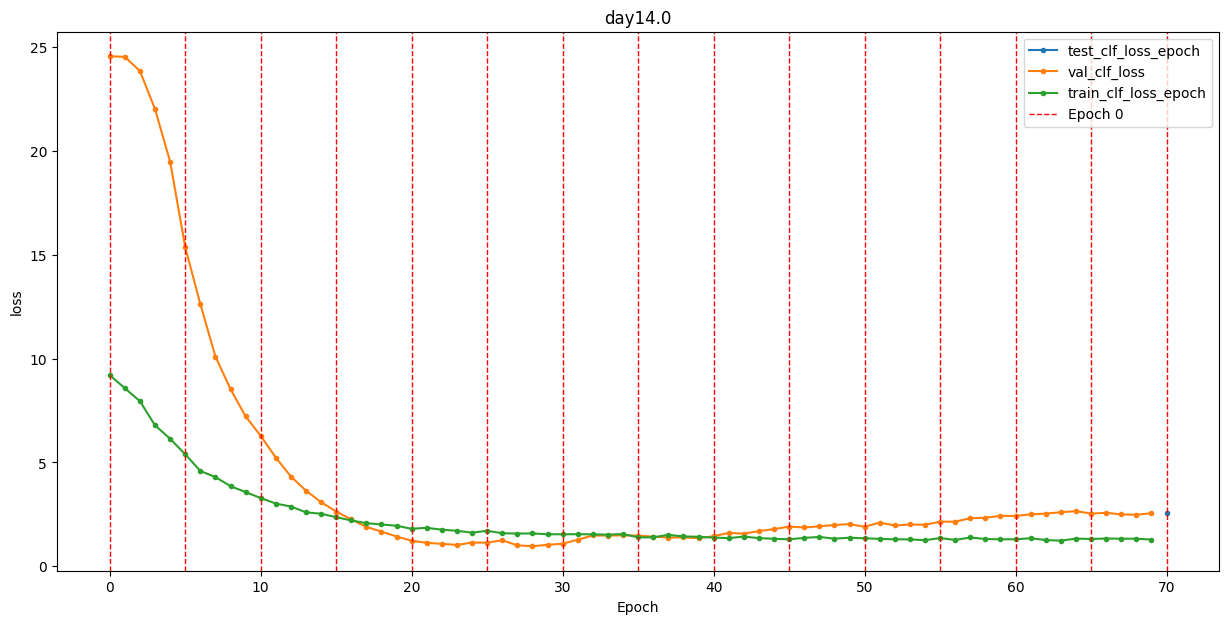

2025-03-12 11:29:40,259 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:29:40,274 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day14.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796958.GPU2.3578429.7 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day14.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796979.GPU2.3578429.8 
2025-03-12 11:29:40,275 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day14.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796979.GPU2.3578429.8 
2025-03-12 11:29:40,276 I

Free Memory Percentage: 35.15%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.819GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.261GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.815GB.

[INFO] more than 5% free memory, Auto select GPU device 2,- memory free: 38.819GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(12.2008, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.3777, device='cuda:2'), 'train_KLD_step': tensor(-7.0850, device='cuda:2'), 'train_clf_loss_step': tensor(10.8214, device='cuda:2'), 'val_loss': tensor(26.8706, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0621, device='cuda:2'), 'val_KLD': tensor(-0.2896, device='cuda:2'), 'val_clf_loss': tensor(25.8084, device='cuda:2'), 'train_loss_epoch': tensor(12.2008, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.3777, device='cuda:2'), 'train_KLD_epoch': tensor(-7.0850, device='cuda:2'), 'train_clf_loss_epoch': tensor(10.8214, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(11.8322, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.3506, device='cuda:2'), 'train_KLD_step': tensor(-7.9466, device='cuda:2'), 'train_clf_loss_step': tensor(10.4796, device='cuda:2'), 'val_loss': tensor(26.9295, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0782, device='cuda:2'), 'val_KLD': tensor(-0.6582, device='cuda:2'), 'val_clf_loss': tensor(25.8511, device='cuda:2'), 'train_loss_epoch': tensor(11.8322, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.3506, device='cuda:2'), 'train_KLD_epoch': tensor(-7.9466, device='cuda:2'), 'train_clf_loss_epoch': tensor(10.4796, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(10.7440, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.2110, device='cuda:2'), 'train_KLD_step': tensor(-9.0994, device='cuda:2'), 'train_clf_loss_step': tensor(9.5307, device='cuda:2'), 'val_loss': tensor(26.8011, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0870, device='cuda:2'), 'val_KLD': tensor(-2.6381, device='cuda:2'), 'val_clf_loss': tensor(25.7134, device='cuda:2'), 'train_loss_epoch': tensor(10.7440, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.2110, device='cuda:2'), 'train_KLD_epoch': tensor(-9.0994, device='cuda:2'), 'train_clf_loss_epoch': tensor(9.5307, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.2747, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.0344, device='cuda:2'), 'train_KLD_step': tensor(-11.4753, device='cuda:2'), 'train_clf_loss_step': tensor(8.2374, device='cuda:2'), 'val_loss': tensor(24.4229, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0105, device='cuda:2'), 'val_KLD': tensor(-9.6833, device='cuda:2'), 'val_clf_loss': tensor(23.4100, device='cuda:2'), 'train_loss_epoch': tensor(9.2747, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.0344, device='cuda:2'), 'train_KLD_epoch': tensor(-11.4753, device='cuda:2'), 'train_clf_loss_epoch': tensor(8.2374, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.7807, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9439, device='cuda:2'), 'train_KLD_step': tensor(-13.9169, device='cuda:2'), 'train_clf_loss_step': tensor(6.8334, device='cuda:2'), 'val_loss': tensor(20.2889, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9470, device='cuda:2'), 'val_KLD': tensor(-25.3361, device='cuda:2'), 'val_clf_loss': tensor(19.3356, device='cuda:2'), 'train_loss_epoch': tensor(7.7807, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9439, device='cuda:2'), 'train_KLD_epoch': tensor(-13.9169, device='cuda:2'), 'train_clf_loss_epoch': tensor(6.8334, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.0170, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8984, device='cuda:2'), 'train_KLD_step': tensor(-16.4647, device='cuda:2'), 'train_clf_loss_step': tensor(6.1145, device='cuda:2'), 'val_loss': tensor(17.3247, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9560, device='cuda:2'), 'val_KLD': tensor(-39.6014, device='cuda:2'), 'val_clf_loss': tensor(16.3588, device='cuda:2'), 'train_loss_epoch': tensor(7.0170, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8984, device='cuda:2'), 'train_KLD_epoch': tensor(-16.4647, device='cuda:2'), 'train_clf_loss_epoch': tensor(6.1145, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.0918, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8739, device='cuda:2'), 'train_KLD_step': tensor(-18.7570, device='cuda:2'), 'train_clf_loss_step': tensor(5.2132, device='cuda:2'), 'val_loss': tensor(14.1121, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0165, device='cuda:2'), 'val_KLD': tensor(-64.3559, device='cuda:2'), 'val_clf_loss': tensor(13.0796, device='cuda:2'), 'train_loss_epoch': tensor(6.0918, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8739, device='cuda:2'), 'train_KLD_epoch': tensor(-18.7570, device='cuda:2'), 'train_clf_loss_epoch': tensor(5.2132, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.4685, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8652, device='cuda:2'), 'train_KLD_step': tensor(-21.1155, device='cuda:2'), 'train_clf_loss_step': tensor(4.5981, device='cuda:2'), 'val_loss': tensor(11.4015, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0672, device='cuda:2'), 'val_KLD': tensor(-105.6716, device='cuda:2'), 'val_clf_loss': tensor(10.3078, device='cuda:2'), 'train_loss_epoch': tensor(5.4685, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8652, device='cuda:2'), 'train_KLD_epoch': tensor(-21.1155, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.5981, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.1267, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8545, device='cuda:2'), 'train_KLD_step': tensor(-23.6361, device='cuda:2'), 'train_clf_loss_step': tensor(4.2664, device='cuda:2'), 'val_loss': tensor(9.6318, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0972, device='cuda:2'), 'val_KLD': tensor(-160.1434, device='cuda:2'), 'val_clf_loss': tensor(8.4945, device='cuda:2'), 'train_loss_epoch': tensor(5.1267, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8545, device='cuda:2'), 'train_KLD_epoch': tensor(-23.6361, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.2664, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.5449, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8440, device='cuda:2'), 'train_KLD_step': tensor(-26.2058, device='cuda:2'), 'train_clf_loss_step': tensor(3.6943, device='cuda:2'), 'val_loss': tensor(8.4046, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1218, device='cuda:2'), 'val_KLD': tensor(-190.1853, device='cuda:2'), 'val_clf_loss': tensor(7.2352, device='cuda:2'), 'train_loss_epoch': tensor(4.5449, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8440, device='cuda:2'), 'train_KLD_epoch': tensor(-26.2058, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.6943, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.2224, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8434, device='cuda:2'), 'train_KLD_step': tensor(-28.9481, device='cuda:2'), 'train_clf_loss_step': tensor(3.3718, device='cuda:2'), 'val_loss': tensor(7.3588, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1300, device='cuda:2'), 'val_KLD': tensor(-207.0684, device='cuda:2'), 'val_clf_loss': tensor(6.1770, device='cuda:2'), 'train_loss_epoch': tensor(4.2224, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8434, device='cuda:2'), 'train_KLD_epoch': tensor(-28.9481, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.3718, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.0088, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8293, device='cuda:2'), 'train_KLD_step': tensor(-31.5804, device='cuda:2'), 'train_clf_loss_step': tensor(3.1715, device='cuda:2'), 'val_loss': tensor(6.4377, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1258, device='cuda:2'), 'val_KLD': tensor(-249.4254, device='cuda:2'), 'val_clf_loss': tensor(5.2496, device='cuda:2'), 'train_loss_epoch': tensor(4.0088, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8293, device='cuda:2'), 'train_KLD_epoch': tensor(-31.5804, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.1715, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.7797, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8220, device='cuda:2'), 'train_KLD_step': tensor(-33.6086, device='cuda:2'), 'train_clf_loss_step': tensor(2.9493, device='cuda:2'), 'val_loss': tensor(5.6637, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1177, device='cuda:2'), 'val_KLD': tensor(-287.6867, device='cuda:2'), 'val_clf_loss': tensor(4.4741, device='cuda:2'), 'train_loss_epoch': tensor(3.7797, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8220, device='cuda:2'), 'train_KLD_epoch': tensor(-33.6086, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.9493, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.4993, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8151, device='cuda:2'), 'train_KLD_step': tensor(-35.6024, device='cuda:2'), 'train_clf_loss_step': tensor(2.6753, device='cuda:2'), 'val_loss': tensor(4.9967, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1142, device='cuda:2'), 'val_KLD': tensor(-304.5600, device='cuda:2'), 'val_clf_loss': tensor(3.8064, device='cuda:2'), 'train_loss_epoch': tensor(3.4993, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8151, device='cuda:2'), 'train_KLD_epoch': tensor(-35.6024, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.6753, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.2287, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8070, device='cuda:2'), 'train_KLD_step': tensor(-37.4368, device='cuda:2'), 'train_clf_loss_step': tensor(2.4124, device='cuda:2'), 'val_loss': tensor(4.4484, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1113, device='cuda:2'), 'val_KLD': tensor(-312.0401, device='cuda:2'), 'val_clf_loss': tensor(3.2591, device='cuda:2'), 'train_loss_epoch': tensor(3.2287, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8070, device='cuda:2'), 'train_KLD_epoch': tensor(-37.4368, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.4124, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1268, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8020, device='cuda:2'), 'train_KLD_step': tensor(-39.0697, device='cuda:2'), 'train_clf_loss_step': tensor(2.3151, device='cuda:2'), 'val_loss': tensor(3.9492, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1074, device='cuda:2'), 'val_KLD': tensor(-322.3171, device='cuda:2'), 'val_clf_loss': tensor(2.7612, device='cuda:2'), 'train_loss_epoch': tensor(3.1268, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8020, device='cuda:2'), 'train_KLD_epoch': tensor(-39.0697, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.3151, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9781, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7956, device='cuda:2'), 'train_KLD_step': tensor(-40.5806, device='cuda:2'), 'train_clf_loss_step': tensor(2.1724, device='cuda:2'), 'val_loss': tensor(3.5191, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0984, device='cuda:2'), 'val_KLD': tensor(-325.1227, device='cuda:2'), 'val_clf_loss': tensor(2.3394, device='cuda:2'), 'train_loss_epoch': tensor(2.9781, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7956, device='cuda:2'), 'train_KLD_epoch': tensor(-40.5806, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.1724, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.7410, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7983, device='cuda:2'), 'train_KLD_step': tensor(-41.6667, device='cuda:2'), 'train_clf_loss_step': tensor(1.9322, device='cuda:2'), 'val_loss': tensor(3.1749, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0954, device='cuda:2'), 'val_KLD': tensor(-324.0026, device='cuda:2'), 'val_clf_loss': tensor(1.9985, device='cuda:2'), 'train_loss_epoch': tensor(2.7410, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7983, device='cuda:2'), 'train_KLD_epoch': tensor(-41.6667, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.9322, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6752, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7934, device='cuda:2'), 'train_KLD_step': tensor(-42.6922, device='cuda:2'), 'train_clf_loss_step': tensor(1.8711, device='cuda:2'), 'val_loss': tensor(2.9120, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0896, device='cuda:2'), 'val_KLD': tensor(-309.3064, device='cuda:2'), 'val_clf_loss': tensor(1.7450, device='cuda:2'), 'train_loss_epoch': tensor(2.6752, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7934, device='cuda:2'), 'train_KLD_epoch': tensor(-42.6922, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8711, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4601, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7915, device='cuda:2'), 'train_KLD_step': tensor(-43.6551, device='cuda:2'), 'train_clf_loss_step': tensor(1.6578, device='cuda:2'), 'val_loss': tensor(2.6786, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0683, device='cuda:2'), 'val_KLD': tensor(-287.5116, device='cuda:2'), 'val_clf_loss': tensor(1.5384, device='cuda:2'), 'train_loss_epoch': tensor(2.4601, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7915, device='cuda:2'), 'train_KLD_epoch': tensor(-43.6551, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.6578, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4267, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7876, device='cuda:2'), 'train_KLD_step': tensor(-44.7169, device='cuda:2'), 'train_clf_loss_step': tensor(1.6280, device='cuda:2'), 'val_loss': tensor(2.4418, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0472, device='cuda:2'), 'val_KLD': tensor(-272.8616, device='cuda:2'), 'val_clf_loss': tensor(1.3263, device='cuda:2'), 'train_loss_epoch': tensor(2.4267, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7876, device='cuda:2'), 'train_KLD_epoch': tensor(-44.7169, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.6280, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3456, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7882, device='cuda:2'), 'train_KLD_step': tensor(-45.6461, device='cuda:2'), 'train_clf_loss_step': tensor(1.5459, device='cuda:2'), 'val_loss': tensor(2.2527, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0257, device='cuda:2'), 'val_KLD': tensor(-270.2080, device='cuda:2'), 'val_clf_loss': tensor(1.1594, device='cuda:2'), 'train_loss_epoch': tensor(2.3456, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7882, device='cuda:2'), 'train_KLD_epoch': tensor(-45.6461, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5459, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2887, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7850, device='cuda:2'), 'train_KLD_step': tensor(-46.5759, device='cuda:2'), 'train_clf_loss_step': tensor(1.4920, device='cuda:2'), 'val_loss': tensor(2.0813, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0147, device='cuda:2'), 'val_KLD': tensor(-269.9362, device='cuda:2'), 'val_clf_loss': tensor(0.9991, device='cuda:2'), 'train_loss_epoch': tensor(2.2887, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7850, device='cuda:2'), 'train_KLD_epoch': tensor(-46.5759, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4920, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2630, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7845, device='cuda:2'), 'train_KLD_step': tensor(-47.4723, device='cuda:2'), 'train_clf_loss_step': tensor(1.4666, device='cuda:2'), 'val_loss': tensor(1.9756, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0020, device='cuda:2'), 'val_KLD': tensor(-267.7341, device='cuda:2'), 'val_clf_loss': tensor(0.9067, device='cuda:2'), 'train_loss_epoch': tensor(2.2630, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7845, device='cuda:2'), 'train_KLD_epoch': tensor(-47.4723, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4666, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1431, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7808, device='cuda:2'), 'train_KLD_step': tensor(-48.2172, device='cuda:2'), 'train_clf_loss_step': tensor(1.3503, device='cuda:2'), 'val_loss': tensor(1.8619, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9823, device='cuda:2'), 'val_KLD': tensor(-254.8069, device='cuda:2'), 'val_clf_loss': tensor(0.8159, device='cuda:2'), 'train_loss_epoch': tensor(2.1431, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7808, device='cuda:2'), 'train_KLD_epoch': tensor(-48.2172, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3503, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1787, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7799, device='cuda:2'), 'train_KLD_step': tensor(-49.0530, device='cuda:2'), 'train_clf_loss_step': tensor(1.3866, device='cuda:2'), 'val_loss': tensor(1.7510, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9623, device='cuda:2'), 'val_KLD': tensor(-238.8627, device='cuda:2'), 'val_clf_loss': tensor(0.7289, device='cuda:2'), 'train_loss_epoch': tensor(2.1787, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7799, device='cuda:2'), 'train_KLD_epoch': tensor(-49.0530, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3866, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1713, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7752, device='cuda:2'), 'train_KLD_step': tensor(-49.8919, device='cuda:2'), 'train_clf_loss_step': tensor(1.3837, device='cuda:2'), 'val_loss': tensor(1.6785, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9489, device='cuda:2'), 'val_KLD': tensor(-225.1039, device='cuda:2'), 'val_clf_loss': tensor(0.6733, device='cuda:2'), 'train_loss_epoch': tensor(2.1713, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7752, device='cuda:2'), 'train_KLD_epoch': tensor(-49.8919, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3837, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1025, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7708, device='cuda:2'), 'train_KLD_step': tensor(-50.7966, device='cuda:2'), 'train_clf_loss_step': tensor(1.3189, device='cuda:2'), 'val_loss': tensor(1.6536, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9327, device='cuda:2'), 'val_KLD': tensor(-209.6933, device='cuda:2'), 'val_clf_loss': tensor(0.6685, device='cuda:2'), 'train_loss_epoch': tensor(2.1025, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7708, device='cuda:2'), 'train_KLD_epoch': tensor(-50.7966, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3189, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9601, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7708, device='cuda:2'), 'train_KLD_step': tensor(-51.6419, device='cuda:2'), 'train_clf_loss_step': tensor(1.1764, device='cuda:2'), 'val_loss': tensor(1.6385, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9227, device='cuda:2'), 'val_KLD': tensor(-197.8062, device='cuda:2'), 'val_clf_loss': tensor(0.6664, device='cuda:2'), 'train_loss_epoch': tensor(1.9601, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7708, device='cuda:2'), 'train_KLD_epoch': tensor(-51.6419, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1764, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9351, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7719, device='cuda:2'), 'train_KLD_step': tensor(-52.3932, device='cuda:2'), 'train_clf_loss_step': tensor(1.1501, device='cuda:2'), 'val_loss': tensor(1.6336, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9105, device='cuda:2'), 'val_KLD': tensor(-191.0669, device='cuda:2'), 'val_clf_loss': tensor(0.6753, device='cuda:2'), 'train_loss_epoch': tensor(1.9351, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7719, device='cuda:2'), 'train_KLD_epoch': tensor(-52.3932, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1501, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0072, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7691, device='cuda:2'), 'train_KLD_step': tensor(-52.9214, device='cuda:2'), 'train_clf_loss_step': tensor(1.2249, device='cuda:2'), 'val_loss': tensor(1.6094, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9059, device='cuda:2'), 'val_KLD': tensor(-189.3333, device='cuda:2'), 'val_clf_loss': tensor(0.6562, device='cuda:2'), 'train_loss_epoch': tensor(2.0072, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7691, device='cuda:2'), 'train_KLD_epoch': tensor(-52.9214, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2249, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9504, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7701, device='cuda:2'), 'train_KLD_step': tensor(-53.3744, device='cuda:2'), 'train_clf_loss_step': tensor(1.1669, device='cuda:2'), 'val_loss': tensor(1.5984, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9015, device='cuda:2'), 'val_KLD': tensor(-186.0643, device='cuda:2'), 'val_clf_loss': tensor(0.6503, device='cuda:2'), 'train_loss_epoch': tensor(1.9504, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7701, device='cuda:2'), 'train_KLD_epoch': tensor(-53.3744, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1669, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9685, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7714, device='cuda:2'), 'train_KLD_step': tensor(-53.8072, device='cuda:2'), 'train_clf_loss_step': tensor(1.1836, device='cuda:2'), 'val_loss': tensor(1.6183, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8910, device='cuda:2'), 'val_KLD': tensor(-180.8643, device='cuda:2'), 'val_clf_loss': tensor(0.6821, device='cuda:2'), 'train_loss_epoch': tensor(1.9685, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7714, device='cuda:2'), 'train_KLD_epoch': tensor(-53.8072, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1836, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9043, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7658, device='cuda:2'), 'train_KLD_step': tensor(-54.2225, device='cuda:2'), 'train_clf_loss_step': tensor(1.1249, device='cuda:2'), 'val_loss': tensor(1.6234, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8848, device='cuda:2'), 'val_KLD': tensor(-174.2675, device='cuda:2'), 'val_clf_loss': tensor(0.6951, device='cuda:2'), 'train_loss_epoch': tensor(1.9043, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7658, device='cuda:2'), 'train_KLD_epoch': tensor(-54.2225, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1249, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8872, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7636, device='cuda:2'), 'train_KLD_step': tensor(-54.7270, device='cuda:2'), 'train_clf_loss_step': tensor(1.1099, device='cuda:2'), 'val_loss': tensor(1.6622, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8813, device='cuda:2'), 'val_KLD': tensor(-168.9637, device='cuda:2'), 'val_clf_loss': tensor(0.7386, device='cuda:2'), 'train_loss_epoch': tensor(1.8872, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7636, device='cuda:2'), 'train_KLD_epoch': tensor(-54.7270, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1099, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8475, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7625, device='cuda:2'), 'train_KLD_step': tensor(-55.1629, device='cuda:2'), 'train_clf_loss_step': tensor(1.0713, device='cuda:2'), 'val_loss': tensor(1.6677, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8746, device='cuda:2'), 'val_KLD': tensor(-164.5556, device='cuda:2'), 'val_clf_loss': tensor(0.7520, device='cuda:2'), 'train_loss_epoch': tensor(1.8475, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7625, device='cuda:2'), 'train_KLD_epoch': tensor(-55.1629, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0713, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8555, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7579, device='cuda:2'), 'train_KLD_step': tensor(-55.6560, device='cuda:2'), 'train_clf_loss_step': tensor(1.0837, device='cuda:2'), 'val_loss': tensor(1.6865, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8703, device='cuda:2'), 'val_KLD': tensor(-160.7313, device='cuda:2'), 'val_clf_loss': tensor(0.7760, device='cuda:2'), 'train_loss_epoch': tensor(1.8555, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7579, device='cuda:2'), 'train_KLD_epoch': tensor(-55.6560, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0837, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8697, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7591, device='cuda:2'), 'train_KLD_step': tensor(-56.1030, device='cuda:2'), 'train_clf_loss_step': tensor(1.0966, device='cuda:2'), 'val_loss': tensor(1.7154, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8634, device='cuda:2'), 'val_KLD': tensor(-156.6252, device='cuda:2'), 'val_clf_loss': tensor(0.8129, device='cuda:2'), 'train_loss_epoch': tensor(1.8697, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7591, device='cuda:2'), 'train_KLD_epoch': tensor(-56.1030, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0966, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8417, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7592, device='cuda:2'), 'train_KLD_step': tensor(-56.4950, device='cuda:2'), 'train_clf_loss_step': tensor(1.0684, device='cuda:2'), 'val_loss': tensor(1.7607, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8658, device='cuda:2'), 'val_KLD': tensor(-153.0273, device='cuda:2'), 'val_clf_loss': tensor(0.8566, device='cuda:2'), 'train_loss_epoch': tensor(1.8417, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7592, device='cuda:2'), 'train_KLD_epoch': tensor(-56.4950, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0684, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8287, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7587, device='cuda:2'), 'train_KLD_step': tensor(-56.8450, device='cuda:2'), 'train_clf_loss_step': tensor(1.0557, device='cuda:2'), 'val_loss': tensor(1.7745, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8613, device='cuda:2'), 'val_KLD': tensor(-152.6630, device='cuda:2'), 'val_clf_loss': tensor(0.8750, device='cuda:2'), 'train_loss_epoch': tensor(1.8287, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7587, device='cuda:2'), 'train_KLD_epoch': tensor(-56.8450, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0557, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7661, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7573, device='cuda:2'), 'train_KLD_step': tensor(-57.1662, device='cuda:2'), 'train_clf_loss_step': tensor(0.9945, device='cuda:2'), 'val_loss': tensor(1.8252, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8618, device='cuda:2'), 'val_KLD': tensor(-152.1518, device='cuda:2'), 'val_clf_loss': tensor(0.9254, device='cuda:2'), 'train_loss_epoch': tensor(1.7661, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7573, device='cuda:2'), 'train_KLD_epoch': tensor(-57.1662, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9945, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7483, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7551, device='cuda:2'), 'train_KLD_step': tensor(-57.4079, device='cuda:2'), 'train_clf_loss_step': tensor(0.9788, device='cuda:2'), 'val_loss': tensor(1.8455, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8569, device='cuda:2'), 'val_KLD': tensor(-151.1839, device='cuda:2'), 'val_clf_loss': tensor(0.9508, device='cuda:2'), 'train_loss_epoch': tensor(1.7483, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7551, device='cuda:2'), 'train_KLD_epoch': tensor(-57.4079, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9788, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7265, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7537, device='cuda:2'), 'train_KLD_step': tensor(-57.5799, device='cuda:2'), 'train_clf_loss_step': tensor(0.9585, device='cuda:2'), 'val_loss': tensor(1.8528, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8526, device='cuda:2'), 'val_KLD': tensor(-148.2208, device='cuda:2'), 'val_clf_loss': tensor(0.9632, device='cuda:2'), 'train_loss_epoch': tensor(1.7265, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7537, device='cuda:2'), 'train_KLD_epoch': tensor(-57.5799, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9585, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7428, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7524, device='cuda:2'), 'train_KLD_step': tensor(-57.7018, device='cuda:2'), 'train_clf_loss_step': tensor(0.9760, device='cuda:2'), 'val_loss': tensor(1.9173, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8516, device='cuda:2'), 'val_KLD': tensor(-145.6359, device='cuda:2'), 'val_clf_loss': tensor(1.0293, device='cuda:2'), 'train_loss_epoch': tensor(1.7428, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7524, device='cuda:2'), 'train_KLD_epoch': tensor(-57.7018, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9760, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6917, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7516, device='cuda:2'), 'train_KLD_step': tensor(-57.8065, device='cuda:2'), 'train_clf_loss_step': tensor(0.9256, device='cuda:2'), 'val_loss': tensor(1.8946, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8484, device='cuda:2'), 'val_KLD': tensor(-144.4433, device='cuda:2'), 'val_clf_loss': tensor(1.0100, device='cuda:2'), 'train_loss_epoch': tensor(1.6917, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7516, device='cuda:2'), 'train_KLD_epoch': tensor(-57.8065, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9256, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7497, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7532, device='cuda:2'), 'train_KLD_step': tensor(-57.9590, device='cuda:2'), 'train_clf_loss_step': tensor(0.9820, device='cuda:2'), 'val_loss': tensor(1.9486, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8465, device='cuda:2'), 'val_KLD': tensor(-142.3002, device='cuda:2'), 'val_clf_loss': tensor(1.0665, device='cuda:2'), 'train_loss_epoch': tensor(1.7497, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7532, device='cuda:2'), 'train_KLD_epoch': tensor(-57.9590, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9820, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6734, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7514, device='cuda:2'), 'train_KLD_step': tensor(-58.1196, device='cuda:2'), 'train_clf_loss_step': tensor(0.9074, device='cuda:2'), 'val_loss': tensor(1.9695, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8423, device='cuda:2'), 'val_KLD': tensor(-140.8832, device='cuda:2'), 'val_clf_loss': tensor(1.0919, device='cuda:2'), 'train_loss_epoch': tensor(1.6734, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7514, device='cuda:2'), 'train_KLD_epoch': tensor(-58.1196, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9074, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6894, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7478, device='cuda:2'), 'train_KLD_step': tensor(-58.2874, device='cuda:2'), 'train_clf_loss_step': tensor(0.9271, device='cuda:2'), 'val_loss': tensor(2.0147, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8467, device='cuda:2'), 'val_KLD': tensor(-138.7440, device='cuda:2'), 'val_clf_loss': tensor(1.1334, device='cuda:2'), 'train_loss_epoch': tensor(1.6894, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7478, device='cuda:2'), 'train_KLD_epoch': tensor(-58.2874, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9271, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8099, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7488, device='cuda:2'), 'train_KLD_step': tensor(-58.4827, device='cuda:2'), 'train_clf_loss_step': tensor(1.0465, device='cuda:2'), 'val_loss': tensor(2.0240, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8389, device='cuda:2'), 'val_KLD': tensor(-137.1357, device='cuda:2'), 'val_clf_loss': tensor(1.1508, device='cuda:2'), 'train_loss_epoch': tensor(1.8099, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7488, device='cuda:2'), 'train_KLD_epoch': tensor(-58.4827, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0465, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6926, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7478, device='cuda:2'), 'train_KLD_step': tensor(-58.6996, device='cuda:2'), 'train_clf_loss_step': tensor(0.9301, device='cuda:2'), 'val_loss': tensor(2.0276, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8387, device='cuda:2'), 'val_KLD': tensor(-136.8678, device='cuda:2'), 'val_clf_loss': tensor(1.1548, device='cuda:2'), 'train_loss_epoch': tensor(1.6926, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7478, device='cuda:2'), 'train_KLD_epoch': tensor(-58.6996, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9301, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8311, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7505, device='cuda:2'), 'train_KLD_step': tensor(-58.8844, device='cuda:2'), 'train_clf_loss_step': tensor(1.0659, device='cuda:2'), 'val_loss': tensor(2.0387, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8373, device='cuda:2'), 'val_KLD': tensor(-136.2522, device='cuda:2'), 'val_clf_loss': tensor(1.1673, device='cuda:2'), 'train_loss_epoch': tensor(1.8311, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7505, device='cuda:2'), 'train_KLD_epoch': tensor(-58.8844, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0659, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6647, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7456, device='cuda:2'), 'train_KLD_step': tensor(-59.0628, device='cuda:2'), 'train_clf_loss_step': tensor(0.9043, device='cuda:2'), 'val_loss': tensor(2.0213, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8336, device='cuda:2'), 'val_KLD': tensor(-135.9546, device='cuda:2'), 'val_clf_loss': tensor(1.1537, device='cuda:2'), 'train_loss_epoch': tensor(1.6647, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7456, device='cuda:2'), 'train_KLD_epoch': tensor(-59.0628, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9043, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6524, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7476, device='cuda:2'), 'train_KLD_step': tensor(-59.2117, device='cuda:2'), 'train_clf_loss_step': tensor(0.8899, device='cuda:2'), 'val_loss': tensor(2.0492, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8318, device='cuda:2'), 'val_KLD': tensor(-135.5782, device='cuda:2'), 'val_clf_loss': tensor(1.1835, device='cuda:2'), 'train_loss_epoch': tensor(1.6524, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7476, device='cuda:2'), 'train_KLD_epoch': tensor(-59.2117, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8899, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7218, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7469, device='cuda:2'), 'train_KLD_step': tensor(-59.3194, device='cuda:2'), 'train_clf_loss_step': tensor(0.9601, device='cuda:2'), 'val_loss': tensor(2.0614, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8318, device='cuda:2'), 'val_KLD': tensor(-134.9499, device='cuda:2'), 'val_clf_loss': tensor(1.1959, device='cuda:2'), 'train_loss_epoch': tensor(1.7218, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7469, device='cuda:2'), 'train_KLD_epoch': tensor(-59.3194, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9601, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7064, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7450, device='cuda:2'), 'train_KLD_step': tensor(-59.4256, device='cuda:2'), 'train_clf_loss_step': tensor(0.9465, device='cuda:2'), 'val_loss': tensor(2.0753, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8343, device='cuda:2'), 'val_KLD': tensor(-134.4686, device='cuda:2'), 'val_clf_loss': tensor(1.2073, device='cuda:2'), 'train_loss_epoch': tensor(1.7064, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7450, device='cuda:2'), 'train_KLD_epoch': tensor(-59.4256, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9465, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7171, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7470, device='cuda:2'), 'train_KLD_step': tensor(-59.5153, device='cuda:2'), 'train_clf_loss_step': tensor(0.9553, device='cuda:2'), 'val_loss': tensor(2.1064, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8270, device='cuda:2'), 'val_KLD': tensor(-133.9914, device='cuda:2'), 'val_clf_loss': tensor(1.2459, device='cuda:2'), 'train_loss_epoch': tensor(1.7171, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7470, device='cuda:2'), 'train_KLD_epoch': tensor(-59.5153, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9553, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6779, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7455, device='cuda:2'), 'train_KLD_step': tensor(-59.6158, device='cuda:2'), 'train_clf_loss_step': tensor(0.9175, device='cuda:2'), 'val_loss': tensor(2.0971, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8259, device='cuda:2'), 'val_KLD': tensor(-132.6820, device='cuda:2'), 'val_clf_loss': tensor(1.2380, device='cuda:2'), 'train_loss_epoch': tensor(1.6779, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7455, device='cuda:2'), 'train_KLD_epoch': tensor(-59.6158, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9175, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7203, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7450, device='cuda:2'), 'train_KLD_step': tensor(-59.7176, device='cuda:2'), 'train_clf_loss_step': tensor(0.9604, device='cuda:2'), 'val_loss': tensor(2.1057, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8296, device='cuda:2'), 'val_KLD': tensor(-132.3766, device='cuda:2'), 'val_clf_loss': tensor(1.2430, device='cuda:2'), 'train_loss_epoch': tensor(1.7203, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7450, device='cuda:2'), 'train_KLD_epoch': tensor(-59.7176, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9604, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6905, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7422, device='cuda:2'), 'train_KLD_step': tensor(-59.8212, device='cuda:2'), 'train_clf_loss_step': tensor(0.9334, device='cuda:2'), 'val_loss': tensor(2.1017, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8274, device='cuda:2'), 'val_KLD': tensor(-133.3162, device='cuda:2'), 'val_clf_loss': tensor(1.2409, device='cuda:2'), 'train_loss_epoch': tensor(1.6905, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7422, device='cuda:2'), 'train_KLD_epoch': tensor(-59.8212, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9334, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6100, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7431, device='cuda:2'), 'train_KLD_step': tensor(-59.9435, device='cuda:2'), 'train_clf_loss_step': tensor(0.8519, device='cuda:2'), 'val_loss': tensor(2.0950, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8229, device='cuda:2'), 'val_KLD': tensor(-133.6671, device='cuda:2'), 'val_clf_loss': tensor(1.2387, device='cuda:2'), 'train_loss_epoch': tensor(1.6100, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7431, device='cuda:2'), 'train_KLD_epoch': tensor(-59.9435, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8519, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7406, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7431, device='cuda:2'), 'train_KLD_step': tensor(-60.0496, device='cuda:2'), 'train_clf_loss_step': tensor(0.9824, device='cuda:2'), 'val_loss': tensor(2.1448, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8248, device='cuda:2'), 'val_KLD': tensor(-133.1492, device='cuda:2'), 'val_clf_loss': tensor(1.2867, device='cuda:2'), 'train_loss_epoch': tensor(1.7406, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7431, device='cuda:2'), 'train_KLD_epoch': tensor(-60.0496, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9824, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6758, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7426, device='cuda:2'), 'train_KLD_step': tensor(-60.1405, device='cuda:2'), 'train_clf_loss_step': tensor(0.9182, device='cuda:2'), 'val_loss': tensor(2.1386, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8260, device='cuda:2'), 'val_KLD': tensor(-133.0887, device='cuda:2'), 'val_clf_loss': tensor(1.2793, device='cuda:2'), 'train_loss_epoch': tensor(1.6758, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7426, device='cuda:2'), 'train_KLD_epoch': tensor(-60.1405, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9182, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.5710, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7436, device='cuda:2'), 'train_KLD_step': tensor(-60.2369, device='cuda:2'), 'train_clf_loss_step': tensor(0.8123, device='cuda:2'), 'val_loss': tensor(2.1924, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8269, device='cuda:2'), 'val_KLD': tensor(-133.1359, device='cuda:2'), 'val_clf_loss': tensor(1.3322, device='cuda:2'), 'train_loss_epoch': tensor(1.5710, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7436, device='cuda:2'), 'train_KLD_epoch': tensor(-60.2369, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8123, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6941, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7405, device='cuda:2'), 'train_KLD_step': tensor(-60.3222, device='cuda:2'), 'train_clf_loss_step': tensor(0.9385, device='cuda:2'), 'val_loss': tensor(2.1293, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8221, device='cuda:2'), 'val_KLD': tensor(-134.0660, device='cuda:2'), 'val_clf_loss': tensor(1.2738, device='cuda:2'), 'train_loss_epoch': tensor(1.6941, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7405, device='cuda:2'), 'train_KLD_epoch': tensor(-60.3222, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9385, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6662, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7399, device='cuda:2'), 'train_KLD_step': tensor(-60.4133, device='cuda:2'), 'train_clf_loss_step': tensor(0.9112, device='cuda:2'), 'val_loss': tensor(2.1809, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8240, device='cuda:2'), 'val_KLD': tensor(-134.6146, device='cuda:2'), 'val_clf_loss': tensor(1.3232, device='cuda:2'), 'train_loss_epoch': tensor(1.6662, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7399, device='cuda:2'), 'train_KLD_epoch': tensor(-60.4133, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9112, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7136, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7420, device='cuda:2'), 'train_KLD_step': tensor(-60.4866, device='cuda:2'), 'train_clf_loss_step': tensor(0.9565, device='cuda:2'), 'val_loss': tensor(2.1716, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8243, device='cuda:2'), 'val_KLD': tensor(-135.8146, device='cuda:2'), 'val_clf_loss': tensor(1.3134, device='cuda:2'), 'train_loss_epoch': tensor(1.7136, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7420, device='cuda:2'), 'train_KLD_epoch': tensor(-60.4866, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9565, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7406, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7401, device='cuda:2'), 'train_KLD_step': tensor(-60.5621, device='cuda:2'), 'train_clf_loss_step': tensor(0.9853, device='cuda:2'), 'val_loss': tensor(2.1884, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8217, device='cuda:2'), 'val_KLD': tensor(-137.3799, device='cuda:2'), 'val_clf_loss': tensor(1.3324, device='cuda:2'), 'train_loss_epoch': tensor(1.7406, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7401, device='cuda:2'), 'train_KLD_epoch': tensor(-60.5621, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9853, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6479, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7369, device='cuda:2'), 'train_KLD_step': tensor(-60.6298, device='cuda:2'), 'train_clf_loss_step': tensor(0.8958, device='cuda:2'), 'val_loss': tensor(2.1749, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8226, device='cuda:2'), 'val_KLD': tensor(-138.2909, device='cuda:2'), 'val_clf_loss': tensor(1.3177, device='cuda:2'), 'train_loss_epoch': tensor(1.6479, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7369, device='cuda:2'), 'train_KLD_epoch': tensor(-60.6298, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8958, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.6993, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7406, device='cuda:2'), 'train_KLD_step': tensor(-60.6934, device='cuda:2'), 'train_clf_loss_step': tensor(0.9435, device='cuda:2'), 'val_loss': tensor(2.1813, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8233, device='cuda:2'), 'val_KLD': tensor(-139.5837, device='cuda:2'), 'val_clf_loss': tensor(1.3231, device='cuda:2'), 'train_loss_epoch': tensor(1.6993, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7406, device='cuda:2'), 'train_KLD_epoch': tensor(-60.6934, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.9435, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:30:03,601 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.5996, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7377, device='cuda:2'), 'train_KLD_step': tensor(-60.7468, device='cuda:2'), 'train_clf_loss_step': tensor(0.8467, device='cuda:2'), 'val_loss': tensor(2.1993, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8208, device='cuda:2'), 'val_KLD': tensor(-140.5803, device='cuda:2'), 'val_clf_loss': tensor(1.3434, device='cuda:2'), 'train_loss_epoch': tensor(1.5996, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7377, device='cuda:2'), 'train_KLD_epoch': tensor(-60.7468, device='cuda:2'), 'train_clf_loss_epoch': tensor(0.8467, device='cuda:2')}


2025-03-12 11:30:03,627 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │      -140.58030700683594       │
│ test_Reconstruction_loss_epoch │       0.8232501149177551       │
│      test_clf_loss_epoch       │       1.3067375421524048       │
│        test_loss_epoch         │       2.165132761001587        │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:30:03,677 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 2.165132761001587, 'test_Reconstruction_loss_epoch': 0.8232501149177551, 'test_KLD_epoch': -140.58030700683594, 'test_clf_loss_epoch': 1.3067375421524048}] 
2025-03-12 11:30:03,682 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:30:03,724 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:30:03,758 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:30:03,758 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:30:03,759 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:30:03,774 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day6.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796980.GPU2.3578429.9 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day6.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797003.GPU2.3578429.10 
2025-03-12 11:30:03,776 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/T

<Figure size 1500x700 with 0 Axes>

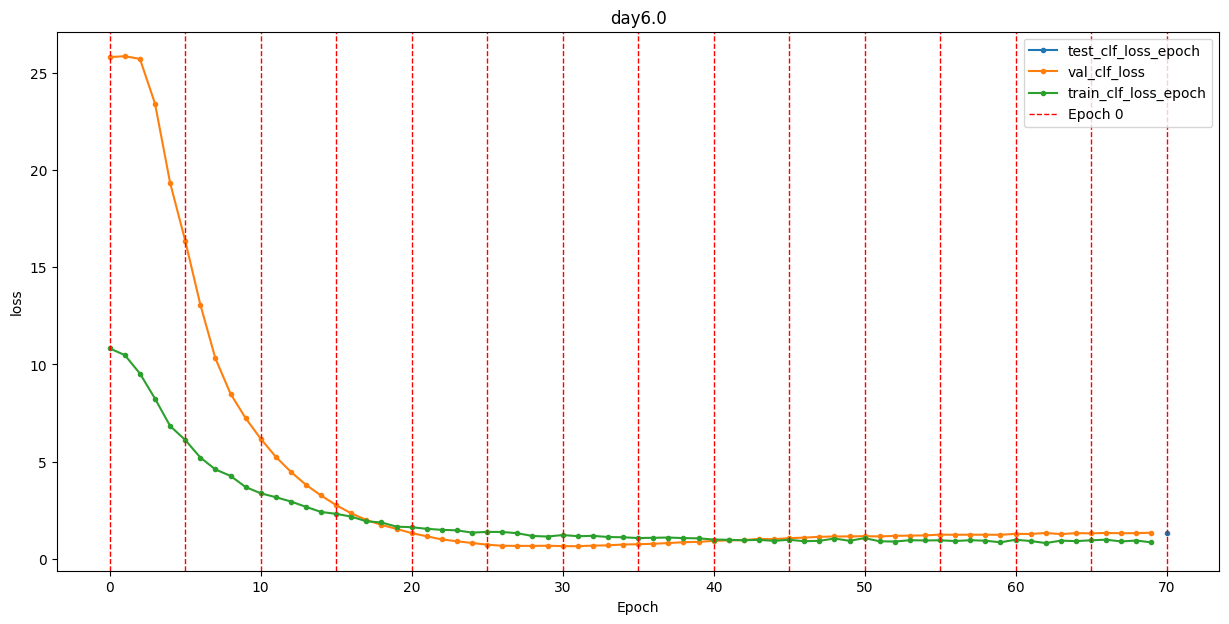

2025-03-12 11:30:04,206 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:30:04,221 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day6.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741796980.GPU2.3578429.9 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day6.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797003.GPU2.3578429.10 
2025-03-12 11:30:04,222 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day6.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797003.GPU2.3578429.10 
2025-03-12 11:30:04,223 IN

Free Memory Percentage: 35.16%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.815GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.261GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.817GB.

[INFO] more than 5% free memory, Auto select GPU device 0,- memory free: 38.817GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(13.6035, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.4035, device='cuda:0'), 'train_KLD_step': tensor(-7.0699, device='cuda:0'), 'train_clf_loss_step': tensor(12.1982, device='cuda:0'), 'val_loss': tensor(15.6398, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8694, device='cuda:0'), 'val_KLD': tensor(-0.2859, device='cuda:0'), 'val_clf_loss': tensor(14.7703, device='cuda:0'), 'train_loss_epoch': tensor(13.6035, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.4035, device='cuda:0'), 'train_KLD_epoch': tensor(-7.0699, device='cuda:0'), 'train_clf_loss_epoch': tensor(12.1982, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(12.8928, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.3464, device='cuda:0'), 'train_KLD_step': tensor(-7.8598, device='cuda:0'), 'train_clf_loss_step': tensor(11.5445, device='cuda:0'), 'val_loss': tensor(15.6809, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8601, device='cuda:0'), 'val_KLD': tensor(-1.2994, device='cuda:0'), 'val_clf_loss': tensor(14.8205, device='cuda:0'), 'train_loss_epoch': tensor(12.8928, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.3464, device='cuda:0'), 'train_KLD_epoch': tensor(-7.8598, device='cuda:0'), 'train_clf_loss_epoch': tensor(11.5445, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(11.5472, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.1499, device='cuda:0'), 'train_KLD_step': tensor(-9.4795, device='cuda:0'), 'train_clf_loss_step': tensor(10.3949, device='cuda:0'), 'val_loss': tensor(14.9656, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8108, device='cuda:0'), 'val_KLD': tensor(-5.6643, device='cuda:0'), 'val_clf_loss': tensor(14.1534, device='cuda:0'), 'train_loss_epoch': tensor(11.5472, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.1499, device='cuda:0'), 'train_KLD_epoch': tensor(-9.4795, device='cuda:0'), 'train_clf_loss_epoch': tensor(10.3949, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(10.3581, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.0372, device='cuda:0'), 'train_KLD_step': tensor(-10.6803, device='cuda:0'), 'train_clf_loss_step': tensor(9.3183, device='cuda:0'), 'val_loss': tensor(13.2000, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8615, device='cuda:0'), 'val_KLD': tensor(-14.6750, device='cuda:0'), 'val_clf_loss': tensor(12.3348, device='cuda:0'), 'train_loss_epoch': tensor(10.3581, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.0372, device='cuda:0'), 'train_KLD_epoch': tensor(-10.6803, device='cuda:0'), 'train_clf_loss_epoch': tensor(9.3183, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(8.9180, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9509, device='cuda:0'), 'train_KLD_step': tensor(-13.1232, device='cuda:0'), 'train_clf_loss_step': tensor(7.9638, device='cuda:0'), 'val_loss': tensor(10.7625, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.0200, device='cuda:0'), 'val_KLD': tensor(-28.4136, device='cuda:0'), 'val_clf_loss': tensor(9.7354, device='cuda:0'), 'train_loss_epoch': tensor(8.9180, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9509, device='cuda:0'), 'train_KLD_epoch': tensor(-13.1232, device='cuda:0'), 'train_clf_loss_epoch': tensor(7.9638, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.9925, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9232, device='cuda:0'), 'train_KLD_step': tensor(-15.6369, device='cuda:0'), 'train_clf_loss_step': tensor(7.0654, device='cuda:0'), 'val_loss': tensor(8.6765, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1375, device='cuda:0'), 'val_KLD': tensor(-48.8022, device='cuda:0'), 'val_clf_loss': tensor(7.5268, device='cuda:0'), 'train_loss_epoch': tensor(7.9925, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9232, device='cuda:0'), 'train_KLD_epoch': tensor(-15.6369, device='cuda:0'), 'train_clf_loss_epoch': tensor(7.0654, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.0311, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8982, device='cuda:0'), 'train_KLD_step': tensor(-18.1413, device='cuda:0'), 'train_clf_loss_step': tensor(6.1285, device='cuda:0'), 'val_loss': tensor(6.8199, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2417, device='cuda:0'), 'val_KLD': tensor(-79.1610, device='cuda:0'), 'val_clf_loss': tensor(5.5584, device='cuda:0'), 'train_loss_epoch': tensor(7.0311, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8982, device='cuda:0'), 'train_KLD_epoch': tensor(-18.1413, device='cuda:0'), 'train_clf_loss_epoch': tensor(6.1285, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.3917, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8782, device='cuda:0'), 'train_KLD_step': tensor(-20.8299, device='cuda:0'), 'train_clf_loss_step': tensor(5.5083, device='cuda:0'), 'val_loss': tensor(5.4591, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2446, device='cuda:0'), 'val_KLD': tensor(-112.2834, device='cuda:0'), 'val_clf_loss': tensor(4.1864, device='cuda:0'), 'train_loss_epoch': tensor(6.3917, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8782, device='cuda:0'), 'train_KLD_epoch': tensor(-20.8299, device='cuda:0'), 'train_clf_loss_epoch': tensor(5.5083, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.0237, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8745, device='cuda:0'), 'train_KLD_step': tensor(-23.2510, device='cuda:0'), 'train_clf_loss_step': tensor(5.1434, device='cuda:0'), 'val_loss': tensor(4.7533, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2529, device='cuda:0'), 'val_KLD': tensor(-127.9583, device='cuda:0'), 'val_clf_loss': tensor(3.4684, device='cuda:0'), 'train_loss_epoch': tensor(6.0237, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8745, device='cuda:0'), 'train_KLD_epoch': tensor(-23.2510, device='cuda:0'), 'train_clf_loss_epoch': tensor(5.1434, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.2155, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8666, device='cuda:0'), 'train_KLD_step': tensor(-25.8430, device='cuda:0'), 'train_clf_loss_step': tensor(4.3425, device='cuda:0'), 'val_loss': tensor(4.1444, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2552, device='cuda:0'), 'val_KLD': tensor(-145.4312, device='cuda:0'), 'val_clf_loss': tensor(2.8528, device='cuda:0'), 'train_loss_epoch': tensor(5.2155, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8666, device='cuda:0'), 'train_KLD_epoch': tensor(-25.8430, device='cuda:0'), 'train_clf_loss_epoch': tensor(4.3425, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.1030, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8596, device='cuda:0'), 'train_KLD_step': tensor(-28.6876, device='cuda:0'), 'train_clf_loss_step': tensor(4.2362, device='cuda:0'), 'val_loss': tensor(3.1362, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2500, device='cuda:0'), 'val_KLD': tensor(-166.9943, device='cuda:0'), 'val_clf_loss': tensor(1.8445, device='cuda:0'), 'train_loss_epoch': tensor(5.1030, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8596, device='cuda:0'), 'train_KLD_epoch': tensor(-28.6876, device='cuda:0'), 'train_clf_loss_epoch': tensor(4.2362, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.5699, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8494, device='cuda:0'), 'train_KLD_step': tensor(-31.0875, device='cuda:0'), 'train_clf_loss_step': tensor(3.7127, device='cuda:0'), 'val_loss': tensor(2.5636, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2282, device='cuda:0'), 'val_KLD': tensor(-177.4142, device='cuda:0'), 'val_clf_loss': tensor(1.2911, device='cuda:0'), 'train_loss_epoch': tensor(4.5699, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8494, device='cuda:0'), 'train_KLD_epoch': tensor(-31.0875, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.7127, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.3398, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8440, device='cuda:0'), 'train_KLD_step': tensor(-33.2338, device='cuda:0'), 'train_clf_loss_step': tensor(3.4875, device='cuda:0'), 'val_loss': tensor(2.2171, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1932, device='cuda:0'), 'val_KLD': tensor(-172.4341, device='cuda:0'), 'val_clf_loss': tensor(0.9808, device='cuda:0'), 'train_loss_epoch': tensor(4.3398, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8440, device='cuda:0'), 'train_KLD_epoch': tensor(-33.2338, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.4875, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.0645, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8426, device='cuda:0'), 'train_KLD_step': tensor(-35.2592, device='cuda:0'), 'train_clf_loss_step': tensor(3.2131, device='cuda:0'), 'val_loss': tensor(1.9712, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1554, device='cuda:0'), 'val_KLD': tensor(-153.5999, device='cuda:0'), 'val_clf_loss': tensor(0.7774, device='cuda:0'), 'train_loss_epoch': tensor(4.0645, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8426, device='cuda:0'), 'train_KLD_epoch': tensor(-35.2592, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.2131, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.8926, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8344, device='cuda:0'), 'train_KLD_step': tensor(-37.2160, device='cuda:0'), 'train_clf_loss_step': tensor(3.0489, device='cuda:0'), 'val_loss': tensor(2.1842, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1197, device='cuda:0'), 'val_KLD': tensor(-142.1225, device='cuda:0'), 'val_clf_loss': tensor(1.0290, device='cuda:0'), 'train_loss_epoch': tensor(3.8926, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8344, device='cuda:0'), 'train_KLD_epoch': tensor(-37.2160, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.0489, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.6539, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8273, device='cuda:0'), 'train_KLD_step': tensor(-39.1138, device='cuda:0'), 'train_clf_loss_step': tensor(2.8168, device='cuda:0'), 'val_loss': tensor(2.2790, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1032, device='cuda:0'), 'val_KLD': tensor(-145.6376, device='cuda:0'), 'val_clf_loss': tensor(1.1393, device='cuda:0'), 'train_loss_epoch': tensor(3.6539, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8273, device='cuda:0'), 'train_KLD_epoch': tensor(-39.1138, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.8168, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.5124, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8233, device='cuda:0'), 'train_KLD_step': tensor(-40.8462, device='cuda:0'), 'train_clf_loss_step': tensor(2.6788, device='cuda:0'), 'val_loss': tensor(1.8349, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.0803, device='cuda:0'), 'val_KLD': tensor(-152.1197, device='cuda:0'), 'val_clf_loss': tensor(0.7166, device='cuda:0'), 'train_loss_epoch': tensor(3.5124, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8233, device='cuda:0'), 'train_KLD_epoch': tensor(-40.8462, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.6788, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3548, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8188, device='cuda:0'), 'train_KLD_step': tensor(-42.4971, device='cuda:0'), 'train_clf_loss_step': tensor(2.5254, device='cuda:0'), 'val_loss': tensor(1.6249, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.0302, device='cuda:0'), 'val_KLD': tensor(-154.2852, device='cuda:0'), 'val_clf_loss': tensor(0.5561, device='cuda:0'), 'train_loss_epoch': tensor(3.3548, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8188, device='cuda:0'), 'train_KLD_epoch': tensor(-42.4971, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.5254, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1762, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8201, device='cuda:0'), 'train_KLD_step': tensor(-43.9456, device='cuda:0'), 'train_clf_loss_step': tensor(2.3451, device='cuda:0'), 'val_loss': tensor(1.2467, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9771, device='cuda:0'), 'val_KLD': tensor(-146.1948, device='cuda:0'), 'val_clf_loss': tensor(0.2331, device='cuda:0'), 'train_loss_epoch': tensor(3.1762, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8201, device='cuda:0'), 'train_KLD_epoch': tensor(-43.9456, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.3451, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.0013, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8100, device='cuda:0'), 'train_KLD_step': tensor(-45.2872, device='cuda:0'), 'train_clf_loss_step': tensor(2.1800, device='cuda:0'), 'val_loss': tensor(1.3434, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9448, device='cuda:0'), 'val_KLD': tensor(-133.8250, device='cuda:0'), 'val_clf_loss': tensor(0.3651, device='cuda:0'), 'train_loss_epoch': tensor(3.0013, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8100, device='cuda:0'), 'train_KLD_epoch': tensor(-45.2872, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.1800, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8953, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8060, device='cuda:0'), 'train_KLD_step': tensor(-46.3090, device='cuda:0'), 'train_clf_loss_step': tensor(2.0777, device='cuda:0'), 'val_loss': tensor(1.2468, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9039, device='cuda:0'), 'val_KLD': tensor(-126.7701, device='cuda:0'), 'val_clf_loss': tensor(0.3112, device='cuda:0'), 'train_loss_epoch': tensor(2.8953, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8060, device='cuda:0'), 'train_KLD_epoch': tensor(-46.3090, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.0777, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6638, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7946, device='cuda:0'), 'train_KLD_step': tensor(-47.2575, device='cuda:0'), 'train_clf_loss_step': tensor(1.8574, device='cuda:0'), 'val_loss': tensor(1.4000, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8982, device='cuda:0'), 'val_KLD': tensor(-119.1322, device='cuda:0'), 'val_clf_loss': tensor(0.4720, device='cuda:0'), 'train_loss_epoch': tensor(2.6638, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7946, device='cuda:0'), 'train_KLD_epoch': tensor(-47.2575, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.8574, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5882, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7981, device='cuda:0'), 'train_KLD_step': tensor(-48.1325, device='cuda:0'), 'train_clf_loss_step': tensor(1.7780, device='cuda:0'), 'val_loss': tensor(1.6735, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8780, device='cuda:0'), 'val_KLD': tensor(-116.1091, device='cuda:0'), 'val_clf_loss': tensor(0.7665, device='cuda:0'), 'train_loss_epoch': tensor(2.5882, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7981, device='cuda:0'), 'train_KLD_epoch': tensor(-48.1325, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7780, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5329, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7930, device='cuda:0'), 'train_KLD_step': tensor(-49.1873, device='cuda:0'), 'train_clf_loss_step': tensor(1.7276, device='cuda:0'), 'val_loss': tensor(1.7495, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8593, device='cuda:0'), 'val_KLD': tensor(-115.8665, device='cuda:0'), 'val_clf_loss': tensor(0.8612, device='cuda:0'), 'train_loss_epoch': tensor(2.5329, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7930, device='cuda:0'), 'train_KLD_epoch': tensor(-49.1873, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7276, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4595, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7905, device='cuda:0'), 'train_KLD_step': tensor(-50.4678, device='cuda:0'), 'train_clf_loss_step': tensor(1.6565, device='cuda:0'), 'val_loss': tensor(1.6324, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8267, device='cuda:0'), 'val_KLD': tensor(-112.8827, device='cuda:0'), 'val_clf_loss': tensor(0.7774, device='cuda:0'), 'train_loss_epoch': tensor(2.4595, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7905, device='cuda:0'), 'train_KLD_epoch': tensor(-50.4678, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6565, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4725, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7858, device='cuda:0'), 'train_KLD_step': tensor(-51.6274, device='cuda:0'), 'train_clf_loss_step': tensor(1.6738, device='cuda:0'), 'val_loss': tensor(1.6963, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8175, device='cuda:0'), 'val_KLD': tensor(-107.7287, device='cuda:0'), 'val_clf_loss': tensor(0.8518, device='cuda:0'), 'train_loss_epoch': tensor(2.4725, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7858, device='cuda:0'), 'train_KLD_epoch': tensor(-51.6274, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6738, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4216, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7832, device='cuda:0'), 'train_KLD_step': tensor(-52.6545, device='cuda:0'), 'train_clf_loss_step': tensor(1.6253, device='cuda:0'), 'val_loss': tensor(1.6616, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8122, device='cuda:0'), 'val_KLD': tensor(-98.9420, device='cuda:0'), 'val_clf_loss': tensor(0.8247, device='cuda:0'), 'train_loss_epoch': tensor(2.4216, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7832, device='cuda:0'), 'train_KLD_epoch': tensor(-52.6545, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6253, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4838, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7825, device='cuda:0'), 'train_KLD_step': tensor(-53.4625, device='cuda:0'), 'train_clf_loss_step': tensor(1.6880, device='cuda:0'), 'val_loss': tensor(1.7760, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8043, device='cuda:0'), 'val_KLD': tensor(-90.0839, device='cuda:0'), 'val_clf_loss': tensor(0.9492, device='cuda:0'), 'train_loss_epoch': tensor(2.4838, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7825, device='cuda:0'), 'train_KLD_epoch': tensor(-53.4625, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6880, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2178, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7872, device='cuda:0'), 'train_KLD_step': tensor(-54.0637, device='cuda:0'), 'train_clf_loss_step': tensor(1.4171, device='cuda:0'), 'val_loss': tensor(1.7348, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7777, device='cuda:0'), 'val_KLD': tensor(-81.8451, device='cuda:0'), 'val_clf_loss': tensor(0.9367, device='cuda:0'), 'train_loss_epoch': tensor(2.2178, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7872, device='cuda:0'), 'train_KLD_epoch': tensor(-54.0637, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4171, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0225, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7814, device='cuda:0'), 'train_KLD_step': tensor(-54.5034, device='cuda:0'), 'train_clf_loss_step': tensor(1.2275, device='cuda:0'), 'val_loss': tensor(1.7989, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7675, device='cuda:0'), 'val_KLD': tensor(-73.9273, device='cuda:0'), 'val_clf_loss': tensor(1.0129, device='cuda:0'), 'train_loss_epoch': tensor(2.0225, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7814, device='cuda:0'), 'train_KLD_epoch': tensor(-54.5034, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2275, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1803, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7764, device='cuda:0'), 'train_KLD_step': tensor(-54.9124, device='cuda:0'), 'train_clf_loss_step': tensor(1.3902, device='cuda:0'), 'val_loss': tensor(1.8199, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7571, device='cuda:0'), 'val_KLD': tensor(-68.5277, device='cuda:0'), 'val_clf_loss': tensor(1.0457, device='cuda:0'), 'train_loss_epoch': tensor(2.1803, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7764, device='cuda:0'), 'train_KLD_epoch': tensor(-54.9124, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3902, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1566, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7758, device='cuda:0'), 'train_KLD_step': tensor(-55.3842, device='cuda:0'), 'train_clf_loss_step': tensor(1.3669, device='cuda:0'), 'val_loss': tensor(1.8551, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7429, device='cuda:0'), 'val_KLD': tensor(-66.1638, device='cuda:0'), 'val_clf_loss': tensor(1.0956, device='cuda:0'), 'train_loss_epoch': tensor(2.1566, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7758, device='cuda:0'), 'train_KLD_epoch': tensor(-55.3842, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3669, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0879, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7716, device='cuda:0'), 'train_KLD_step': tensor(-55.9232, device='cuda:0'), 'train_clf_loss_step': tensor(1.3023, device='cuda:0'), 'val_loss': tensor(2.0376, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7493, device='cuda:0'), 'val_KLD': tensor(-67.6267, device='cuda:0'), 'val_clf_loss': tensor(1.2714, device='cuda:0'), 'train_loss_epoch': tensor(2.0879, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7716, device='cuda:0'), 'train_KLD_epoch': tensor(-55.9232, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3023, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0688, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7697, device='cuda:0'), 'train_KLD_step': tensor(-56.5855, device='cuda:0'), 'train_clf_loss_step': tensor(1.2849, device='cuda:0'), 'val_loss': tensor(1.8921, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7402, device='cuda:0'), 'val_KLD': tensor(-68.6296, device='cuda:0'), 'val_clf_loss': tensor(1.1348, device='cuda:0'), 'train_loss_epoch': tensor(2.0688, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7697, device='cuda:0'), 'train_KLD_epoch': tensor(-56.5855, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2849, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0103, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7682, device='cuda:0'), 'train_KLD_step': tensor(-57.1492, device='cuda:0'), 'train_clf_loss_step': tensor(1.2278, device='cuda:0'), 'val_loss': tensor(1.9971, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7426, device='cuda:0'), 'val_KLD': tensor(-70.7320, device='cuda:0'), 'val_clf_loss': tensor(1.2369, device='cuda:0'), 'train_loss_epoch': tensor(2.0103, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7682, device='cuda:0'), 'train_KLD_epoch': tensor(-57.1492, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2278, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0205, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7671, device='cuda:0'), 'train_KLD_step': tensor(-57.7067, device='cuda:0'), 'train_clf_loss_step': tensor(1.2389, device='cuda:0'), 'val_loss': tensor(1.9493, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7426, device='cuda:0'), 'val_KLD': tensor(-71.3738, device='cuda:0'), 'val_clf_loss': tensor(1.1888, device='cuda:0'), 'train_loss_epoch': tensor(2.0205, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7671, device='cuda:0'), 'train_KLD_epoch': tensor(-57.7067, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2389, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1304, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7635, device='cuda:0'), 'train_KLD_step': tensor(-58.1397, device='cuda:0'), 'train_clf_loss_step': tensor(1.3523, device='cuda:0'), 'val_loss': tensor(1.9902, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7376, device='cuda:0'), 'val_KLD': tensor(-73.2334, device='cuda:0'), 'val_clf_loss': tensor(1.2343, device='cuda:0'), 'train_loss_epoch': tensor(2.1304, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7635, device='cuda:0'), 'train_KLD_epoch': tensor(-58.1397, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3523, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9946, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7637, device='cuda:0'), 'train_KLD_step': tensor(-58.5406, device='cuda:0'), 'train_clf_loss_step': tensor(1.2163, device='cuda:0'), 'val_loss': tensor(1.7958, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7377, device='cuda:0'), 'val_KLD': tensor(-74.2236, device='cuda:0'), 'val_clf_loss': tensor(1.0396, device='cuda:0'), 'train_loss_epoch': tensor(1.9946, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7637, device='cuda:0'), 'train_KLD_epoch': tensor(-58.5406, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2163, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0110, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7609, device='cuda:0'), 'train_KLD_step': tensor(-58.8555, device='cuda:0'), 'train_clf_loss_step': tensor(1.2354, device='cuda:0'), 'val_loss': tensor(1.9056, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7373, device='cuda:0'), 'val_KLD': tensor(-72.6136, device='cuda:0'), 'val_clf_loss': tensor(1.1502, device='cuda:0'), 'train_loss_epoch': tensor(2.0110, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7609, device='cuda:0'), 'train_KLD_epoch': tensor(-58.8555, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2354, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9049, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7597, device='cuda:0'), 'train_KLD_step': tensor(-59.0797, device='cuda:0'), 'train_clf_loss_step': tensor(1.1304, device='cuda:0'), 'val_loss': tensor(1.9448, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7292, device='cuda:0'), 'val_KLD': tensor(-70.1644, device='cuda:0'), 'val_clf_loss': tensor(1.1981, device='cuda:0'), 'train_loss_epoch': tensor(1.9049, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7597, device='cuda:0'), 'train_KLD_epoch': tensor(-59.0797, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1304, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0427, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7586, device='cuda:0'), 'train_KLD_step': tensor(-59.2937, device='cuda:0'), 'train_clf_loss_step': tensor(1.2693, device='cuda:0'), 'val_loss': tensor(2.1527, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7381, device='cuda:0'), 'val_KLD': tensor(-65.7660, device='cuda:0'), 'val_clf_loss': tensor(1.3982, device='cuda:0'), 'train_loss_epoch': tensor(2.0427, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7586, device='cuda:0'), 'train_KLD_epoch': tensor(-59.2937, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2693, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9370, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7558, device='cuda:0'), 'train_KLD_step': tensor(-59.4385, device='cuda:0'), 'train_clf_loss_step': tensor(1.1663, device='cuda:0'), 'val_loss': tensor(2.0626, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7255, device='cuda:0'), 'val_KLD': tensor(-61.4248, device='cuda:0'), 'val_clf_loss': tensor(1.3218, device='cuda:0'), 'train_loss_epoch': tensor(1.9370, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7558, device='cuda:0'), 'train_KLD_epoch': tensor(-59.4385, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1663, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9298, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7605, device='cuda:0'), 'train_KLD_step': tensor(-59.6088, device='cuda:0'), 'train_clf_loss_step': tensor(1.1544, device='cuda:0'), 'val_loss': tensor(2.1375, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7329, device='cuda:0'), 'val_KLD': tensor(-59.1620, device='cuda:0'), 'val_clf_loss': tensor(1.3898, device='cuda:0'), 'train_loss_epoch': tensor(1.9298, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7605, device='cuda:0'), 'train_KLD_epoch': tensor(-59.6088, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1544, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8941, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7569, device='cuda:0'), 'train_KLD_step': tensor(-59.8840, device='cuda:0'), 'train_clf_loss_step': tensor(1.1222, device='cuda:0'), 'val_loss': tensor(2.3879, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7276, device='cuda:0'), 'val_KLD': tensor(-57.0257, device='cuda:0'), 'val_clf_loss': tensor(1.6461, device='cuda:0'), 'train_loss_epoch': tensor(1.8941, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7569, device='cuda:0'), 'train_KLD_epoch': tensor(-59.8840, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1222, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7651, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7564, device='cuda:0'), 'train_KLD_step': tensor(-60.1755, device='cuda:0'), 'train_clf_loss_step': tensor(0.9936, device='cuda:0'), 'val_loss': tensor(2.3766, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7253, device='cuda:0'), 'val_KLD': tensor(-55.3569, device='cuda:0'), 'val_clf_loss': tensor(1.6374, device='cuda:0'), 'train_loss_epoch': tensor(1.7651, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7564, device='cuda:0'), 'train_KLD_epoch': tensor(-60.1755, device='cuda:0'), 'train_clf_loss_epoch': tensor(0.9936, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0183, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7570, device='cuda:0'), 'train_KLD_step': tensor(-60.4519, device='cuda:0'), 'train_clf_loss_step': tensor(1.2462, device='cuda:0'), 'val_loss': tensor(2.3821, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7334, device='cuda:0'), 'val_KLD': tensor(-57.2859, device='cuda:0'), 'val_clf_loss': tensor(1.6344, device='cuda:0'), 'train_loss_epoch': tensor(2.0183, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7570, device='cuda:0'), 'train_KLD_epoch': tensor(-60.4519, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2462, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8967, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7546, device='cuda:0'), 'train_KLD_step': tensor(-60.8400, device='cuda:0'), 'train_clf_loss_step': tensor(1.1269, device='cuda:0'), 'val_loss': tensor(2.4918, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7235, device='cuda:0'), 'val_KLD': tensor(-59.8514, device='cuda:0'), 'val_clf_loss': tensor(1.7533, device='cuda:0'), 'train_loss_epoch': tensor(1.8967, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7546, device='cuda:0'), 'train_KLD_epoch': tensor(-60.8400, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1269, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8108, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7573, device='cuda:0'), 'train_KLD_step': tensor(-61.2292, device='cuda:0'), 'train_clf_loss_step': tensor(1.0381, device='cuda:0'), 'val_loss': tensor(2.5824, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7292, device='cuda:0'), 'val_KLD': tensor(-61.4067, device='cuda:0'), 'val_clf_loss': tensor(1.8378, device='cuda:0'), 'train_loss_epoch': tensor(1.8108, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7573, device='cuda:0'), 'train_KLD_epoch': tensor(-61.2292, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0381, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9411, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7556, device='cuda:0'), 'train_KLD_step': tensor(-61.5449, device='cuda:0'), 'train_clf_loss_step': tensor(1.1701, device='cuda:0'), 'val_loss': tensor(2.6659, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7301, device='cuda:0'), 'val_KLD': tensor(-62.2361, device='cuda:0'), 'val_clf_loss': tensor(1.9202, device='cuda:0'), 'train_loss_epoch': tensor(1.9411, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7556, device='cuda:0'), 'train_KLD_epoch': tensor(-61.5449, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1701, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8466, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7531, device='cuda:0'), 'train_KLD_step': tensor(-61.8433, device='cuda:0'), 'train_clf_loss_step': tensor(1.0781, device='cuda:0'), 'val_loss': tensor(2.6374, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7199, device='cuda:0'), 'val_KLD': tensor(-61.6206, device='cuda:0'), 'val_clf_loss': tensor(1.9021, device='cuda:0'), 'train_loss_epoch': tensor(1.8466, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7531, device='cuda:0'), 'train_KLD_epoch': tensor(-61.8433, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0781, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8614, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7529, device='cuda:0'), 'train_KLD_step': tensor(-62.0661, device='cuda:0'), 'train_clf_loss_step': tensor(1.0930, device='cuda:0'), 'val_loss': tensor(2.5100, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7194, device='cuda:0'), 'val_KLD': tensor(-60.4510, device='cuda:0'), 'val_clf_loss': tensor(1.7755, device='cuda:0'), 'train_loss_epoch': tensor(1.8614, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7529, device='cuda:0'), 'train_KLD_epoch': tensor(-62.0661, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0930, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8040, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7531, device='cuda:0'), 'train_KLD_step': tensor(-62.2071, device='cuda:0'), 'train_clf_loss_step': tensor(1.0353, device='cuda:0'), 'val_loss': tensor(2.4693, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7188, device='cuda:0'), 'val_KLD': tensor(-59.4680, device='cuda:0'), 'val_clf_loss': tensor(1.7356, device='cuda:0'), 'train_loss_epoch': tensor(1.8040, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7531, device='cuda:0'), 'train_KLD_epoch': tensor(-62.2071, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0353, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7188, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7514, device='cuda:0'), 'train_KLD_step': tensor(-62.3460, device='cuda:0'), 'train_clf_loss_step': tensor(0.9518, device='cuda:0'), 'val_loss': tensor(2.4941, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7146, device='cuda:0'), 'val_KLD': tensor(-57.9375, device='cuda:0'), 'val_clf_loss': tensor(1.7650, device='cuda:0'), 'train_loss_epoch': tensor(1.7188, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7514, device='cuda:0'), 'train_KLD_epoch': tensor(-62.3460, device='cuda:0'), 'train_clf_loss_epoch': tensor(0.9518, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8938, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7547, device='cuda:0'), 'train_KLD_step': tensor(-62.4325, device='cuda:0'), 'train_clf_loss_step': tensor(1.1235, device='cuda:0'), 'val_loss': tensor(2.6412, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7165, device='cuda:0'), 'val_KLD': tensor(-56.4387, device='cuda:0'), 'val_clf_loss': tensor(1.9106, device='cuda:0'), 'train_loss_epoch': tensor(1.8938, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7547, device='cuda:0'), 'train_KLD_epoch': tensor(-62.4325, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1235, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8255, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7527, device='cuda:0'), 'train_KLD_step': tensor(-62.4721, device='cuda:0'), 'train_clf_loss_step': tensor(1.0572, device='cuda:0'), 'val_loss': tensor(2.6646, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7071, device='cuda:0'), 'val_KLD': tensor(-55.3468, device='cuda:0'), 'val_clf_loss': tensor(1.9437, device='cuda:0'), 'train_loss_epoch': tensor(1.8255, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7527, device='cuda:0'), 'train_KLD_epoch': tensor(-62.4721, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0572, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7662, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7509, device='cuda:0'), 'train_KLD_step': tensor(-62.5199, device='cuda:0'), 'train_clf_loss_step': tensor(0.9997, device='cuda:0'), 'val_loss': tensor(2.7117, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7113, device='cuda:0'), 'val_KLD': tensor(-54.4273, device='cuda:0'), 'val_clf_loss': tensor(1.9868, device='cuda:0'), 'train_loss_epoch': tensor(1.7662, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7509, device='cuda:0'), 'train_KLD_epoch': tensor(-62.5199, device='cuda:0'), 'train_clf_loss_epoch': tensor(0.9997, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7709, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7496, device='cuda:0'), 'train_KLD_step': tensor(-62.5667, device='cuda:0'), 'train_clf_loss_step': tensor(1.0056, device='cuda:0'), 'val_loss': tensor(2.6629, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7143, device='cuda:0'), 'val_KLD': tensor(-53.9714, device='cuda:0'), 'val_clf_loss': tensor(1.9351, device='cuda:0'), 'train_loss_epoch': tensor(1.7709, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7496, device='cuda:0'), 'train_KLD_epoch': tensor(-62.5667, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0056, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8703, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7527, device='cuda:0'), 'train_KLD_step': tensor(-62.6271, device='cuda:0'), 'train_clf_loss_step': tensor(1.1019, device='cuda:0'), 'val_loss': tensor(2.4935, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7148, device='cuda:0'), 'val_KLD': tensor(-53.8760, device='cuda:0'), 'val_clf_loss': tensor(1.7653, device='cuda:0'), 'train_loss_epoch': tensor(1.8703, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7527, device='cuda:0'), 'train_KLD_epoch': tensor(-62.6271, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1019, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7912, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7510, device='cuda:0'), 'train_KLD_step': tensor(-62.7321, device='cuda:0'), 'train_clf_loss_step': tensor(1.0245, device='cuda:0'), 'val_loss': tensor(2.4233, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7052, device='cuda:0'), 'val_KLD': tensor(-54.2153, device='cuda:0'), 'val_clf_loss': tensor(1.7046, device='cuda:0'), 'train_loss_epoch': tensor(1.7912, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7510, device='cuda:0'), 'train_KLD_epoch': tensor(-62.7321, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0245, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7882, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7463, device='cuda:0'), 'train_KLD_step': tensor(-62.8516, device='cuda:0'), 'train_clf_loss_step': tensor(1.0263, device='cuda:0'), 'val_loss': tensor(2.5872, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7086, device='cuda:0'), 'val_KLD': tensor(-54.4617, device='cuda:0'), 'val_clf_loss': tensor(1.8650, device='cuda:0'), 'train_loss_epoch': tensor(1.7882, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7463, device='cuda:0'), 'train_KLD_epoch': tensor(-62.8516, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0263, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7213, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7505, device='cuda:0'), 'train_KLD_step': tensor(-62.9790, device='cuda:0'), 'train_clf_loss_step': tensor(0.9550, device='cuda:0'), 'val_loss': tensor(2.7008, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7080, device='cuda:0'), 'val_KLD': tensor(-54.4128, device='cuda:0'), 'val_clf_loss': tensor(1.9791, device='cuda:0'), 'train_loss_epoch': tensor(1.7213, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7505, device='cuda:0'), 'train_KLD_epoch': tensor(-62.9790, device='cuda:0'), 'train_clf_loss_epoch': tensor(0.9550, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8137, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7489, device='cuda:0'), 'train_KLD_step': tensor(-63.0925, device='cuda:0'), 'train_clf_loss_step': tensor(1.0490, device='cuda:0'), 'val_loss': tensor(2.4476, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7101, device='cuda:0'), 'val_KLD': tensor(-54.7556, device='cuda:0'), 'val_clf_loss': tensor(1.7238, device='cuda:0'), 'train_loss_epoch': tensor(1.8137, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7489, device='cuda:0'), 'train_KLD_epoch': tensor(-63.0925, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0490, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8030, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7502, device='cuda:0'), 'train_KLD_step': tensor(-63.2023, device='cuda:0'), 'train_clf_loss_step': tensor(1.0370, device='cuda:0'), 'val_loss': tensor(2.6173, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7113, device='cuda:0'), 'val_KLD': tensor(-55.2391, device='cuda:0'), 'val_clf_loss': tensor(1.8922, device='cuda:0'), 'train_loss_epoch': tensor(1.8030, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7502, device='cuda:0'), 'train_KLD_epoch': tensor(-63.2023, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0370, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7238, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7483, device='cuda:0'), 'train_KLD_step': tensor(-63.3111, device='cuda:0'), 'train_clf_loss_step': tensor(0.9597, device='cuda:0'), 'val_loss': tensor(2.4790, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7047, device='cuda:0'), 'val_KLD': tensor(-55.6244, device='cuda:0'), 'val_clf_loss': tensor(1.7605, device='cuda:0'), 'train_loss_epoch': tensor(1.7238, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7483, device='cuda:0'), 'train_KLD_epoch': tensor(-63.3111, device='cuda:0'), 'train_clf_loss_epoch': tensor(0.9597, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7919, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7481, device='cuda:0'), 'train_KLD_step': tensor(-63.3867, device='cuda:0'), 'train_clf_loss_step': tensor(1.0280, device='cuda:0'), 'val_loss': tensor(2.4068, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7077, device='cuda:0'), 'val_KLD': tensor(-56.0969, device='cuda:0'), 'val_clf_loss': tensor(1.6851, device='cuda:0'), 'train_loss_epoch': tensor(1.7919, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7481, device='cuda:0'), 'train_KLD_epoch': tensor(-63.3867, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0280, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8663, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7467, device='cuda:0'), 'train_KLD_step': tensor(-63.4733, device='cuda:0'), 'train_clf_loss_step': tensor(1.1037, device='cuda:0'), 'val_loss': tensor(2.5405, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7073, device='cuda:0'), 'val_KLD': tensor(-56.0903, device='cuda:0'), 'val_clf_loss': tensor(1.8192, device='cuda:0'), 'train_loss_epoch': tensor(1.8663, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7467, device='cuda:0'), 'train_KLD_epoch': tensor(-63.4733, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1037, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8242, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7488, device='cuda:0'), 'train_KLD_step': tensor(-63.5602, device='cuda:0'), 'train_clf_loss_step': tensor(1.0595, device='cuda:0'), 'val_loss': tensor(2.4935, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7059, device='cuda:0'), 'val_KLD': tensor(-55.8102, device='cuda:0'), 'val_clf_loss': tensor(1.7737, device='cuda:0'), 'train_loss_epoch': tensor(1.8242, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7488, device='cuda:0'), 'train_KLD_epoch': tensor(-63.5602, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0595, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8012, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7469, device='cuda:0'), 'train_KLD_step': tensor(-63.6355, device='cuda:0'), 'train_clf_loss_step': tensor(1.0383, device='cuda:0'), 'val_loss': tensor(2.4892, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7009, device='cuda:0'), 'val_KLD': tensor(-55.7064, device='cuda:0'), 'val_clf_loss': tensor(1.7743, device='cuda:0'), 'train_loss_epoch': tensor(1.8012, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7469, device='cuda:0'), 'train_KLD_epoch': tensor(-63.6355, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0383, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7737, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7468, device='cuda:0'), 'train_KLD_step': tensor(-63.7083, device='cuda:0'), 'train_clf_loss_step': tensor(1.0109, device='cuda:0'), 'val_loss': tensor(2.4531, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7032, device='cuda:0'), 'val_KLD': tensor(-55.7042, device='cuda:0'), 'val_clf_loss': tensor(1.7360, device='cuda:0'), 'train_loss_epoch': tensor(1.7737, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7468, device='cuda:0'), 'train_KLD_epoch': tensor(-63.7083, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0109, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:30:24,946 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.8068, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7473, device='cuda:0'), 'train_KLD_step': tensor(-63.7664, device='cuda:0'), 'train_clf_loss_step': tensor(1.0435, device='cuda:0'), 'val_loss': tensor(2.6042, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7126, device='cuda:0'), 'val_KLD': tensor(-55.4978, device='cuda:0'), 'val_clf_loss': tensor(1.8778, device='cuda:0'), 'train_loss_epoch': tensor(1.8068, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7473, device='cuda:0'), 'train_KLD_epoch': tensor(-63.7664, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.0435, device='cuda:0')}


2025-03-12 11:30:24,971 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │       -55.49779510498047       │
│ test_Reconstruction_loss_epoch │       0.7011969685554504       │
│      test_clf_loss_epoch       │       1.8240382671356201       │
│        test_loss_epoch         │       2.539109706878662        │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:30:25,019 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 2.539109706878662, 'test_Reconstruction_loss_epoch': 0.7011969685554504, 'test_KLD_epoch': -55.49779510498047, 'test_clf_loss_epoch': 1.8240382671356201}] 
2025-03-12 11:30:25,023 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:30:25,065 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:30:25,098 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:30:25,098 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:30:25,099 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:30:25,114 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day7.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797004.GPU2.3578429.11 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day7.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797024.GPU2.3578429.12 
2025-03-12 11:30:25,116 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

<Figure size 1500x700 with 0 Axes>

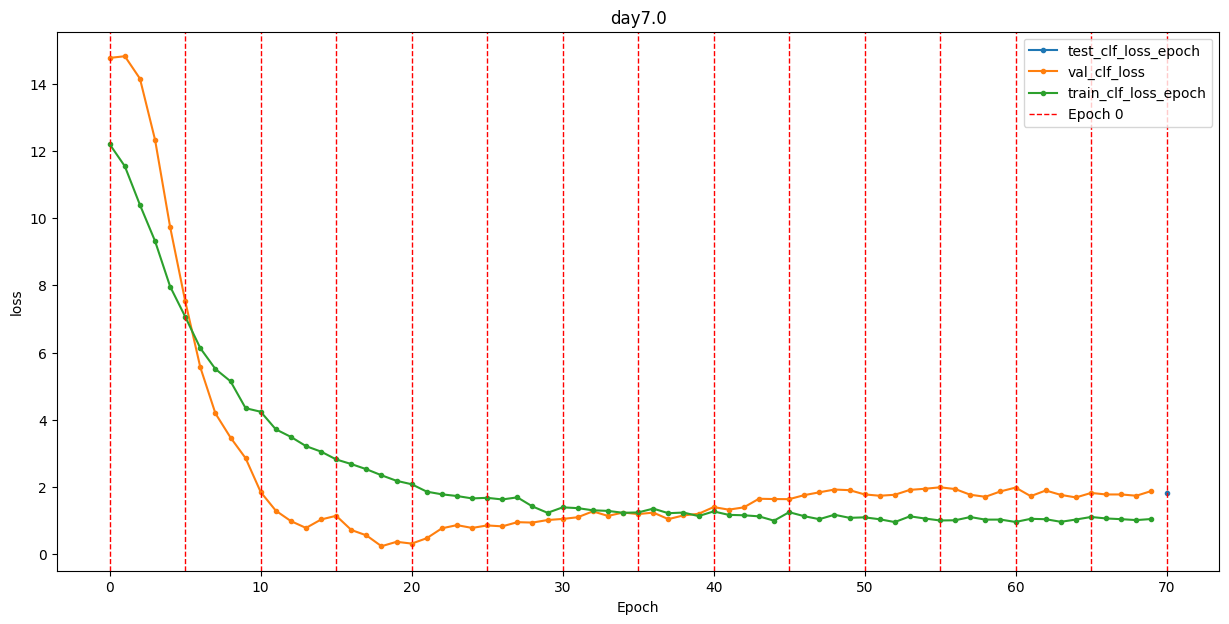

2025-03-12 11:30:25,553 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:30:25,568 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day7.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797004.GPU2.3578429.11 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day7.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797024.GPU2.3578429.12 
2025-03-12 11:30:25,569 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day7.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797024.GPU2.3578429.12 
2025-03-12 11:30:25,570 I

Free Memory Percentage: 35.15%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.819GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.261GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.815GB.

[INFO] more than 5% free memory, Auto select GPU device 2,- memory free: 38.819GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(14.5671, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.4006, device='cuda:2'), 'train_KLD_step': tensor(-7.0398, device='cuda:2'), 'train_clf_loss_step': tensor(13.1648, device='cuda:2'), 'val_loss': tensor(7.5866, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8869, device='cuda:2'), 'val_KLD': tensor(-0.2850, device='cuda:2'), 'val_clf_loss': tensor(6.6996, device='cuda:2'), 'train_loss_epoch': tensor(14.5671, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.4006, device='cuda:2'), 'train_KLD_epoch': tensor(-7.0398, device='cuda:2'), 'train_clf_loss_epoch': tensor(13.1648, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(13.6874, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.3541, device='cuda:2'), 'train_KLD_step': tensor(-7.6960, device='cuda:2'), 'train_clf_loss_step': tensor(12.3313, device='cuda:2'), 'val_loss': tensor(7.6853, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8889, device='cuda:2'), 'val_KLD': tensor(-0.5376, device='cuda:2'), 'val_clf_loss': tensor(6.7963, device='cuda:2'), 'train_loss_epoch': tensor(13.6874, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.3541, device='cuda:2'), 'train_KLD_epoch': tensor(-7.6960, device='cuda:2'), 'train_clf_loss_epoch': tensor(12.3313, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(12.1076, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.1814, device='cuda:2'), 'train_KLD_step': tensor(-9.3122, device='cuda:2'), 'train_clf_loss_step': tensor(10.9239, device='cuda:2'), 'val_loss': tensor(7.6106, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8936, device='cuda:2'), 'val_KLD': tensor(-3.0567, device='cuda:2'), 'val_clf_loss': tensor(6.7163, device='cuda:2'), 'train_loss_epoch': tensor(12.1076, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.1814, device='cuda:2'), 'train_KLD_epoch': tensor(-9.3122, device='cuda:2'), 'train_clf_loss_epoch': tensor(10.9239, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(10.5075, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(1.0650, device='cuda:2'), 'train_KLD_step': tensor(-11.7618, device='cuda:2'), 'train_clf_loss_step': tensor(9.4396, device='cuda:2'), 'val_loss': tensor(7.0234, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9464, device='cuda:2'), 'val_KLD': tensor(-10.9745, device='cuda:2'), 'val_clf_loss': tensor(6.0743, device='cuda:2'), 'train_loss_epoch': tensor(10.5075, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(1.0650, device='cuda:2'), 'train_KLD_epoch': tensor(-11.7618, device='cuda:2'), 'train_clf_loss_epoch': tensor(9.4396, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.1894, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9702, device='cuda:2'), 'train_KLD_step': tensor(-13.8855, device='cuda:2'), 'train_clf_loss_step': tensor(8.2158, device='cuda:2'), 'val_loss': tensor(6.4801, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0072, device='cuda:2'), 'val_KLD': tensor(-24.3988, device='cuda:2'), 'val_clf_loss': tensor(5.4668, device='cuda:2'), 'train_loss_epoch': tensor(9.1894, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9702, device='cuda:2'), 'train_KLD_epoch': tensor(-13.8855, device='cuda:2'), 'train_clf_loss_epoch': tensor(8.2158, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(8.3913, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.9458, device='cuda:2'), 'train_KLD_step': tensor(-16.1403, device='cuda:2'), 'train_clf_loss_step': tensor(7.4414, device='cuda:2'), 'val_loss': tensor(5.3329, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0506, device='cuda:2'), 'val_KLD': tensor(-38.8253, device='cuda:2'), 'val_clf_loss': tensor(4.2727, device='cuda:2'), 'train_loss_epoch': tensor(8.3913, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.9458, device='cuda:2'), 'train_KLD_epoch': tensor(-16.1403, device='cuda:2'), 'train_clf_loss_epoch': tensor(7.4414, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.2037, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8979, device='cuda:2'), 'train_KLD_step': tensor(-18.5975, device='cuda:2'), 'train_clf_loss_step': tensor(6.3012, device='cuda:2'), 'val_loss': tensor(4.8586, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1657, device='cuda:2'), 'val_KLD': tensor(-54.7357, device='cuda:2'), 'val_clf_loss': tensor(3.6791, device='cuda:2'), 'train_loss_epoch': tensor(7.2037, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8979, device='cuda:2'), 'train_KLD_epoch': tensor(-18.5975, device='cuda:2'), 'train_clf_loss_epoch': tensor(6.3012, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.6383, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8927, device='cuda:2'), 'train_KLD_step': tensor(-21.0330, device='cuda:2'), 'train_clf_loss_step': tensor(5.7403, device='cuda:2'), 'val_loss': tensor(4.5218, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1740, device='cuda:2'), 'val_KLD': tensor(-68.8483, device='cuda:2'), 'val_clf_loss': tensor(3.3306, device='cuda:2'), 'train_loss_epoch': tensor(6.6383, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8927, device='cuda:2'), 'train_KLD_epoch': tensor(-21.0330, device='cuda:2'), 'train_clf_loss_epoch': tensor(5.7403, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.2000, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8782, device='cuda:2'), 'train_KLD_step': tensor(-23.4033, device='cuda:2'), 'train_clf_loss_step': tensor(5.3159, device='cuda:2'), 'val_loss': tensor(4.8080, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1439, device='cuda:2'), 'val_KLD': tensor(-80.5984, device='cuda:2'), 'val_clf_loss': tensor(3.6440, device='cuda:2'), 'train_loss_epoch': tensor(6.2000, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8782, device='cuda:2'), 'train_KLD_epoch': tensor(-23.4033, device='cuda:2'), 'train_clf_loss_epoch': tensor(5.3159, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.4947, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8701, device='cuda:2'), 'train_KLD_step': tensor(-25.8882, device='cuda:2'), 'train_clf_loss_step': tensor(4.6180, device='cuda:2'), 'val_loss': tensor(4.4618, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1257, device='cuda:2'), 'val_KLD': tensor(-86.5661, device='cuda:2'), 'val_clf_loss': tensor(3.3145, device='cuda:2'), 'train_loss_epoch': tensor(5.4947, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8701, device='cuda:2'), 'train_KLD_epoch': tensor(-25.8882, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.6180, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.1120, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8620, device='cuda:2'), 'train_KLD_step': tensor(-28.4906, device='cuda:2'), 'train_clf_loss_step': tensor(4.2428, device='cuda:2'), 'val_loss': tensor(4.2940, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0957, device='cuda:2'), 'val_KLD': tensor(-89.9619, device='cuda:2'), 'val_clf_loss': tensor(3.1757, device='cuda:2'), 'train_loss_epoch': tensor(5.1120, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8620, device='cuda:2'), 'train_KLD_epoch': tensor(-28.4906, device='cuda:2'), 'train_clf_loss_epoch': tensor(4.2428, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.6669, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8537, device='cuda:2'), 'train_KLD_step': tensor(-31.0025, device='cuda:2'), 'train_clf_loss_step': tensor(3.8055, device='cuda:2'), 'val_loss': tensor(4.5664, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.1004, device='cuda:2'), 'val_KLD': tensor(-91.3938, device='cuda:2'), 'val_clf_loss': tensor(3.4432, device='cuda:2'), 'train_loss_epoch': tensor(4.6669, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8537, device='cuda:2'), 'train_KLD_epoch': tensor(-31.0025, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.8055, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.3480, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8492, device='cuda:2'), 'train_KLD_step': tensor(-33.2727, device='cuda:2'), 'train_clf_loss_step': tensor(3.4905, device='cuda:2'), 'val_loss': tensor(4.8948, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0907, device='cuda:2'), 'val_KLD': tensor(-92.5561, device='cuda:2'), 'val_clf_loss': tensor(3.7810, device='cuda:2'), 'train_loss_epoch': tensor(4.3480, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8492, device='cuda:2'), 'train_KLD_epoch': tensor(-33.2727, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.4905, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.1132, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8401, device='cuda:2'), 'train_KLD_step': tensor(-35.2836, device='cuda:2'), 'train_clf_loss_step': tensor(3.2643, device='cuda:2'), 'val_loss': tensor(4.6383, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0524, device='cuda:2'), 'val_KLD': tensor(-89.9963, device='cuda:2'), 'val_clf_loss': tensor(3.5634, device='cuda:2'), 'train_loss_epoch': tensor(4.1132, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8401, device='cuda:2'), 'train_KLD_epoch': tensor(-35.2836, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.2643, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.9574, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8320, device='cuda:2'), 'train_KLD_step': tensor(-37.1537, device='cuda:2'), 'train_clf_loss_step': tensor(3.1161, device='cuda:2'), 'val_loss': tensor(4.9947, device='cuda:2'), 'val_Reconstruction_loss': tensor(1.0099, device='cuda:2'), 'val_KLD': tensor(-83.1684, device='cuda:2'), 'val_clf_loss': tensor(3.9640, device='cuda:2'), 'train_loss_epoch': tensor(3.9574, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8320, device='cuda:2'), 'train_KLD_epoch': tensor(-37.1537, device='cuda:2'), 'train_clf_loss_epoch': tensor(3.1161, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.8355, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8260, device='cuda:2'), 'train_KLD_step': tensor(-38.8226, device='cuda:2'), 'train_clf_loss_step': tensor(2.9998, device='cuda:2'), 'val_loss': tensor(4.2129, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9884, device='cuda:2'), 'val_KLD': tensor(-76.1558, device='cuda:2'), 'val_clf_loss': tensor(3.2054, device='cuda:2'), 'train_loss_epoch': tensor(3.8355, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8260, device='cuda:2'), 'train_KLD_epoch': tensor(-38.8226, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.9998, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.6469, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8224, device='cuda:2'), 'train_KLD_step': tensor(-40.3449, device='cuda:2'), 'train_clf_loss_step': tensor(2.8144, device='cuda:2'), 'val_loss': tensor(5.0031, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.9361, device='cuda:2'), 'val_KLD': tensor(-70.4780, device='cuda:2'), 'val_clf_loss': tensor(4.0494, device='cuda:2'), 'train_loss_epoch': tensor(3.6469, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8224, device='cuda:2'), 'train_KLD_epoch': tensor(-40.3449, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.8144, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3783, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8156, device='cuda:2'), 'train_KLD_step': tensor(-41.6927, device='cuda:2'), 'train_clf_loss_step': tensor(2.5523, device='cuda:2'), 'val_loss': tensor(4.4242, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8881, device='cuda:2'), 'val_KLD': tensor(-64.2365, device='cuda:2'), 'val_clf_loss': tensor(3.5200, device='cuda:2'), 'train_loss_epoch': tensor(3.3783, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8156, device='cuda:2'), 'train_KLD_epoch': tensor(-41.6927, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.5523, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1907, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8163, device='cuda:2'), 'train_KLD_step': tensor(-43.0200, device='cuda:2'), 'train_clf_loss_step': tensor(2.3636, device='cuda:2'), 'val_loss': tensor(3.6401, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8783, device='cuda:2'), 'val_KLD': tensor(-58.9340, device='cuda:2'), 'val_clf_loss': tensor(2.7471, device='cuda:2'), 'train_loss_epoch': tensor(3.1907, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8163, device='cuda:2'), 'train_KLD_epoch': tensor(-43.0200, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.3636, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.0688, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8144, device='cuda:2'), 'train_KLD_step': tensor(-44.3370, device='cuda:2'), 'train_clf_loss_step': tensor(2.2433, device='cuda:2'), 'val_loss': tensor(3.6447, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8659, device='cuda:2'), 'val_KLD': tensor(-55.2345, device='cuda:2'), 'val_clf_loss': tensor(2.7650, device='cuda:2'), 'train_loss_epoch': tensor(3.0688, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8144, device='cuda:2'), 'train_KLD_epoch': tensor(-44.3370, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.2433, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9579, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8125, device='cuda:2'), 'train_KLD_step': tensor(-45.6457, device='cuda:2'), 'train_clf_loss_step': tensor(2.1339, device='cuda:2'), 'val_loss': tensor(3.4335, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8484, device='cuda:2'), 'val_KLD': tensor(-53.5348, device='cuda:2'), 'val_clf_loss': tensor(2.5717, device='cuda:2'), 'train_loss_epoch': tensor(2.9579, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8125, device='cuda:2'), 'train_KLD_epoch': tensor(-45.6457, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.1339, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8488, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.8012, device='cuda:2'), 'train_KLD_step': tensor(-46.8006, device='cuda:2'), 'train_clf_loss_step': tensor(2.0359, device='cuda:2'), 'val_loss': tensor(3.3644, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8284, device='cuda:2'), 'val_KLD': tensor(-51.8969, device='cuda:2'), 'val_clf_loss': tensor(2.5230, device='cuda:2'), 'train_loss_epoch': tensor(2.8488, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.8012, device='cuda:2'), 'train_KLD_epoch': tensor(-46.8006, device='cuda:2'), 'train_clf_loss_epoch': tensor(2.0359, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6688, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7998, device='cuda:2'), 'train_KLD_step': tensor(-47.8870, device='cuda:2'), 'train_clf_loss_step': tensor(1.8570, device='cuda:2'), 'val_loss': tensor(3.2688, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8222, device='cuda:2'), 'val_KLD': tensor(-50.2381, device='cuda:2'), 'val_clf_loss': tensor(2.4340, device='cuda:2'), 'train_loss_epoch': tensor(2.6688, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7998, device='cuda:2'), 'train_KLD_epoch': tensor(-47.8870, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8570, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6564, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7970, device='cuda:2'), 'train_KLD_step': tensor(-48.8409, device='cuda:2'), 'train_clf_loss_step': tensor(1.8471, device='cuda:2'), 'val_loss': tensor(3.1457, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.8049, device='cuda:2'), 'val_KLD': tensor(-48.6184, device='cuda:2'), 'val_clf_loss': tensor(2.3286, device='cuda:2'), 'train_loss_epoch': tensor(2.6564, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7970, device='cuda:2'), 'train_KLD_epoch': tensor(-48.8409, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8471, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.6645, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7933, device='cuda:2'), 'train_KLD_step': tensor(-49.6169, device='cuda:2'), 'train_clf_loss_step': tensor(1.8588, device='cuda:2'), 'val_loss': tensor(3.2777, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7876, device='cuda:2'), 'val_KLD': tensor(-46.5209, device='cuda:2'), 'val_clf_loss': tensor(2.4784, device='cuda:2'), 'train_loss_epoch': tensor(2.6645, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7933, device='cuda:2'), 'train_KLD_epoch': tensor(-49.6169, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8588, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5707, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7896, device='cuda:2'), 'train_KLD_step': tensor(-50.3788, device='cuda:2'), 'train_clf_loss_step': tensor(1.7685, device='cuda:2'), 'val_loss': tensor(3.3596, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7796, device='cuda:2'), 'val_KLD': tensor(-44.2252, device='cuda:2'), 'val_clf_loss': tensor(2.5689, device='cuda:2'), 'train_loss_epoch': tensor(2.5707, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7896, device='cuda:2'), 'train_KLD_epoch': tensor(-50.3788, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.7685, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5999, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7856, device='cuda:2'), 'train_KLD_step': tensor(-51.1272, device='cuda:2'), 'train_clf_loss_step': tensor(1.8015, device='cuda:2'), 'val_loss': tensor(3.5139, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7857, device='cuda:2'), 'val_KLD': tensor(-42.4297, device='cuda:2'), 'val_clf_loss': tensor(2.7176, device='cuda:2'), 'train_loss_epoch': tensor(2.5999, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7856, device='cuda:2'), 'train_KLD_epoch': tensor(-51.1272, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.8015, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5315, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7862, device='cuda:2'), 'train_KLD_step': tensor(-51.8098, device='cuda:2'), 'train_clf_loss_step': tensor(1.7323, device='cuda:2'), 'val_loss': tensor(3.6855, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7601, device='cuda:2'), 'val_KLD': tensor(-40.9880, device='cuda:2'), 'val_clf_loss': tensor(2.9151, device='cuda:2'), 'train_loss_epoch': tensor(2.5315, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7862, device='cuda:2'), 'train_KLD_epoch': tensor(-51.8098, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.7323, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3145, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7815, device='cuda:2'), 'train_KLD_step': tensor(-52.3342, device='cuda:2'), 'train_clf_loss_step': tensor(1.5199, device='cuda:2'), 'val_loss': tensor(3.6882, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7509, device='cuda:2'), 'val_KLD': tensor(-39.6509, device='cuda:2'), 'val_clf_loss': tensor(2.9274, device='cuda:2'), 'train_loss_epoch': tensor(2.3145, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7815, device='cuda:2'), 'train_KLD_epoch': tensor(-52.3342, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5199, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3222, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7828, device='cuda:2'), 'train_KLD_step': tensor(-52.8205, device='cuda:2'), 'train_clf_loss_step': tensor(1.5262, device='cuda:2'), 'val_loss': tensor(3.6775, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7516, device='cuda:2'), 'val_KLD': tensor(-37.9305, device='cuda:2'), 'val_clf_loss': tensor(2.9164, device='cuda:2'), 'train_loss_epoch': tensor(2.3222, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7828, device='cuda:2'), 'train_KLD_epoch': tensor(-52.8205, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5262, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3843, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7800, device='cuda:2'), 'train_KLD_step': tensor(-53.3127, device='cuda:2'), 'train_clf_loss_step': tensor(1.5909, device='cuda:2'), 'val_loss': tensor(3.4366, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7420, device='cuda:2'), 'val_KLD': tensor(-36.2626, device='cuda:2'), 'val_clf_loss': tensor(2.6856, device='cuda:2'), 'train_loss_epoch': tensor(2.3843, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7800, device='cuda:2'), 'train_KLD_epoch': tensor(-53.3127, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5909, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3377, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7796, device='cuda:2'), 'train_KLD_step': tensor(-53.8282, device='cuda:2'), 'train_clf_loss_step': tensor(1.5446, device='cuda:2'), 'val_loss': tensor(3.5444, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7450, device='cuda:2'), 'val_KLD': tensor(-34.4167, device='cuda:2'), 'val_clf_loss': tensor(2.7908, device='cuda:2'), 'train_loss_epoch': tensor(2.3377, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7796, device='cuda:2'), 'train_KLD_epoch': tensor(-53.8282, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.5446, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2570, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7754, device='cuda:2'), 'train_KLD_step': tensor(-54.3833, device='cuda:2'), 'train_clf_loss_step': tensor(1.4680, device='cuda:2'), 'val_loss': tensor(3.5680, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7331, device='cuda:2'), 'val_KLD': tensor(-32.8811, device='cuda:2'), 'val_clf_loss': tensor(2.8266, device='cuda:2'), 'train_loss_epoch': tensor(2.2570, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7754, device='cuda:2'), 'train_KLD_epoch': tensor(-54.3833, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4680, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2852, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7748, device='cuda:2'), 'train_KLD_step': tensor(-54.8983, device='cuda:2'), 'train_clf_loss_step': tensor(1.4967, device='cuda:2'), 'val_loss': tensor(3.1566, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7297, device='cuda:2'), 'val_KLD': tensor(-31.8162, device='cuda:2'), 'val_clf_loss': tensor(2.4189, device='cuda:2'), 'train_loss_epoch': tensor(2.2852, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7748, device='cuda:2'), 'train_KLD_epoch': tensor(-54.8983, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.4967, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1116, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7749, device='cuda:2'), 'train_KLD_step': tensor(-55.3724, device='cuda:2'), 'train_clf_loss_step': tensor(1.3228, device='cuda:2'), 'val_loss': tensor(3.2090, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7261, device='cuda:2'), 'val_KLD': tensor(-30.9771, device='cuda:2'), 'val_clf_loss': tensor(2.4753, device='cuda:2'), 'train_loss_epoch': tensor(2.1116, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7749, device='cuda:2'), 'train_KLD_epoch': tensor(-55.3724, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3228, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1208, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7716, device='cuda:2'), 'train_KLD_step': tensor(-55.8634, device='cuda:2'), 'train_clf_loss_step': tensor(1.3352, device='cuda:2'), 'val_loss': tensor(3.0725, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7331, device='cuda:2'), 'val_KLD': tensor(-30.1826, device='cuda:2'), 'val_clf_loss': tensor(2.3319, device='cuda:2'), 'train_loss_epoch': tensor(2.1208, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7716, device='cuda:2'), 'train_KLD_epoch': tensor(-55.8634, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3352, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1021, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7702, device='cuda:2'), 'train_KLD_step': tensor(-56.2773, device='cuda:2'), 'train_clf_loss_step': tensor(1.3178, device='cuda:2'), 'val_loss': tensor(3.1877, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7191, device='cuda:2'), 'val_KLD': tensor(-29.5981, device='cuda:2'), 'val_clf_loss': tensor(2.4613, device='cuda:2'), 'train_loss_epoch': tensor(2.1021, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7702, device='cuda:2'), 'train_KLD_epoch': tensor(-56.2773, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3178, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1770, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7715, device='cuda:2'), 'train_KLD_step': tensor(-56.5851, device='cuda:2'), 'train_clf_loss_step': tensor(1.3913, device='cuda:2'), 'val_loss': tensor(3.2516, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7117, device='cuda:2'), 'val_KLD': tensor(-29.0708, device='cuda:2'), 'val_clf_loss': tensor(2.5326, device='cuda:2'), 'train_loss_epoch': tensor(2.1770, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7715, device='cuda:2'), 'train_KLD_epoch': tensor(-56.5851, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3913, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1043, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7682, device='cuda:2'), 'train_KLD_step': tensor(-56.8085, device='cuda:2'), 'train_clf_loss_step': tensor(1.3220, device='cuda:2'), 'val_loss': tensor(3.2086, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7199, device='cuda:2'), 'val_KLD': tensor(-28.6402, device='cuda:2'), 'val_clf_loss': tensor(2.4816, device='cuda:2'), 'train_loss_epoch': tensor(2.1043, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7682, device='cuda:2'), 'train_KLD_epoch': tensor(-56.8085, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3220, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9070, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7671, device='cuda:2'), 'train_KLD_step': tensor(-57.0435, device='cuda:2'), 'train_clf_loss_step': tensor(1.1256, device='cuda:2'), 'val_loss': tensor(3.2437, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7193, device='cuda:2'), 'val_KLD': tensor(-28.1545, device='cuda:2'), 'val_clf_loss': tensor(2.5173, device='cuda:2'), 'train_loss_epoch': tensor(1.9070, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7671, device='cuda:2'), 'train_KLD_epoch': tensor(-57.0435, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1256, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0911, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7677, device='cuda:2'), 'train_KLD_step': tensor(-57.2670, device='cuda:2'), 'train_clf_loss_step': tensor(1.3091, device='cuda:2'), 'val_loss': tensor(3.1762, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7094, device='cuda:2'), 'val_KLD': tensor(-27.4054, device='cuda:2'), 'val_clf_loss': tensor(2.4599, device='cuda:2'), 'train_loss_epoch': tensor(2.0911, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7677, device='cuda:2'), 'train_KLD_epoch': tensor(-57.2670, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3091, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8497, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7645, device='cuda:2'), 'train_KLD_step': tensor(-57.5335, device='cuda:2'), 'train_clf_loss_step': tensor(1.0709, device='cuda:2'), 'val_loss': tensor(2.9883, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7102, device='cuda:2'), 'val_KLD': tensor(-26.4470, device='cuda:2'), 'val_clf_loss': tensor(2.2715, device='cuda:2'), 'train_loss_epoch': tensor(1.8497, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7645, device='cuda:2'), 'train_KLD_epoch': tensor(-57.5335, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0709, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9319, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7654, device='cuda:2'), 'train_KLD_step': tensor(-57.7721, device='cuda:2'), 'train_clf_loss_step': tensor(1.1521, device='cuda:2'), 'val_loss': tensor(2.9060, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7099, device='cuda:2'), 'val_KLD': tensor(-25.3379, device='cuda:2'), 'val_clf_loss': tensor(2.1898, device='cuda:2'), 'train_loss_epoch': tensor(1.9319, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7654, device='cuda:2'), 'train_KLD_epoch': tensor(-57.7721, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1521, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0802, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7622, device='cuda:2'), 'train_KLD_step': tensor(-58.0195, device='cuda:2'), 'train_clf_loss_step': tensor(1.3035, device='cuda:2'), 'val_loss': tensor(2.9138, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6997, device='cuda:2'), 'val_KLD': tensor(-24.5351, device='cuda:2'), 'val_clf_loss': tensor(2.2080, device='cuda:2'), 'train_loss_epoch': tensor(2.0802, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7622, device='cuda:2'), 'train_KLD_epoch': tensor(-58.0195, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3035, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9512, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7642, device='cuda:2'), 'train_KLD_step': tensor(-58.2568, device='cuda:2'), 'train_clf_loss_step': tensor(1.1725, device='cuda:2'), 'val_loss': tensor(2.9324, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7022, device='cuda:2'), 'val_KLD': tensor(-23.9032, device='cuda:2'), 'val_clf_loss': tensor(2.2242, device='cuda:2'), 'train_loss_epoch': tensor(1.9512, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7642, device='cuda:2'), 'train_KLD_epoch': tensor(-58.2568, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1725, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9222, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7635, device='cuda:2'), 'train_KLD_step': tensor(-58.4295, device='cuda:2'), 'train_clf_loss_step': tensor(1.1441, device='cuda:2'), 'val_loss': tensor(2.9144, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7004, device='cuda:2'), 'val_KLD': tensor(-23.4421, device='cuda:2'), 'val_clf_loss': tensor(2.2082, device='cuda:2'), 'train_loss_epoch': tensor(1.9222, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7635, device='cuda:2'), 'train_KLD_epoch': tensor(-58.4295, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1441, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0217, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7632, device='cuda:2'), 'train_KLD_step': tensor(-58.5841, device='cuda:2'), 'train_clf_loss_step': tensor(1.2439, device='cuda:2'), 'val_loss': tensor(3.0036, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7061, device='cuda:2'), 'val_KLD': tensor(-23.0886, device='cuda:2'), 'val_clf_loss': tensor(2.2917, device='cuda:2'), 'train_loss_epoch': tensor(2.0217, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7632, device='cuda:2'), 'train_KLD_epoch': tensor(-58.5841, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2439, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9020, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7613, device='cuda:2'), 'train_KLD_step': tensor(-58.7381, device='cuda:2'), 'train_clf_loss_step': tensor(1.1261, device='cuda:2'), 'val_loss': tensor(3.0258, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6977, device='cuda:2'), 'val_KLD': tensor(-22.8847, device='cuda:2'), 'val_clf_loss': tensor(2.3224, device='cuda:2'), 'train_loss_epoch': tensor(1.9020, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7613, device='cuda:2'), 'train_KLD_epoch': tensor(-58.7381, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1261, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0782, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7609, device='cuda:2'), 'train_KLD_step': tensor(-58.8503, device='cuda:2'), 'train_clf_loss_step': tensor(1.3026, device='cuda:2'), 'val_loss': tensor(3.2271, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6971, device='cuda:2'), 'val_KLD': tensor(-22.7704, device='cuda:2'), 'val_clf_loss': tensor(2.5243, device='cuda:2'), 'train_loss_epoch': tensor(2.0782, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7609, device='cuda:2'), 'train_KLD_epoch': tensor(-58.8503, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.3026, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0147, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7579, device='cuda:2'), 'train_KLD_step': tensor(-58.9503, device='cuda:2'), 'train_clf_loss_step': tensor(1.2421, device='cuda:2'), 'val_loss': tensor(2.9999, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7082, device='cuda:2'), 'val_KLD': tensor(-22.7158, device='cuda:2'), 'val_clf_loss': tensor(2.2860, device='cuda:2'), 'train_loss_epoch': tensor(2.0147, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7579, device='cuda:2'), 'train_KLD_epoch': tensor(-58.9503, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2421, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0058, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7607, device='cuda:2'), 'train_KLD_step': tensor(-59.0437, device='cuda:2'), 'train_clf_loss_step': tensor(1.2303, device='cuda:2'), 'val_loss': tensor(2.9503, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6982, device='cuda:2'), 'val_KLD': tensor(-22.7192, device='cuda:2'), 'val_clf_loss': tensor(2.2464, device='cuda:2'), 'train_loss_epoch': tensor(2.0058, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7607, device='cuda:2'), 'train_KLD_epoch': tensor(-59.0437, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2303, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9526, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7617, device='cuda:2'), 'train_KLD_step': tensor(-59.1345, device='cuda:2'), 'train_clf_loss_step': tensor(1.1761, device='cuda:2'), 'val_loss': tensor(3.1999, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6978, device='cuda:2'), 'val_KLD': tensor(-22.7718, device='cuda:2'), 'val_clf_loss': tensor(2.4964, device='cuda:2'), 'train_loss_epoch': tensor(1.9526, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7617, device='cuda:2'), 'train_KLD_epoch': tensor(-59.1345, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1761, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8137, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7593, device='cuda:2'), 'train_KLD_step': tensor(-59.2070, device='cuda:2'), 'train_clf_loss_step': tensor(1.0396, device='cuda:2'), 'val_loss': tensor(3.0289, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6925, device='cuda:2'), 'val_KLD': tensor(-22.8175, device='cuda:2'), 'val_clf_loss': tensor(2.3307, device='cuda:2'), 'train_loss_epoch': tensor(1.8137, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7593, device='cuda:2'), 'train_KLD_epoch': tensor(-59.2070, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0396, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9913, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7586, device='cuda:2'), 'train_KLD_step': tensor(-59.2931, device='cuda:2'), 'train_clf_loss_step': tensor(1.2179, device='cuda:2'), 'val_loss': tensor(3.0532, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6984, device='cuda:2'), 'val_KLD': tensor(-22.7180, device='cuda:2'), 'val_clf_loss': tensor(2.3491, device='cuda:2'), 'train_loss_epoch': tensor(1.9913, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7586, device='cuda:2'), 'train_KLD_epoch': tensor(-59.2931, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2179, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8417, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7603, device='cuda:2'), 'train_KLD_step': tensor(-59.3958, device='cuda:2'), 'train_clf_loss_step': tensor(1.0665, device='cuda:2'), 'val_loss': tensor(3.2360, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6951, device='cuda:2'), 'val_KLD': tensor(-22.6170, device='cuda:2'), 'val_clf_loss': tensor(2.5353, device='cuda:2'), 'train_loss_epoch': tensor(1.8417, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7603, device='cuda:2'), 'train_KLD_epoch': tensor(-59.3958, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0665, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9984, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7584, device='cuda:2'), 'train_KLD_step': tensor(-59.4856, device='cuda:2'), 'train_clf_loss_step': tensor(1.2251, device='cuda:2'), 'val_loss': tensor(3.2129, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6954, device='cuda:2'), 'val_KLD': tensor(-22.6226, device='cuda:2'), 'val_clf_loss': tensor(2.5119, device='cuda:2'), 'train_loss_epoch': tensor(1.9984, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7584, device='cuda:2'), 'train_KLD_epoch': tensor(-59.4856, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.2251, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8611, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7548, device='cuda:2'), 'train_KLD_step': tensor(-59.5643, device='cuda:2'), 'train_clf_loss_step': tensor(1.0914, device='cuda:2'), 'val_loss': tensor(3.1998, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6983, device='cuda:2'), 'val_KLD': tensor(-22.5880, device='cuda:2'), 'val_clf_loss': tensor(2.4959, device='cuda:2'), 'train_loss_epoch': tensor(1.8611, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7548, device='cuda:2'), 'train_KLD_epoch': tensor(-59.5643, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0914, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9644, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7581, device='cuda:2'), 'train_KLD_step': tensor(-59.6485, device='cuda:2'), 'train_clf_loss_step': tensor(1.1914, device='cuda:2'), 'val_loss': tensor(3.1382, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6976, device='cuda:2'), 'val_KLD': tensor(-22.4482, device='cuda:2'), 'val_clf_loss': tensor(2.4350, device='cuda:2'), 'train_loss_epoch': tensor(1.9644, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7581, device='cuda:2'), 'train_KLD_epoch': tensor(-59.6485, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1914, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9293, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7563, device='cuda:2'), 'train_KLD_step': tensor(-59.7365, device='cuda:2'), 'train_clf_loss_step': tensor(1.1580, device='cuda:2'), 'val_loss': tensor(3.2615, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6994, device='cuda:2'), 'val_KLD': tensor(-22.2323, device='cuda:2'), 'val_clf_loss': tensor(2.5566, device='cuda:2'), 'train_loss_epoch': tensor(1.9293, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7563, device='cuda:2'), 'train_KLD_epoch': tensor(-59.7365, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1580, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9102, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7546, device='cuda:2'), 'train_KLD_step': tensor(-59.8209, device='cuda:2'), 'train_clf_loss_step': tensor(1.1407, device='cuda:2'), 'val_loss': tensor(3.0958, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6967, device='cuda:2'), 'val_KLD': tensor(-21.9278, device='cuda:2'), 'val_clf_loss': tensor(2.3936, device='cuda:2'), 'train_loss_epoch': tensor(1.9102, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7546, device='cuda:2'), 'train_KLD_epoch': tensor(-59.8209, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1407, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9006, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7545, device='cuda:2'), 'train_KLD_step': tensor(-59.9086, device='cuda:2'), 'train_clf_loss_step': tensor(1.1311, device='cuda:2'), 'val_loss': tensor(3.1914, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6965, device='cuda:2'), 'val_KLD': tensor(-21.6780, device='cuda:2'), 'val_clf_loss': tensor(2.4895, device='cuda:2'), 'train_loss_epoch': tensor(1.9006, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7545, device='cuda:2'), 'train_KLD_epoch': tensor(-59.9086, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1311, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8205, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7574, device='cuda:2'), 'train_KLD_step': tensor(-59.9854, device='cuda:2'), 'train_clf_loss_step': tensor(1.0481, device='cuda:2'), 'val_loss': tensor(2.9534, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6985, device='cuda:2'), 'val_KLD': tensor(-21.5125, device='cuda:2'), 'val_clf_loss': tensor(2.2495, device='cuda:2'), 'train_loss_epoch': tensor(1.8205, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7574, device='cuda:2'), 'train_KLD_epoch': tensor(-59.9854, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0481, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8252, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7559, device='cuda:2'), 'train_KLD_step': tensor(-60.0526, device='cuda:2'), 'train_clf_loss_step': tensor(1.0542, device='cuda:2'), 'val_loss': tensor(3.1857, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6937, device='cuda:2'), 'val_KLD': tensor(-21.3835, device='cuda:2'), 'val_clf_loss': tensor(2.4866, device='cuda:2'), 'train_loss_epoch': tensor(1.8252, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7559, device='cuda:2'), 'train_KLD_epoch': tensor(-60.0526, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0542, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8999, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7555, device='cuda:2'), 'train_KLD_step': tensor(-60.1070, device='cuda:2'), 'train_clf_loss_step': tensor(1.1294, device='cuda:2'), 'val_loss': tensor(3.0457, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6960, device='cuda:2'), 'val_KLD': tensor(-21.3861, device='cuda:2'), 'val_clf_loss': tensor(2.3443, device='cuda:2'), 'train_loss_epoch': tensor(1.8999, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7555, device='cuda:2'), 'train_KLD_epoch': tensor(-60.1070, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1294, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8362, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7533, device='cuda:2'), 'train_KLD_step': tensor(-60.1546, device='cuda:2'), 'train_clf_loss_step': tensor(1.0679, device='cuda:2'), 'val_loss': tensor(3.2022, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.7046, device='cuda:2'), 'val_KLD': tensor(-21.4732, device='cuda:2'), 'val_clf_loss': tensor(2.4923, device='cuda:2'), 'train_loss_epoch': tensor(1.8362, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7533, device='cuda:2'), 'train_KLD_epoch': tensor(-60.1546, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0679, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9410, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7547, device='cuda:2'), 'train_KLD_step': tensor(-60.2082, device='cuda:2'), 'train_clf_loss_step': tensor(1.1713, device='cuda:2'), 'val_loss': tensor(3.2506, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6872, device='cuda:2'), 'val_KLD': tensor(-21.5808, device='cuda:2'), 'val_clf_loss': tensor(2.5580, device='cuda:2'), 'train_loss_epoch': tensor(1.9410, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7547, device='cuda:2'), 'train_KLD_epoch': tensor(-60.2082, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1713, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9445, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7538, device='cuda:2'), 'train_KLD_step': tensor(-60.2792, device='cuda:2'), 'train_clf_loss_step': tensor(1.1757, device='cuda:2'), 'val_loss': tensor(3.1754, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6966, device='cuda:2'), 'val_KLD': tensor(-21.6818, device='cuda:2'), 'val_clf_loss': tensor(2.4734, device='cuda:2'), 'train_loss_epoch': tensor(1.9445, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7538, device='cuda:2'), 'train_KLD_epoch': tensor(-60.2792, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.1757, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.7851, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7527, device='cuda:2'), 'train_KLD_step': tensor(-60.3624, device='cuda:2'), 'train_clf_loss_step': tensor(1.0174, device='cuda:2'), 'val_loss': tensor(3.1683, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6946, device='cuda:2'), 'val_KLD': tensor(-21.7859, device='cuda:2'), 'val_clf_loss': tensor(2.4683, device='cuda:2'), 'train_loss_epoch': tensor(1.7851, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7527, device='cuda:2'), 'train_KLD_epoch': tensor(-60.3624, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0174, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.8449, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7515, device='cuda:2'), 'train_KLD_step': tensor(-60.4292, device='cuda:2'), 'train_clf_loss_step': tensor(1.0783, device='cuda:2'), 'val_loss': tensor(3.0468, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6929, device='cuda:2'), 'val_KLD': tensor(-21.7998, device='cuda:2'), 'val_clf_loss': tensor(2.3485, device='cuda:2'), 'train_loss_epoch': tensor(1.8449, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7515, device='cuda:2'), 'train_KLD_epoch': tensor(-60.4292, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0783, device='cuda:2')}


Validation: 0it [00:00, ?it/s]

2025-03-12 11:30:46,860 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 


Epoch train loss: {'train_loss_step': tensor(1.8184, device='cuda:2'), 'train_Reconstruction_loss_step': tensor(0.7540, device='cuda:2'), 'train_KLD_step': tensor(-60.4874, device='cuda:2'), 'train_clf_loss_step': tensor(1.0493, device='cuda:2'), 'val_loss': tensor(3.1684, device='cuda:2'), 'val_Reconstruction_loss': tensor(0.6949, device='cuda:2'), 'val_KLD': tensor(-21.8354, device='cuda:2'), 'val_clf_loss': tensor(2.4681, device='cuda:2'), 'train_loss_epoch': tensor(1.8184, device='cuda:2'), 'train_Reconstruction_loss_epoch': tensor(0.7540, device='cuda:2'), 'train_KLD_epoch': tensor(-60.4874, device='cuda:2'), 'train_clf_loss_epoch': tensor(1.0493, device='cuda:2')}


2025-03-12 11:30:46,885 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │      -21.835407257080078       │
│ test_Reconstruction_loss_epoch │       0.6948205828666687       │
│      test_clf_loss_epoch       │       2.6623570919036865       │
│        test_loss_epoch         │       3.3626365661621094       │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:30:46,934 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 3.3626365661621094, 'test_Reconstruction_loss_epoch': 0.6948205828666687, 'test_KLD_epoch': -21.835407257080078, 'test_clf_loss_epoch': 2.6623570919036865}] 
2025-03-12 11:30:46,939 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:30:46,981 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:30:47,014 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:30:47,014 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:30:47,016 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:30:47,031 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day8.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797026.GPU2.3578429.13 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day8.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797046.GPU2.3578429.14 
2025-03-12 11:30:47,032 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

<Figure size 1500x700 with 0 Axes>

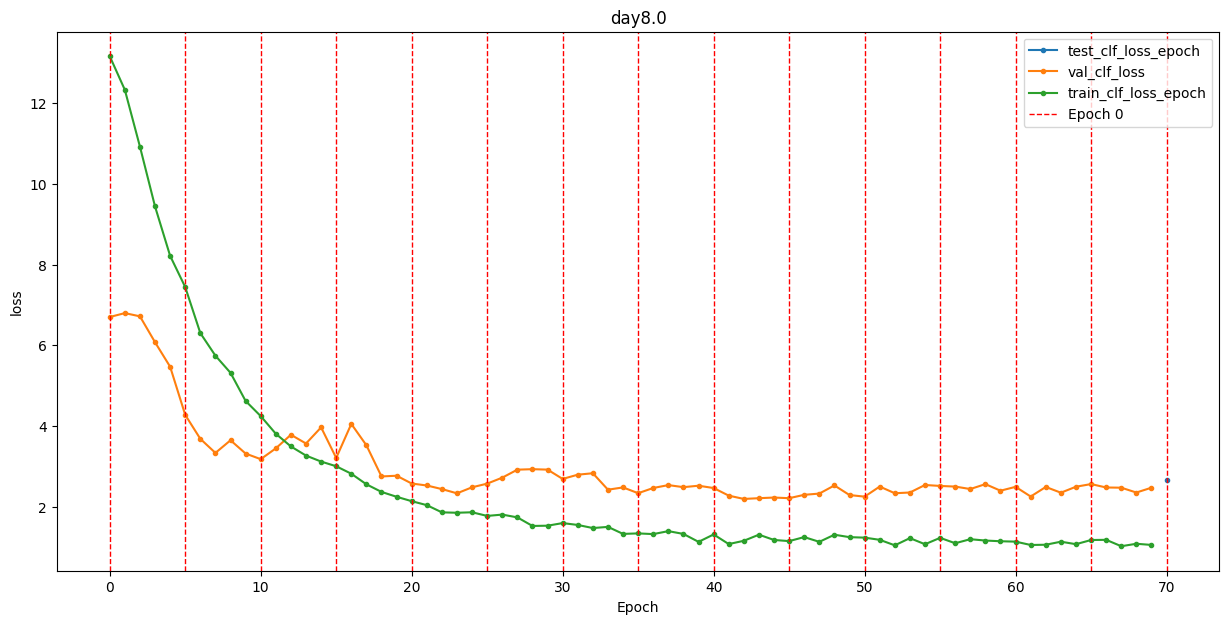

2025-03-12 11:30:47,454 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:30:47,470 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day8.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797026.GPU2.3578429.13 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day8.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797046.GPU2.3578429.14 
2025-03-12 11:30:47,472 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day8.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797046.GPU2.3578429.14 
2025-03-12 11:30:47,473 I

Free Memory Percentage: 35.14%
[INFO] GPU device 2 - total: 40.0GB; - memory free: 38.815GB.
[INFO] GPU device 1 - total: 40.0GB; - memory free: 38.261GB.
[INFO] GPU device 0 - total: 40.0GB; - memory free: 38.817GB.

[INFO] more than 5% free memory, Auto select GPU device 0,- memory free: 38.817GB
======= Training SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial =======


Sanity Checking: 0it [00:00, ?it/s]

/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, val_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(15.7809, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.4112, device='cuda:0'), 'train_KLD_step': tensor(-7.0496, device='cuda:0'), 'train_clf_loss_step': tensor(14.3679, device='cuda:0'), 'val_loss': tensor(2.5619, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8041, device='cuda:0'), 'val_KLD': tensor(-0.2883, device='cuda:0'), 'val_clf_loss': tensor(1.7576, device='cuda:0'), 'train_loss_epoch': tensor(15.7809, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.4112, device='cuda:0'), 'train_KLD_epoch': tensor(-7.0496, device='cuda:0'), 'train_clf_loss_epoch': tensor(14.3679, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(14.8408, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.4212, device='cuda:0'), 'train_KLD_step': tensor(-7.4166, device='cuda:0'), 'train_clf_loss_step': tensor(13.4178, device='cuda:0'), 'val_loss': tensor(2.6138, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8147, device='cuda:0'), 'val_KLD': tensor(-0.5218, device='cuda:0'), 'val_clf_loss': tensor(1.7989, device='cuda:0'), 'train_loss_epoch': tensor(14.8408, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.4212, device='cuda:0'), 'train_KLD_epoch': tensor(-7.4166, device='cuda:0'), 'train_clf_loss_epoch': tensor(13.4178, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(13.5430, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.2440, device='cuda:0'), 'train_KLD_step': tensor(-9.2817, device='cuda:0'), 'train_clf_loss_step': tensor(12.2967, device='cuda:0'), 'val_loss': tensor(2.7799, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8083, device='cuda:0'), 'val_KLD': tensor(-2.0904, device='cuda:0'), 'val_clf_loss': tensor(1.9711, device='cuda:0'), 'train_loss_epoch': tensor(13.5430, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.2440, device='cuda:0'), 'train_KLD_epoch': tensor(-9.2817, device='cuda:0'), 'train_clf_loss_epoch': tensor(12.2967, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(11.9668, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.1060, device='cuda:0'), 'train_KLD_step': tensor(-10.4484, device='cuda:0'), 'train_clf_loss_step': tensor(10.8581, device='cuda:0'), 'val_loss': tensor(3.0621, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8485, device='cuda:0'), 'val_KLD': tensor(-5.4626, device='cuda:0'), 'val_clf_loss': tensor(2.2122, device='cuda:0'), 'train_loss_epoch': tensor(11.9668, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.1060, device='cuda:0'), 'train_KLD_epoch': tensor(-10.4484, device='cuda:0'), 'train_clf_loss_epoch': tensor(10.8581, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(10.6224, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(1.0167, device='cuda:0'), 'train_KLD_step': tensor(-12.1944, device='cuda:0'), 'train_clf_loss_step': tensor(9.6026, device='cuda:0'), 'val_loss': tensor(3.3533, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9455, device='cuda:0'), 'val_KLD': tensor(-8.6279, device='cuda:0'), 'val_clf_loss': tensor(2.4057, device='cuda:0'), 'train_loss_epoch': tensor(10.6224, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(1.0167, device='cuda:0'), 'train_KLD_epoch': tensor(-12.1944, device='cuda:0'), 'train_clf_loss_epoch': tensor(9.6026, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(9.4055, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9501, device='cuda:0'), 'train_KLD_step': tensor(-14.1129, device='cuda:0'), 'train_clf_loss_step': tensor(8.4519, device='cuda:0'), 'val_loss': tensor(3.7934, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1022, device='cuda:0'), 'val_KLD': tensor(-12.6703, device='cuda:0'), 'val_clf_loss': tensor(2.6880, device='cuda:0'), 'train_loss_epoch': tensor(9.4055, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9501, device='cuda:0'), 'train_KLD_epoch': tensor(-14.1129, device='cuda:0'), 'train_clf_loss_epoch': tensor(8.4519, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(8.4930, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9336, device='cuda:0'), 'train_KLD_step': tensor(-16.1012, device='cuda:0'), 'train_clf_loss_step': tensor(7.5554, device='cuda:0'), 'val_loss': tensor(3.8474, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.2046, device='cuda:0'), 'val_KLD': tensor(-15.5539, device='cuda:0'), 'val_clf_loss': tensor(2.6389, device='cuda:0'), 'train_loss_epoch': tensor(8.4930, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9336, device='cuda:0'), 'train_KLD_epoch': tensor(-16.1012, device='cuda:0'), 'train_clf_loss_epoch': tensor(7.5554, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.6440, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9247, device='cuda:0'), 'train_KLD_step': tensor(-18.4767, device='cuda:0'), 'train_clf_loss_step': tensor(6.7147, device='cuda:0'), 'val_loss': tensor(4.1147, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1696, device='cuda:0'), 'val_KLD': tensor(-17.5635, device='cuda:0'), 'val_clf_loss': tensor(2.9407, device='cuda:0'), 'train_loss_epoch': tensor(7.6440, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9247, device='cuda:0'), 'train_KLD_epoch': tensor(-18.4767, device='cuda:0'), 'train_clf_loss_epoch': tensor(6.7147, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(7.0483, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.9002, device='cuda:0'), 'train_KLD_step': tensor(-20.9572, device='cuda:0'), 'train_clf_loss_step': tensor(6.1429, device='cuda:0'), 'val_loss': tensor(4.8744, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1798, device='cuda:0'), 'val_KLD': tensor(-21.1118, device='cuda:0'), 'val_clf_loss': tensor(3.6893, device='cuda:0'), 'train_loss_epoch': tensor(7.0483, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.9002, device='cuda:0'), 'train_KLD_epoch': tensor(-20.9572, device='cuda:0'), 'train_clf_loss_epoch': tensor(6.1429, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(6.4698, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8934, device='cuda:0'), 'train_KLD_step': tensor(-23.4022, device='cuda:0'), 'train_clf_loss_step': tensor(5.5706, device='cuda:0'), 'val_loss': tensor(5.3658, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1640, device='cuda:0'), 'val_KLD': tensor(-26.9928, device='cuda:0'), 'val_clf_loss': tensor(4.1951, device='cuda:0'), 'train_loss_epoch': tensor(6.4698, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8934, device='cuda:0'), 'train_KLD_epoch': tensor(-23.4022, device='cuda:0'), 'train_clf_loss_epoch': tensor(5.5706, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.9792, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8875, device='cuda:0'), 'train_KLD_step': tensor(-25.5407, device='cuda:0'), 'train_clf_loss_step': tensor(5.0853, device='cuda:0'), 'val_loss': tensor(5.9429, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.1281, device='cuda:0'), 'val_KLD': tensor(-28.8977, device='cuda:0'), 'val_clf_loss': tensor(4.8076, device='cuda:0'), 'train_loss_epoch': tensor(5.9792, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8875, device='cuda:0'), 'train_KLD_epoch': tensor(-25.5407, device='cuda:0'), 'train_clf_loss_epoch': tensor(5.0853, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.6102, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8804, device='cuda:0'), 'train_KLD_step': tensor(-27.5719, device='cuda:0'), 'train_clf_loss_step': tensor(4.7229, device='cuda:0'), 'val_loss': tensor(6.2004, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.0861, device='cuda:0'), 'val_KLD': tensor(-26.6972, device='cuda:0'), 'val_clf_loss': tensor(5.1077, device='cuda:0'), 'train_loss_epoch': tensor(5.6102, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8804, device='cuda:0'), 'train_KLD_epoch': tensor(-27.5719, device='cuda:0'), 'train_clf_loss_epoch': tensor(4.7229, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(5.2241, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8756, device='cuda:0'), 'train_KLD_step': tensor(-29.5526, device='cuda:0'), 'train_clf_loss_step': tensor(4.3412, device='cuda:0'), 'val_loss': tensor(6.0986, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.0800, device='cuda:0'), 'val_KLD': tensor(-23.6365, device='cuda:0'), 'val_clf_loss': tensor(5.0128, device='cuda:0'), 'train_loss_epoch': tensor(5.2241, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8756, device='cuda:0'), 'train_KLD_epoch': tensor(-29.5526, device='cuda:0'), 'train_clf_loss_epoch': tensor(4.3412, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.7429, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8777, device='cuda:0'), 'train_KLD_step': tensor(-31.5909, device='cuda:0'), 'train_clf_loss_step': tensor(3.8574, device='cuda:0'), 'val_loss': tensor(5.6839, device='cuda:0'), 'val_Reconstruction_loss': tensor(1.0024, device='cuda:0'), 'val_KLD': tensor(-21.5098, device='cuda:0'), 'val_clf_loss': tensor(4.6761, device='cuda:0'), 'train_loss_epoch': tensor(4.7429, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8777, device='cuda:0'), 'train_KLD_epoch': tensor(-31.5909, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.8574, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.5263, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8699, device='cuda:0'), 'train_KLD_step': tensor(-33.4467, device='cuda:0'), 'train_clf_loss_step': tensor(3.6480, device='cuda:0'), 'val_loss': tensor(5.6588, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9836, device='cuda:0'), 'val_KLD': tensor(-21.3169, device='cuda:0'), 'val_clf_loss': tensor(4.6699, device='cuda:0'), 'train_loss_epoch': tensor(4.5263, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8699, device='cuda:0'), 'train_KLD_epoch': tensor(-33.4467, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.6480, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.4474, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8597, device='cuda:0'), 'train_KLD_step': tensor(-35.0506, device='cuda:0'), 'train_clf_loss_step': tensor(3.5790, device='cuda:0'), 'val_loss': tensor(5.4566, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9672, device='cuda:0'), 'val_KLD': tensor(-20.0307, device='cuda:0'), 'val_clf_loss': tensor(4.4843, device='cuda:0'), 'train_loss_epoch': tensor(4.4474, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8597, device='cuda:0'), 'train_KLD_epoch': tensor(-35.0506, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.5790, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(4.0743, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8526, device='cuda:0'), 'train_KLD_step': tensor(-36.5908, device='cuda:0'), 'train_clf_loss_step': tensor(3.2126, device='cuda:0'), 'val_loss': tensor(5.3597, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.9078, device='cuda:0'), 'val_KLD': tensor(-18.7348, device='cuda:0'), 'val_clf_loss': tensor(4.4473, device='cuda:0'), 'train_loss_epoch': tensor(4.0743, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8526, device='cuda:0'), 'train_KLD_epoch': tensor(-36.5908, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.2126, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.8774, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8498, device='cuda:0'), 'train_KLD_step': tensor(-38.1634, device='cuda:0'), 'train_clf_loss_step': tensor(3.0181, device='cuda:0'), 'val_loss': tensor(5.5820, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8720, device='cuda:0'), 'val_KLD': tensor(-16.4683, device='cuda:0'), 'val_clf_loss': tensor(4.7059, device='cuda:0'), 'train_loss_epoch': tensor(3.8774, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8498, device='cuda:0'), 'train_KLD_epoch': tensor(-38.1634, device='cuda:0'), 'train_clf_loss_epoch': tensor(3.0181, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.7056, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8408, device='cuda:0'), 'train_KLD_step': tensor(-39.2764, device='cuda:0'), 'train_clf_loss_step': tensor(2.8550, device='cuda:0'), 'val_loss': tensor(5.0993, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.8323, device='cuda:0'), 'val_KLD': tensor(-14.8792, device='cuda:0'), 'val_clf_loss': tensor(4.2632, device='cuda:0'), 'train_loss_epoch': tensor(3.7056, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8408, device='cuda:0'), 'train_KLD_epoch': tensor(-39.2764, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.8550, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.5323, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8397, device='cuda:0'), 'train_KLD_step': tensor(-40.1777, device='cuda:0'), 'train_clf_loss_step': tensor(2.6825, device='cuda:0'), 'val_loss': tensor(5.2341, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7996, device='cuda:0'), 'val_KLD': tensor(-14.0722, device='cuda:0'), 'val_clf_loss': tensor(4.4310, device='cuda:0'), 'train_loss_epoch': tensor(3.5323, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8397, device='cuda:0'), 'train_KLD_epoch': tensor(-40.1777, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.6825, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.3049, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8311, device='cuda:0'), 'train_KLD_step': tensor(-41.1065, device='cuda:0'), 'train_clf_loss_step': tensor(2.4635, device='cuda:0'), 'val_loss': tensor(4.9851, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7534, device='cuda:0'), 'val_KLD': tensor(-12.7289, device='cuda:0'), 'val_clf_loss': tensor(4.2286, device='cuda:0'), 'train_loss_epoch': tensor(3.3049, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8311, device='cuda:0'), 'train_KLD_epoch': tensor(-41.1065, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.4635, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.1738, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8319, device='cuda:0'), 'train_KLD_step': tensor(-42.0949, device='cuda:0'), 'train_clf_loss_step': tensor(2.3314, device='cuda:0'), 'val_loss': tensor(4.7046, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7463, device='cuda:0'), 'val_KLD': tensor(-12.1795, device='cuda:0'), 'val_clf_loss': tensor(3.9553, device='cuda:0'), 'train_loss_epoch': tensor(3.1738, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8319, device='cuda:0'), 'train_KLD_epoch': tensor(-42.0949, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.3314, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(3.0832, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8249, device='cuda:0'), 'train_KLD_step': tensor(-43.1344, device='cuda:0'), 'train_clf_loss_step': tensor(2.2475, device='cuda:0'), 'val_loss': tensor(5.0795, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7427, device='cuda:0'), 'val_KLD': tensor(-12.4374, device='cuda:0'), 'val_clf_loss': tensor(4.3337, device='cuda:0'), 'train_loss_epoch': tensor(3.0832, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8249, device='cuda:0'), 'train_KLD_epoch': tensor(-43.1344, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.2475, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9080, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8243, device='cuda:0'), 'train_KLD_step': tensor(-44.1232, device='cuda:0'), 'train_clf_loss_step': tensor(2.0727, device='cuda:0'), 'val_loss': tensor(5.1209, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7425, device='cuda:0'), 'val_KLD': tensor(-13.0477, device='cuda:0'), 'val_clf_loss': tensor(4.3751, device='cuda:0'), 'train_loss_epoch': tensor(2.9080, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8243, device='cuda:0'), 'train_KLD_epoch': tensor(-44.1232, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.0727, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8086, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8228, device='cuda:0'), 'train_KLD_step': tensor(-44.8989, device='cuda:0'), 'train_clf_loss_step': tensor(1.9746, device='cuda:0'), 'val_loss': tensor(5.0845, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7339, device='cuda:0'), 'val_KLD': tensor(-13.4867, device='cuda:0'), 'val_clf_loss': tensor(4.3473, device='cuda:0'), 'train_loss_epoch': tensor(2.8086, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8228, device='cuda:0'), 'train_KLD_epoch': tensor(-44.8989, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.9746, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.9057, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8265, device='cuda:0'), 'train_KLD_step': tensor(-45.5605, device='cuda:0'), 'train_clf_loss_step': tensor(2.0678, device='cuda:0'), 'val_loss': tensor(4.5428, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7066, device='cuda:0'), 'val_KLD': tensor(-12.9242, device='cuda:0'), 'val_clf_loss': tensor(3.8330, device='cuda:0'), 'train_loss_epoch': tensor(2.9057, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8265, device='cuda:0'), 'train_KLD_epoch': tensor(-45.5605, device='cuda:0'), 'train_clf_loss_epoch': tensor(2.0678, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8192, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8187, device='cuda:0'), 'train_KLD_step': tensor(-46.1265, device='cuda:0'), 'train_clf_loss_step': tensor(1.9890, device='cuda:0'), 'val_loss': tensor(4.0424, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.7126, device='cuda:0'), 'val_KLD': tensor(-11.9002, device='cuda:0'), 'val_clf_loss': tensor(3.3268, device='cuda:0'), 'train_loss_epoch': tensor(2.8192, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8187, device='cuda:0'), 'train_KLD_epoch': tensor(-46.1265, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.9890, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.8048, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8094, device='cuda:0'), 'train_KLD_step': tensor(-46.7473, device='cuda:0'), 'train_clf_loss_step': tensor(1.9837, device='cuda:0'), 'val_loss': tensor(4.3867, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6895, device='cuda:0'), 'val_KLD': tensor(-10.6520, device='cuda:0'), 'val_clf_loss': tensor(3.6945, device='cuda:0'), 'train_loss_epoch': tensor(2.8048, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8094, device='cuda:0'), 'train_KLD_epoch': tensor(-46.7473, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.9837, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5601, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8101, device='cuda:0'), 'train_KLD_step': tensor(-47.3548, device='cuda:0'), 'train_clf_loss_step': tensor(1.7382, device='cuda:0'), 'val_loss': tensor(3.5509, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6927, device='cuda:0'), 'val_KLD': tensor(-9.9946, device='cuda:0'), 'val_clf_loss': tensor(2.8557, device='cuda:0'), 'train_loss_epoch': tensor(2.5601, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8101, device='cuda:0'), 'train_KLD_epoch': tensor(-47.3548, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7382, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5082, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8076, device='cuda:0'), 'train_KLD_step': tensor(-47.9442, device='cuda:0'), 'train_clf_loss_step': tensor(1.6886, device='cuda:0'), 'val_loss': tensor(3.4231, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6998, device='cuda:0'), 'val_KLD': tensor(-9.6427, device='cuda:0'), 'val_clf_loss': tensor(2.7210, device='cuda:0'), 'train_loss_epoch': tensor(2.5082, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8076, device='cuda:0'), 'train_KLD_epoch': tensor(-47.9442, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6886, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5545, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8071, device='cuda:0'), 'train_KLD_step': tensor(-48.4374, device='cuda:0'), 'train_clf_loss_step': tensor(1.7353, device='cuda:0'), 'val_loss': tensor(3.5865, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6758, device='cuda:0'), 'val_KLD': tensor(-9.4075, device='cuda:0'), 'val_clf_loss': tensor(2.9083, device='cuda:0'), 'train_loss_epoch': tensor(2.5545, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8071, device='cuda:0'), 'train_KLD_epoch': tensor(-48.4374, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7353, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.5180, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8018, device='cuda:0'), 'train_KLD_step': tensor(-48.8808, device='cuda:0'), 'train_clf_loss_step': tensor(1.7040, device='cuda:0'), 'val_loss': tensor(3.0474, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6755, device='cuda:0'), 'val_KLD': tensor(-9.2027, device='cuda:0'), 'val_clf_loss': tensor(2.3696, device='cuda:0'), 'train_loss_epoch': tensor(2.5180, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8018, device='cuda:0'), 'train_KLD_epoch': tensor(-48.8808, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.7040, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4271, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7994, device='cuda:0'), 'train_KLD_step': tensor(-49.3130, device='cuda:0'), 'train_clf_loss_step': tensor(1.6154, device='cuda:0'), 'val_loss': tensor(3.1127, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6764, device='cuda:0'), 'val_KLD': tensor(-8.9931, device='cuda:0'), 'val_clf_loss': tensor(2.4340, device='cuda:0'), 'train_loss_epoch': tensor(2.4271, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7994, device='cuda:0'), 'train_KLD_epoch': tensor(-49.3130, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6154, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.4354, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.8009, device='cuda:0'), 'train_KLD_step': tensor(-49.7048, device='cuda:0'), 'train_clf_loss_step': tensor(1.6221, device='cuda:0'), 'val_loss': tensor(2.7987, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6754, device='cuda:0'), 'val_KLD': tensor(-8.7296, device='cuda:0'), 'val_clf_loss': tensor(2.1212, device='cuda:0'), 'train_loss_epoch': tensor(2.4354, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.8009, device='cuda:0'), 'train_KLD_epoch': tensor(-49.7048, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.6221, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3185, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7901, device='cuda:0'), 'train_KLD_step': tensor(-50.0046, device='cuda:0'), 'train_clf_loss_step': tensor(1.5159, device='cuda:0'), 'val_loss': tensor(2.7881, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6818, device='cuda:0'), 'val_KLD': tensor(-8.6189, device='cuda:0'), 'val_clf_loss': tensor(2.1042, device='cuda:0'), 'train_loss_epoch': tensor(2.3185, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7901, device='cuda:0'), 'train_KLD_epoch': tensor(-50.0046, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5159, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2988, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7938, device='cuda:0'), 'train_KLD_step': tensor(-50.2927, device='cuda:0'), 'train_clf_loss_step': tensor(1.4923, device='cuda:0'), 'val_loss': tensor(2.4957, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6813, device='cuda:0'), 'val_KLD': tensor(-8.4705, device='cuda:0'), 'val_clf_loss': tensor(1.8123, device='cuda:0'), 'train_loss_epoch': tensor(2.2988, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7938, device='cuda:0'), 'train_KLD_epoch': tensor(-50.2927, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4923, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3602, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7928, device='cuda:0'), 'train_KLD_step': tensor(-50.5766, device='cuda:0'), 'train_clf_loss_step': tensor(1.5548, device='cuda:0'), 'val_loss': tensor(2.4344, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6874, device='cuda:0'), 'val_KLD': tensor(-8.1350, device='cuda:0'), 'val_clf_loss': tensor(1.7449, device='cuda:0'), 'train_loss_epoch': tensor(2.3602, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7928, device='cuda:0'), 'train_KLD_epoch': tensor(-50.5766, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.5548, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.3036, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7972, device='cuda:0'), 'train_KLD_step': tensor(-50.8725, device='cuda:0'), 'train_clf_loss_step': tensor(1.4937, device='cuda:0'), 'val_loss': tensor(2.5404, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6821, device='cuda:0'), 'val_KLD': tensor(-7.8518, device='cuda:0'), 'val_clf_loss': tensor(1.8563, device='cuda:0'), 'train_loss_epoch': tensor(2.3036, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7972, device='cuda:0'), 'train_KLD_epoch': tensor(-50.8725, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4937, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2695, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7865, device='cuda:0'), 'train_KLD_step': tensor(-51.1334, device='cuda:0'), 'train_clf_loss_step': tensor(1.4702, device='cuda:0'), 'val_loss': tensor(2.2671, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6730, device='cuda:0'), 'val_KLD': tensor(-7.7544, device='cuda:0'), 'val_clf_loss': tensor(1.5922, device='cuda:0'), 'train_loss_epoch': tensor(2.2695, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7865, device='cuda:0'), 'train_KLD_epoch': tensor(-51.1334, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4702, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1999, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7849, device='cuda:0'), 'train_KLD_step': tensor(-51.4112, device='cuda:0'), 'train_clf_loss_step': tensor(1.4021, device='cuda:0'), 'val_loss': tensor(2.5714, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6638, device='cuda:0'), 'val_KLD': tensor(-7.7011, device='cuda:0'), 'val_clf_loss': tensor(1.9057, device='cuda:0'), 'train_loss_epoch': tensor(2.1999, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7849, device='cuda:0'), 'train_KLD_epoch': tensor(-51.4112, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4021, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2394, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7813, device='cuda:0'), 'train_KLD_step': tensor(-51.7397, device='cuda:0'), 'train_clf_loss_step': tensor(1.4451, device='cuda:0'), 'val_loss': tensor(2.2868, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6825, device='cuda:0'), 'val_KLD': tensor(-7.6932, device='cuda:0'), 'val_clf_loss': tensor(1.6024, device='cuda:0'), 'train_loss_epoch': tensor(2.2394, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7813, device='cuda:0'), 'train_KLD_epoch': tensor(-51.7397, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4451, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1270, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7749, device='cuda:0'), 'train_KLD_step': tensor(-52.0766, device='cuda:0'), 'train_clf_loss_step': tensor(1.3391, device='cuda:0'), 'val_loss': tensor(2.1519, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6690, device='cuda:0'), 'val_KLD': tensor(-7.6526, device='cuda:0'), 'val_clf_loss': tensor(1.4810, device='cuda:0'), 'train_loss_epoch': tensor(2.1270, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7749, device='cuda:0'), 'train_KLD_epoch': tensor(-52.0766, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3391, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2265, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7751, device='cuda:0'), 'train_KLD_step': tensor(-52.3358, device='cuda:0'), 'train_clf_loss_step': tensor(1.4384, device='cuda:0'), 'val_loss': tensor(2.2501, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6655, device='cuda:0'), 'val_KLD': tensor(-7.5886, device='cuda:0'), 'val_clf_loss': tensor(1.5827, device='cuda:0'), 'train_loss_epoch': tensor(2.2265, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7751, device='cuda:0'), 'train_KLD_epoch': tensor(-52.3358, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4384, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.2322, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7771, device='cuda:0'), 'train_KLD_step': tensor(-52.5771, device='cuda:0'), 'train_clf_loss_step': tensor(1.4419, device='cuda:0'), 'val_loss': tensor(2.1883, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6653, device='cuda:0'), 'val_KLD': tensor(-7.5469, device='cuda:0'), 'val_clf_loss': tensor(1.5212, device='cuda:0'), 'train_loss_epoch': tensor(2.2322, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7771, device='cuda:0'), 'train_KLD_epoch': tensor(-52.5771, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.4419, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1071, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7747, device='cuda:0'), 'train_KLD_step': tensor(-52.7710, device='cuda:0'), 'train_clf_loss_step': tensor(1.3192, device='cuda:0'), 'val_loss': tensor(2.2605, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6669, device='cuda:0'), 'val_KLD': tensor(-7.5366, device='cuda:0'), 'val_clf_loss': tensor(1.5918, device='cuda:0'), 'train_loss_epoch': tensor(2.1071, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7747, device='cuda:0'), 'train_KLD_epoch': tensor(-52.7710, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3192, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1136, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7700, device='cuda:0'), 'train_KLD_step': tensor(-52.9294, device='cuda:0'), 'train_clf_loss_step': tensor(1.3303, device='cuda:0'), 'val_loss': tensor(2.2153, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6662, device='cuda:0'), 'val_KLD': tensor(-7.4911, device='cuda:0'), 'val_clf_loss': tensor(1.5472, device='cuda:0'), 'train_loss_epoch': tensor(2.1136, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7700, device='cuda:0'), 'train_KLD_epoch': tensor(-52.9294, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3303, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0576, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7713, device='cuda:0'), 'train_KLD_step': tensor(-53.0874, device='cuda:0'), 'train_clf_loss_step': tensor(1.2730, device='cuda:0'), 'val_loss': tensor(2.4858, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6844, device='cuda:0'), 'val_KLD': tensor(-7.3454, device='cuda:0'), 'val_clf_loss': tensor(1.7995, device='cuda:0'), 'train_loss_epoch': tensor(2.0576, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7713, device='cuda:0'), 'train_KLD_epoch': tensor(-53.0874, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2730, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0190, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7707, device='cuda:0'), 'train_KLD_step': tensor(-53.2474, device='cuda:0'), 'train_clf_loss_step': tensor(1.2350, device='cuda:0'), 'val_loss': tensor(2.1726, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6727, device='cuda:0'), 'val_KLD': tensor(-7.1946, device='cuda:0'), 'val_clf_loss': tensor(1.4981, device='cuda:0'), 'train_loss_epoch': tensor(2.0190, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7707, device='cuda:0'), 'train_KLD_epoch': tensor(-53.2474, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2350, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0531, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7668, device='cuda:0'), 'train_KLD_step': tensor(-53.3600, device='cuda:0'), 'train_clf_loss_step': tensor(1.2730, device='cuda:0'), 'val_loss': tensor(2.3286, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6765, device='cuda:0'), 'val_KLD': tensor(-7.0467, device='cuda:0'), 'val_clf_loss': tensor(1.6504, device='cuda:0'), 'train_loss_epoch': tensor(2.0531, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7668, device='cuda:0'), 'train_KLD_epoch': tensor(-53.3600, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2730, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0937, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7647, device='cuda:0'), 'train_KLD_step': tensor(-53.4931, device='cuda:0'), 'train_clf_loss_step': tensor(1.3156, device='cuda:0'), 'val_loss': tensor(1.9958, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6666, device='cuda:0'), 'val_KLD': tensor(-6.9354, device='cuda:0'), 'val_clf_loss': tensor(1.3275, device='cuda:0'), 'train_loss_epoch': tensor(2.0937, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7647, device='cuda:0'), 'train_KLD_epoch': tensor(-53.4931, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3156, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0260, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7616, device='cuda:0'), 'train_KLD_step': tensor(-53.6210, device='cuda:0'), 'train_clf_loss_step': tensor(1.2511, device='cuda:0'), 'val_loss': tensor(1.9743, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6676, device='cuda:0'), 'val_KLD': tensor(-6.9004, device='cuda:0'), 'val_clf_loss': tensor(1.3050, device='cuda:0'), 'train_loss_epoch': tensor(2.0260, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7616, device='cuda:0'), 'train_KLD_epoch': tensor(-53.6210, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2511, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0529, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7653, device='cuda:0'), 'train_KLD_step': tensor(-53.7221, device='cuda:0'), 'train_clf_loss_step': tensor(1.2742, device='cuda:0'), 'val_loss': tensor(2.0513, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6582, device='cuda:0'), 'val_KLD': tensor(-6.9162, device='cuda:0'), 'val_clf_loss': tensor(1.3914, device='cuda:0'), 'train_loss_epoch': tensor(2.0529, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7653, device='cuda:0'), 'train_KLD_epoch': tensor(-53.7221, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2742, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9584, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7694, device='cuda:0'), 'train_KLD_step': tensor(-53.8321, device='cuda:0'), 'train_clf_loss_step': tensor(1.1755, device='cuda:0'), 'val_loss': tensor(2.0397, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6764, device='cuda:0'), 'val_KLD': tensor(-6.9618, device='cuda:0'), 'val_clf_loss': tensor(1.3616, device='cuda:0'), 'train_loss_epoch': tensor(1.9584, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7694, device='cuda:0'), 'train_KLD_epoch': tensor(-53.8321, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1755, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.1048, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7591, device='cuda:0'), 'train_KLD_step': tensor(-53.9133, device='cuda:0'), 'train_clf_loss_step': tensor(1.3322, device='cuda:0'), 'val_loss': tensor(2.0316, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6639, device='cuda:0'), 'val_KLD': tensor(-7.0505, device='cuda:0'), 'val_clf_loss': tensor(1.3659, device='cuda:0'), 'train_loss_epoch': tensor(2.1048, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7591, device='cuda:0'), 'train_KLD_epoch': tensor(-53.9133, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3322, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9737, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7621, device='cuda:0'), 'train_KLD_step': tensor(-53.9799, device='cuda:0'), 'train_clf_loss_step': tensor(1.1981, device='cuda:0'), 'val_loss': tensor(2.1158, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6693, device='cuda:0'), 'val_KLD': tensor(-7.1084, device='cuda:0'), 'val_clf_loss': tensor(1.4447, device='cuda:0'), 'train_loss_epoch': tensor(1.9737, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7621, device='cuda:0'), 'train_KLD_epoch': tensor(-53.9799, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1981, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0529, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7609, device='cuda:0'), 'train_KLD_step': tensor(-54.0559, device='cuda:0'), 'train_clf_loss_step': tensor(1.2785, device='cuda:0'), 'val_loss': tensor(1.9716, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6615, device='cuda:0'), 'val_KLD': tensor(-7.1321, device='cuda:0'), 'val_clf_loss': tensor(1.3083, device='cuda:0'), 'train_loss_epoch': tensor(2.0529, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7609, device='cuda:0'), 'train_KLD_epoch': tensor(-54.0559, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2785, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0198, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7613, device='cuda:0'), 'train_KLD_step': tensor(-54.1485, device='cuda:0'), 'train_clf_loss_step': tensor(1.2450, device='cuda:0'), 'val_loss': tensor(1.9213, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6652, device='cuda:0'), 'val_KLD': tensor(-7.1211, device='cuda:0'), 'val_clf_loss': tensor(1.2544, device='cuda:0'), 'train_loss_epoch': tensor(2.0198, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7613, device='cuda:0'), 'train_KLD_epoch': tensor(-54.1485, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2450, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0268, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7601, device='cuda:0'), 'train_KLD_step': tensor(-54.2429, device='cuda:0'), 'train_clf_loss_step': tensor(1.2532, device='cuda:0'), 'val_loss': tensor(1.9733, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6762, device='cuda:0'), 'val_KLD': tensor(-7.0807, device='cuda:0'), 'val_clf_loss': tensor(1.2954, device='cuda:0'), 'train_loss_epoch': tensor(2.0268, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7601, device='cuda:0'), 'train_KLD_epoch': tensor(-54.2429, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2532, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9794, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7577, device='cuda:0'), 'train_KLD_step': tensor(-54.3294, device='cuda:0'), 'train_clf_loss_step': tensor(1.2081, device='cuda:0'), 'val_loss': tensor(1.9182, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6663, device='cuda:0'), 'val_KLD': tensor(-7.0403, device='cuda:0'), 'val_clf_loss': tensor(1.2502, device='cuda:0'), 'train_loss_epoch': tensor(1.9794, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7577, device='cuda:0'), 'train_KLD_epoch': tensor(-54.3294, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2081, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9421, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7613, device='cuda:0'), 'train_KLD_step': tensor(-54.4468, device='cuda:0'), 'train_clf_loss_step': tensor(1.1672, device='cuda:0'), 'val_loss': tensor(1.9068, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6687, device='cuda:0'), 'val_KLD': tensor(-7.0163, device='cuda:0'), 'val_clf_loss': tensor(1.2364, device='cuda:0'), 'train_loss_epoch': tensor(1.9421, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7613, device='cuda:0'), 'train_KLD_epoch': tensor(-54.4468, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1672, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9710, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7586, device='cuda:0'), 'train_KLD_step': tensor(-54.5598, device='cuda:0'), 'train_clf_loss_step': tensor(1.1988, device='cuda:0'), 'val_loss': tensor(2.1754, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6572, device='cuda:0'), 'val_KLD': tensor(-7.0039, device='cuda:0'), 'val_clf_loss': tensor(1.5165, device='cuda:0'), 'train_loss_epoch': tensor(1.9710, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7586, device='cuda:0'), 'train_KLD_epoch': tensor(-54.5598, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1988, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9090, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7532, device='cuda:0'), 'train_KLD_step': tensor(-54.6853, device='cuda:0'), 'train_clf_loss_step': tensor(1.1422, device='cuda:0'), 'val_loss': tensor(1.9338, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6608, device='cuda:0'), 'val_KLD': tensor(-6.9937, device='cuda:0'), 'val_clf_loss': tensor(1.2713, device='cuda:0'), 'train_loss_epoch': tensor(1.9090, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7532, device='cuda:0'), 'train_KLD_epoch': tensor(-54.6853, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1422, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9133, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7526, device='cuda:0'), 'train_KLD_step': tensor(-54.8071, device='cuda:0'), 'train_clf_loss_step': tensor(1.1470, device='cuda:0'), 'val_loss': tensor(1.9737, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6684, device='cuda:0'), 'val_KLD': tensor(-6.9974, device='cuda:0'), 'val_clf_loss': tensor(1.3036, device='cuda:0'), 'train_loss_epoch': tensor(1.9133, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7526, device='cuda:0'), 'train_KLD_epoch': tensor(-54.8071, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1470, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9616, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7541, device='cuda:0'), 'train_KLD_step': tensor(-54.9207, device='cuda:0'), 'train_clf_loss_step': tensor(1.1938, device='cuda:0'), 'val_loss': tensor(1.9074, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6604, device='cuda:0'), 'val_KLD': tensor(-7.0156, device='cuda:0'), 'val_clf_loss': tensor(1.2453, device='cuda:0'), 'train_loss_epoch': tensor(1.9616, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7541, device='cuda:0'), 'train_KLD_epoch': tensor(-54.9207, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1938, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9992, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7561, device='cuda:0'), 'train_KLD_step': tensor(-55.0198, device='cuda:0'), 'train_clf_loss_step': tensor(1.2294, device='cuda:0'), 'val_loss': tensor(1.8699, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6767, device='cuda:0'), 'val_KLD': tensor(-7.0263, device='cuda:0'), 'val_clf_loss': tensor(1.1914, device='cuda:0'), 'train_loss_epoch': tensor(1.9992, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7561, device='cuda:0'), 'train_KLD_epoch': tensor(-55.0198, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2294, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0725, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7507, device='cuda:0'), 'train_KLD_step': tensor(-55.1225, device='cuda:0'), 'train_clf_loss_step': tensor(1.3080, device='cuda:0'), 'val_loss': tensor(1.9530, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6736, device='cuda:0'), 'val_KLD': tensor(-7.0593, device='cuda:0'), 'val_clf_loss': tensor(1.2777, device='cuda:0'), 'train_loss_epoch': tensor(2.0725, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7507, device='cuda:0'), 'train_KLD_epoch': tensor(-55.1225, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.3080, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9837, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7509, device='cuda:0'), 'train_KLD_step': tensor(-55.2111, device='cuda:0'), 'train_clf_loss_step': tensor(1.2190, device='cuda:0'), 'val_loss': tensor(1.8884, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6633, device='cuda:0'), 'val_KLD': tensor(-7.0719, device='cuda:0'), 'val_clf_loss': tensor(1.2233, device='cuda:0'), 'train_loss_epoch': tensor(1.9837, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7509, device='cuda:0'), 'train_KLD_epoch': tensor(-55.2111, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2190, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9358, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7495, device='cuda:0'), 'train_KLD_step': tensor(-55.2954, device='cuda:0'), 'train_clf_loss_step': tensor(1.1724, device='cuda:0'), 'val_loss': tensor(1.9724, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6757, device='cuda:0'), 'val_KLD': tensor(-7.0650, device='cuda:0'), 'val_clf_loss': tensor(1.2950, device='cuda:0'), 'train_loss_epoch': tensor(1.9358, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7495, device='cuda:0'), 'train_KLD_epoch': tensor(-55.2954, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1724, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(2.0274, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7510, device='cuda:0'), 'train_KLD_step': tensor(-55.3631, device='cuda:0'), 'train_clf_loss_step': tensor(1.2626, device='cuda:0'), 'val_loss': tensor(1.8788, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6521, device='cuda:0'), 'val_KLD': tensor(-7.0450, device='cuda:0'), 'val_clf_loss': tensor(1.2249, device='cuda:0'), 'train_loss_epoch': tensor(2.0274, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7510, device='cuda:0'), 'train_KLD_epoch': tensor(-55.3631, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.2626, device='cuda:0')}


Validation: 0it [00:00, ?it/s]

Epoch train loss: {'train_loss_step': tensor(1.9621, device='cuda:0'), 'train_Reconstruction_loss_step': tensor(0.7502, device='cuda:0'), 'train_KLD_step': tensor(-55.4297, device='cuda:0'), 'train_clf_loss_step': tensor(1.1980, device='cuda:0'), 'val_loss': tensor(1.8318, device='cuda:0'), 'val_Reconstruction_loss': tensor(0.6555, device='cuda:0'), 'val_KLD': tensor(-7.0343, device='cuda:0'), 'val_clf_loss': tensor(1.1746, device='cuda:0'), 'train_loss_epoch': tensor(1.9621, device='cuda:0'), 'train_Reconstruction_loss_epoch': tensor(0.7502, device='cuda:0'), 'train_KLD_epoch': tensor(-55.4297, device='cuda:0'), 'train_clf_loss_epoch': tensor(1.1980, device='cuda:0')}


2025-03-12 11:31:08,154 INFO - pytorch_lightning.utilities.rank_zero - `Trainer.fit` stopped: `max_epochs=70` reached. 
2025-03-12 11:31:08,179 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, test_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃          Test metric           ┃          DataLoader 0          ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_KLD_epoch         │       -7.034279823303223       │
│ test_Reconstruction_loss_epoch │       0.6706224679946899       │
│      test_clf_loss_epoch       │       1.260809063911438        │
│        test_loss_epoch         │       1.933190107345581        │
└────────────────────────────────┴────────────────────────────────┘

2025-03-12 11:31:08,230 INFO - TemporalVAE.utils.utils_project - this epoch final, on test data:[{'test_loss_epoch': 1.933190107345581, 'test_Reconstruction_loss_epoch': 0.6706224679946899, 'test_KLD_epoch': -7.034279823303223, 'test_clf_loss_epoch': 1.260809063911438}] 
2025-03-12 11:31:08,235 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 
/mnt/yijun/nfs_share/miniconda3/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:432: PossibleUserWarning: The dataloader, predict_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:31:08,278 INFO - pytorch_lightning.accelerators.cuda - LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2] 


Predicting: 0it [00:00, ?it/s]

2025-03-12 11:31:08,311 INFO - TemporalVAE.utils.utils_project - The Array does not contain NaN values 
2025-03-12 11:31:08,311 INFO - TemporalVAE.utils.utils_project - predicted time of test donor is continuous. 
2025-03-12 11:31:08,312 INFO - TemporalVAE.utils.utils_project - Plot training loss line for check. 
2025-03-12 11:31:08,328 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day9.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797048.GPU2.3578429.15 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day9.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797068.GPU2.3578429.16 
2025-03-12 11:31:08,329 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/

<Figure size 1500x700 with 0 Axes>

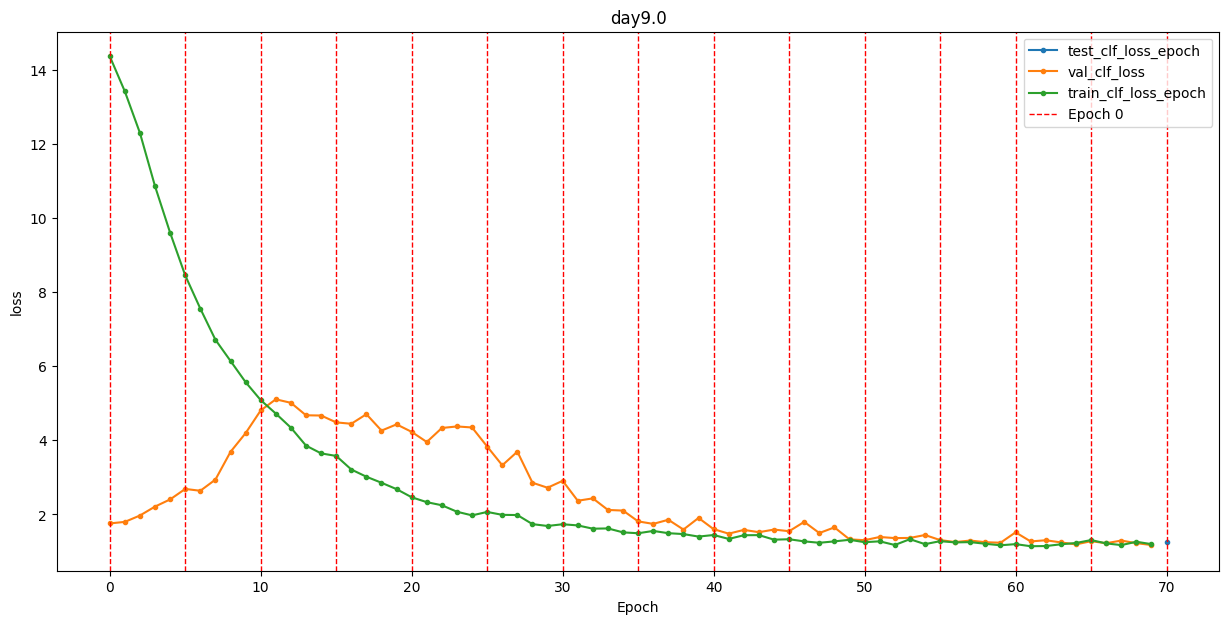

2025-03-12 11:31:08,764 INFO - TemporalVAE.utils.utils_plot - plot training process. 
2025-03-12 11:31:08,779 INFO - tensorboard - Directory watcher advancing from /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day9.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797048.GPU2.3578429.15 to /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day9.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797068.GPU2.3578429.16 
2025-03-12 11:31:08,780 INFO - tensorboard - No path found after /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/day9.0/SuperviseVanillaVAE_regressionClfDecoder_mouse_noAdversarial/version_2/events.out.tfevents.1741797068.GPU2.3578429.16 
2025-03-12 11:31:08,781 I

=== data correlation: 
Spearman correlation=0.90486, p-value=0.00000; 
Pearson correlation=0.91994, p-value=0.00000; 
Kendall correlation=0.75036, p-value=0.00000; 
R-squared=0.76387.


<Figure size 1500x700 with 0 Axes>

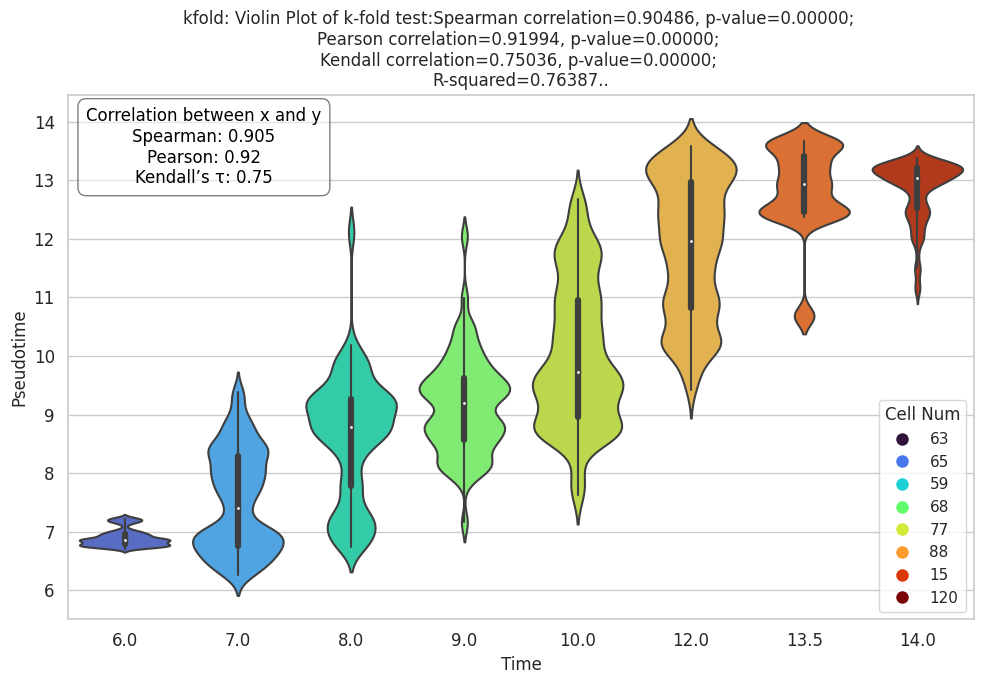

2025-03-12 11:31:09,933 INFO - __main__ - Finish plot image and fold-test. 
2025-03-12 11:31:09,934 INFO - __main__ - Finish fold-test. 


figure save as /mnt/yijun/nfs_share/awa_project/awa_github/TemporalVAE-release-main/examples/humanEmbryo_xiang2019/humanEmbryo_xiang2019/kfold_violine.png


In [27]:
predict_donors_dic, label_dic = task_kFoldTest(donor_list, sc_expression_df, donor_dic, batch_dic, special_path_str, cell_time, time_standard_type,
                                               config, train_epoch_num, _logger, donor_str="day", batch_size=100000, cmap_color="turbo")

_logger.info("Finish fold-test.")